In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
from tabulate import tabulate
import seaborn as sns
import scikitplot as skplt
from numpy import percentile
import math
from numpy import arange
import IPython.display as ipd
import matplotlib.lines as mlines

#pandas
from pandas.plotting import parallel_coordinates
import datetime

#sklearn
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler, StandardScaler

from sklearn.decomposition import PCA
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import learning_curve

from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix, roc_curve, auc
from sklearn.metrics import roc_auc_score, precision_score, recall_score, make_scorer
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

#scikitplot
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_lift_curve
from scikitplot.metrics import plot_cumulative_gain

#tslearn
from tslearn.metrics import dtw, dtw_path, cdist_dtw, subsequence_cost_matrix

#mlxtend
from mlxtend.plotting import plot_decision_regions

#matplotlib
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib import pyplot

#seaborn
import seaborn as sns

#scipy
import scipy.stats as stats
from scipy.stats import shapiro, mannwhitneyu, normaltest, kstest
from scipy.stats import boxcox, yeojohnson
from scipy.spatial.distance import euclidean, cityblock, cosine, minkowski
from scipy.spatial.distance import cdist

#matrixprofile
import matrixprofile
from matrixprofile import *
from matrixprofile.discords import discords

In [2]:
def plot_time_series_years(column, legend_item, color, together, df, columns, period_type):
    if not together and column != "" and legend_item != "" and color != "":
        fig, ax = plt.subplots(figsize=(8, 5))
        ts = df[column]
        plt.plot(ts, color = color)
        plt.grid()
        plt.legend([legend_item], title="Album type")
        plt.xticks(list(df.index))
        plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # prevent scientific notation
        plt.ylabel("count")
        plt.title(column + " TS")
    else:
        fig, ax = plt.subplots(figsize=(8, 5))
        ts1 = df[columns[0]]  #Studio_Recording
        ts2 = df[columns[1]]  #Live_Recording
        plt.plot(ts1, color = '#ea0064')
        plt.plot(ts2, color = '#b329ff')
        plt.grid()
        plt.legend([columns[0].replace(("_"+period_type+"_freq"), "").replace("_", " "), 
                    columns[1].replace(("_"+period_type+"_freq"), "").replace("_", " ")],
                    title="Album type")
        plt.xticks(list(df.index))
        plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # prevent scientific notation
        plt.ylabel("count")
        plt.title(columns[0] + " - " + columns[1] + " TSs")
    plt.show()

In [3]:
def plot_other_time_series(ts1, ts2, together, columns, period_type):
    
    if not together:
        time_series = [ts1, ts2]
        colors = ['#ea0064', '#b329ff']
        for ts, color, column in zip(time_series, colors, columns):
            fig, ax = plt.subplots(figsize=(8, 5))
            legend_item = column.replace(("_"+period_type+"_freq"), "").replace("_", " ")
            plt.plot(ts.values, color = color)
            plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # prevent scientific notation
            plt.grid()
            plt.legend([legend_item], title="Album type")
            plt.ylabel("count")
            plt.title(column + " TS")
            
            if period_type == 'month':
                ax.xaxis.set_major_locator(MultipleLocator(20))
                ax.xaxis.set_minor_locator(MultipleLocator(10))
                ax.tick_params(which='major', length=9)
                ax.tick_params(which='minor', length=7, color='r')
                
            if period_type == 'week':
                ax.xaxis.set_major_locator(MultipleLocator(100))
                ax.xaxis.set_minor_locator(MultipleLocator(50))
                ax.tick_params(which='major', length=9)
                ax.tick_params(which='minor', length=7, color='r')
                
            plt.show()
        
    else:
        fig, ax = plt.subplots(figsize=(8, 5))
        ts1 = ts1  #Studio_Recording
        ts2 = ts2  #Live_Recording
        plt.plot(ts1.values, color = '#ea0064')
        plt.plot(ts2.values, color = '#b329ff')
        plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # prevent scientific notation
        plt.grid()
        plt.legend([columns[0].replace(("_"+period_type+"_freq"), "").replace("_", " "), 
                    columns[1].replace(("_"+period_type+"_freq"), "").replace("_", " ")],
                    title="Album type")
        plt.ylabel("count")
        plt.title(columns[0] + " - " + columns[1] + " TSs")
        
        if period_type == 'month':
            ax.xaxis.set_major_locator(MultipleLocator(20))
            ax.xaxis.set_minor_locator(MultipleLocator(10))
            ax.tick_params(which='major', length=9)
            ax.tick_params(which='minor', length=7, color='r')
                
        if period_type == 'week':
            ax.xaxis.set_major_locator(MultipleLocator(100))
            ax.xaxis.set_minor_locator(MultipleLocator(50))
            ax.tick_params(which='major', length=9)
            ax.tick_params(which='minor', length=7, color='r')
   
        plt.show()

In [4]:
def plot_other_time_series2(ts, column, ts1, ts2, legend_item, color, together, columns, period_type):
    
    if not ts1 and not ts2 and not together and legend_item != "" and color != "":
        fig, ax = plt.subplots(figsize=(8, 5))
        plt.plot(ts.values, color = color)
        plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # prevent scientific notation
        plt.grid()
        plt.legend([legend_item], title="Album type")
        plt.ylabel("count")
        plt.title(column + " TS")
    else:
        fig, ax = plt.subplots(figsize=(8, 5))
        ts1 = ts1  #Studio_Recording
        ts2 = ts2  #Live_Recording
        plt.plot(ts1.values, color = '#ea0064')
        plt.plot(ts2.values, color = '#b329ff')
        plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # prevent scientific notation
        plt.grid()
        plt.legend([columns[0].replace(("_"+period_type+"_freq"), "").replace("_", " "), 
                    columns[1].replace(("_"+period_type+"_freq"), "").replace("_", " ")],
                    title="Album type")
        plt.ylabel("count")
        plt.title(columns[0] + " - " + columns[1] + " TSs")
    plt.show()

In [5]:
#Transformations
def offset_translation(ts):
    return ts - ts.mean()

def amplitude_scaling(ts):
    return (ts - ts.mean())/ts.std()

def noise(ts):
    return ((ts - ts.mean())/ts.std()).rolling(window=1).mean()

def trend_removal(ts):
    return ts - ts.rolling(window=2).mean()

#Get Transformations
def get_transformation(ts):
    transformations = list()
    
    t = offset_translation(ts)
    transformations.append(t)
    
    t = amplitude_scaling(ts)
    transformations.append(t)
    
    t = noise(ts)
    transformations.append(t)
    
    t = trend_removal(ts)
    transformations.append(t)

    return transformations

In [6]:
distances = [euclidean, cityblock, cosine, minkowski]
transformation_names = ['offset_translation', 'amplitude_scaling', 'noise', 'trend_removal']

In [7]:
indexes = [((i.__name__) + '_distance').title() for i in distances]

In [8]:
def plot_distances_dataframes_normal_global_constraints(ts1, ts2, columns, year_period):
    
    df_temp = pd.DataFrame(index = indexes)
    df_temp.index.name = (columns[0] + " - " + columns[1]).title()
    
    if not year_period:
        ts1 = pd.Series(ts1)
        ts2 = pd.Series(ts2)
    
    for i, distance in enumerate(distances):

        #key for each distance
        key = indexes[i]

        #dataset for each distance with initially only normal distance between ts1 and ts2
        df_temp.loc[key, 'No_transformation'] = distance(ts1, ts2)

        #applies transformation on ts1 and ts2 
        for transformation_ts1, transformation_ts2, transformation_name in \
        zip(get_transformation(ts1), get_transformation(ts2), transformation_names):
            ts1_temp = transformation_ts1
            ts2_temp = transformation_ts2

            #check for nonfinite values (e.g. NaN values) and deletes these from ts
            for ts in [ts1_temp, ts2_temp]:
                for i in ts.index:
                    if not (np.isfinite(ts.loc[i])):
                        ts.drop(labels=i, inplace = True)

            #calculates distance between ts1 and ts2
            df_temp.loc[key, transformation_name.title()] = distance(ts1_temp, ts2_temp)
            
    ipd.display(df_temp)

In [9]:
def plot_distances_dataframes_normal_global_constraints2(ts1, ts2, columns):
    for distance in distances:

        #key for each distance
        key = [(columns[0] + " - " + columns[1] + " " + (distance.__name__) + '_distance ').title()]

        #dataset for each distance with initially only normal distance between ts1 and ts2
        df_temp = pd.DataFrame({'No_transformation': distance(ts1, ts2)}, index = (key))

        #applies transformation on ts1 and ts2 
        for transformation_ts1, transformation_ts2, transformation_name in \
        zip(get_transformation(ts1), get_transformation(ts2), transformation_names):
            ts1_temp = transformation_ts1
            ts2_temp = transformation_ts2

            #check for nonfinite values (e.g. NaN values) and deletes these from ts
            for ts in [ts1_temp, ts2_temp]:
                for i in ts.index:
                    if not (np.isfinite(ts.loc[i])):
                        ts.drop(labels=i, inplace = True)

            #calculates distance between ts1 and ts2
            df_temp.loc[key, transformation_name.title()] = distance(ts1_temp, ts2_temp)
            df_temp.index.name = ((distance.__name__) + '_distance ').title()

        ipd.display(df_temp)

In [10]:
def plot_translation_plot(ts1, ts2, columns, year_period, period_type):
    
    if not year_period:
        ts1 = pd.Series(ts1.values)
        ts2 = pd.Series(ts2.values)
        
    ts_temps = []

    for i, transformation_ts1, transformation_ts2, transformation_name in \
        zip(range(0,4), get_transformation(ts1), get_transformation(ts2), transformation_names):
            ts1_temp = transformation_ts1
            ts2_temp = transformation_ts2
            ts_temps.append((ts1_temp, ts2_temp, transformation_name))

            
    for i, (a,b,c) in enumerate(ts_temps):
        
        fig, ax = plt.subplots(figsize=(8, 5))
        ax.plot(ts_temps[i][0], color = '#ea0064')
        ax.plot(ts_temps[i][1], color = '#b329ff')  
        
        if year_period:
            if c != 'trend_removal':
                ax.xaxis.set_major_locator(MultipleLocator(2))
                ax.xaxis.set_minor_locator(MultipleLocator(1))
                ax.tick_params(which='major', length=9)
                ax.tick_params(which='minor', length=7, color='r')
                
        if period_type == 'month':
            ax.xaxis.set_major_locator(MultipleLocator(20))
            ax.xaxis.set_minor_locator(MultipleLocator(10))
            ax.tick_params(which='major', length=9)
            ax.tick_params(which='minor', length=7, color='r')
                
        if period_type == 'week':
            ax.xaxis.set_major_locator(MultipleLocator(100))
            ax.xaxis.set_minor_locator(MultipleLocator(50))
            ax.tick_params(which='major', length=9)
            ax.tick_params(which='minor', length=7, color='r')

        plt.title(columns[0] + " - " + columns[1] + "\n" + ts_temps[i][2].title())
        plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # prevent scientific notation
        plt.legend([columns[0].replace(("_"+period_type+"_freq"), "").replace("_", " "), 
                    columns[1].replace(("_"+period_type+"_freq"), "").replace("_", " ")],
                    title="Album type")
        plt.grid()
        plt.show()

In [11]:
def plot_translation_plot2(ts1, ts2, columns):
    ts_temps = []

    for i, transformation_ts1, transformation_ts2, transformation_name in \
        zip(range(0,4), get_transformation(ts1), get_transformation(ts2), transformation_names):
            ts1_temp = transformation_ts1
            ts2_temp = transformation_ts2
            ts_temps.append((ts1_temp, ts2_temp, transformation_name))

    for i, (a,b,c) in enumerate(ts_temps):
        plt.plot(ts_temps[i][0])
        plt.plot(ts_temps[i][1])    
        plt.title(columns[0] + " - " + columns[1] + " " + ts_temps[i][2].title())
        plt.grid()
        plt.show()

In [12]:
def plot_point_to_point_matrix(ts1, ts2, columns, year_period):
    
    if not year_period:
        ts1 = pd.Series(ts1)
        ts2 = pd.Series(ts2)
    
    mat = cdist(ts1.values.reshape(-1,1), ts2.values.reshape(-1,1)) 

    if year_period:
        fig, ax = plt.subplots(figsize=(8, 8))

        ax.imshow(mat, cmap = "RdPu")
        ax.axis("off")
        ax.autoscale(False)
        for i in range(mat.shape[0]):
            for j in range(mat.shape[1]):
                text = ax.text(j, i, '%.1f' % mat[i, j], ha="center", va="center", color="w")

        plt.title(columns[0] + " - " + columns[1] + "\n" + "Point to Point Matrix")        
        plt.show()
    
    return mat

In [13]:
def plot_cumulative_cost_matrix(ts1, ts2, columns, year_period):
    
    if not year_period:
        ts1 = pd.Series(ts1)
        ts2 = pd.Series(ts2)
        
    acc = subsequence_cost_matrix(ts1.values.reshape(-1,1), ts2.values.reshape(-1,1))

    fig, ax = plt.subplots(figsize=(8, 8))

    ax.imshow(acc, cmap = "RdPu")
    ax.axis("off")
    ax.autoscale(False)
    for i in range(acc.shape[0]):
        for j in range(acc.shape[1]):
            text = ax.text(j, i, '%.1f' % np.sqrt(acc[i, j]), ha="center", va="center", color="w")

    plt.title(columns[0] + " - " + columns[1] + "\n" + "Cumulative Cost Matrix")   
    plt.show()

In [14]:
#-------------------------------------------Calculates DTW path---------------------------------------------#
def calculate_dtw_path(ts1, ts2, flag):
    
    if flag == 'normal':
        path, dist = dtw_path(ts1, ts2)
    elif flag == 'sakoe_chiba':
        path, dist = dtw_path(ts1, ts2, global_constraint="sakoe_chiba", sakoe_chiba_radius=2)
    else:
        path, dist = dtw_path(ts1, ts2, global_constraint="itakura", itakura_max_slope=2.)
        
    return path, dist


#-------------------------------------------Plots optimal path---------------------------------------------#
def plot_optimal_path(mat, path, flag, columns):
    
    fig, ax = plt.subplots(figsize=(8, 8))
    
    ax.imshow(mat, cmap = "RdPu")
    ax.axis("off")
    ax.autoscale(False)
    ax.plot([j for (i, j) in path], [i for (i, j) in path], "w-", linewidth=3.)
    if flag == 'normal':
        title = columns[0] + " - " + columns[1] + "\n" + "Optimal Path"
    else:
        title = columns[0] + " - " + columns[1] + "\n" + flag.title() + " global constraint's Optimal Path"
    plt.title(title)
    plt.show()
    
    
#--------------------------------------Calculates and plots optimal path-----------------------------------#
def calculate_and_plot_optimal_paths(mat, ts1, ts2, columns, year_period):
    
    year_period = year_period
    
    if not year_period:
        ts1 = pd.Series(ts1)
        ts2 = pd.Series(ts2)
        
    flag_list = ['normal', 'sakoe_chiba', 'itakura']

    for i in flag_list:

        path, dist = calculate_dtw_path(ts1, ts2, i)

        print("%s Dist: %d" % (i.title(), dist))
        if year_period:
            print("%s Path:\n" %(i.title()), path)

        print()

        plot_optimal_path(mat, path, i, columns)
        print()


<h2>MatrixProfile</h2>

In [15]:
def matrixProfile_stomp(ts, w, column, color, legend_item, period_type):
    
    fig, ax = plt.subplots(figsize=(8, 5))
    
    mp, mpi = matrixProfile.stomp(ts.values, w)
    
    ax.plot(mp, color = color)
    plt.title(column + "'s Matrix Profile (w = %d)" % (w))
    plt.grid()
    plt.legend([legend_item], title="Album type")
    
    if period_type == 'month':
        ax.xaxis.set_major_locator(MultipleLocator(20))
        ax.xaxis.set_minor_locator(MultipleLocator(10))
        ax.tick_params(which='major', length=9)
        ax.tick_params(which='minor', length=7, color='r')
                
    if period_type == 'week':
        ax.xaxis.set_major_locator(MultipleLocator(100))
        ax.xaxis.set_minor_locator(MultipleLocator(50))
        ax.tick_params(which='major', length=9)
        ax.tick_params(which='minor', length=7, color='r')
    
    plt.show()
    
    return mp, mpi

<h2>Motif Discovery</h2>

In [16]:
def plot_motifs(ts, mo, mod, max_motifs, column, w, color, legend_item, period_type):
    
    fig, ax = plt.subplots(figsize=(8, 5))
    
    #Total motifs
    li = ax.plot(ts.values, color = color)
    
    if period_type == 'month':
        ax.xaxis.set_major_locator(MultipleLocator(20))
        ax.xaxis.set_minor_locator(MultipleLocator(10))
        ax.tick_params(which='major', length=9)
        ax.tick_params(which='minor', length=7, color='r')
                
    if period_type == 'week':
        ax.xaxis.set_major_locator(MultipleLocator(100))
        ax.xaxis.set_minor_locator(MultipleLocator(50))
        ax.tick_params(which='major', length=9)
        ax.tick_params(which='minor', length=7, color='r')
    
    colors = ['c', 'g', 'k', 'b', 'y'][:len(mo)]
    lista_generale2 = []
    legend = [legend_item]
    
    for n, m, d, c in zip(range(0, len(mo)), mo, mod, colors):
        
        lista_provvisoria2 = []
        
        for i in m:
            m_shape = ts.values[i:i+w]
            plt.plot(range(i,i+w), m_shape, color=c, lw=3)
            
            if i in li[0].get_data()[0]:
                lista_provvisoria2.append(ts.index[i])
            
        lista_generale2.append(lista_provvisoria2)
        legend.append(lista_provvisoria2)
        
        print ("- Motif "+str(n)+": ", *lista_provvisoria2, sep = " | ")
        print()
    
    
    bbox_to_anchor = ""
    if period_type == 'week' or period_type == 'weekday' or period_type == 'daymoment':
        bbox_to_anchor = (0.0,-0.1)
    else:
        bbox_to_anchor = (1.05, 1)
    
    plt.legend(legend, title="Album type - Motifs", bbox_to_anchor=bbox_to_anchor, loc='upper left')
    leg = ax.get_legend()
    for num, motif, color in zip(range(1, len(mo)+1), mo, colors):
        leg.legendHandles[num].set_color(color)
        
    
    #print("---------------------------------------------------------------------------------------------")
    print()
    #print("Motifs translated: ", lista_generale2)
    #print()
            

    plt.title(column + "\ntop %d Motifs (w = %d)" %(max_motifs, w))
    plt.grid()    
    plt.ylabel("count")
    plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # prevent scientific notation
    plt.show()

<h2>Anomaly Discovery</h2>

In [17]:
def plot_anomalies(ts, w, anoms, column, color, legend_item, period_type):
    
    fig, ax = plt.subplots(figsize=(8, 5))
    
    #Time series
    li = ax.plot(ts.values, color = color)
    
    if period_type == 'month':
        ax.xaxis.set_major_locator(MultipleLocator(20))
        ax.xaxis.set_minor_locator(MultipleLocator(10))
        ax.tick_params(which='major', length=9)
        ax.tick_params(which='minor', length=7, color='r')
                
    if period_type == 'week':
        ax.xaxis.set_major_locator(MultipleLocator(100))
        ax.xaxis.set_minor_locator(MultipleLocator(50))
        ax.tick_params(which='major', length=9)
        ax.tick_params(which='minor', length=7, color='r')
    
    plt.grid()
    plt.ylabel("count")
    plt.title(column + " TS's Anomalies (w = %d)" %(w))
    plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # prevent scientific notation

    #Anomalies
    colors = ['c', 'g', 'k', 'b', 'y'][:len(anoms)]
    
    for a, c in zip(anoms, colors):
        
        a_shape = ts.values[a:a+w]
        plt.plot(range(a, a+w), a_shape, color=c, lw=3)
        
    
    lista_generale2 = []
    
    for n, i in enumerate(anoms):
        if i in li[0].get_data()[0]:       
            lista_generale2.append(ts.index[i])
       
    print ("- Anomalies: ", *lista_generale2, sep = " | ")
    print()
   
    #print("---------------------------------------------------------------------------------------------")
    print()
    #print("Anomalies translated: ", lista_generale2)
    #print()
    
    legend = [legend_item]
    for i in lista_generale2:
        legend.append(i)

    plt.legend(legend, title="Album type - Anomalies", bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.show()

<h2>Matrix Profile - Motifs - Discords</h2>

In [18]:
def matrixProfile_with_discords(anoms, mp, w, column, columns, color, period_type):
        
    fig, ax = plt.subplots(figsize=(8, 5))
    Discords = ""
    li = ax.plot(mp, color = color)
    
    if period_type == 'month':
        ax.xaxis.set_major_locator(MultipleLocator(20))
        ax.xaxis.set_minor_locator(MultipleLocator(10))
        ax.tick_params(which='major', length=9)
        ax.tick_params(which='minor', length=7, color='r')
                
    if period_type == 'week':
        ax.xaxis.set_major_locator(MultipleLocator(100))
        ax.xaxis.set_minor_locator(MultipleLocator(50))
        ax.tick_params(which='major', length=9)
        ax.tick_params(which='minor', length=7, color='r')
        
    star = ""
    color_star = ""
    
    if column == columns[0]:
        color_star = '#206bff'
    else:
        color_star = '#fb7300'
        
    star = mlines.Line2D([], [], color=color_star, marker='*', markersize=10, label='Discords')
        
    for a, b in zip(li[0].get_data()[0], li[0].get_data()[1]):
        if a in anoms:
            Discords, = plt.plot(a, b, marker='*', c=color_star, markersize = 10)

    plt.title(column + "'s Matrix Profile with discords (w = %d)" % (w))
    plt.grid()
    plt.legend(handles=[star])
    plt.show()

In [19]:
def plot_matrixProfile_motifs_discords(windows, columns, tss_list, period_type):
    
    #windows = [2, 3, 4, 5]
    colors = ['#ea0064', '#b329ff']
    
    for column, ts, color in zip(columns, tss_list, colors):
        
        legend_item = column.replace("_"+period_type+"_freq", "").replace("_", " ")
        
        if period_type != 'year':
            ts = pd.Series(ts)
            
        for w in windows:
            
            #Matrix Profile
            mp, mpi = matrixProfile_stomp(ts, w, column, color, legend_item, period_type)

            #Motifs
            mo, mod = motifs.motifs(ts.values, (mp, mpi), max_motifs=5)
            print("Motifs ({}): {}".format(len(mo), mo))
            print()
            plot_motifs(ts, mo, mod, 5, column, w, color, legend_item, period_type)
            print()
            print()

            #Anomalies
            anoms = discords(mp, ex_zone=3, k=5)
            print("Anomalies ({}): {}".format(len(anoms), anoms))
            print()
            
            plot_anomalies(ts, w, anoms, column, color, legend_item, period_type)
            print()
            
            #Matrix Profile with discords
            print("Anomalies:", anoms)
            
            if anoms.size != 0:
                matrixProfile_with_discords(anoms, mp, w, column, columns, color, period_type)
            
            print()
            print("---------------------------------------------------------------------------------------------")
        
        print("'''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''")

<h3>Old functions</h3>

In [20]:
def plot_motifs_no(ts, mo, mod, max_motifs, column, w, color, legend_item):
    
    fig, ax = plt.subplots(figsize=(8, 5))
    
    #Total motifs
    plt.plot(ts.values, color = color)
    colors = ['r', 'g', 'k', 'b', 'y'][:len(mo)]
    for m, d, c in zip(mo, mod, colors):
        for i in m:
            m_shape = ts.values[i:i+w]
            plt.plot(range(i,i+w), m_shape, color=c, lw=3)

    plt.title(column + "\ntop %d Motifs (w = %d)" %(max_motifs, w))
    plt.grid()
    plt.legend([legend_item], title="Album type")
    plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # prevent scientific notation
    plt.show()
    
    #fig, ax = plt.subplots(figsize=(8, 5))
    
    #Single motifs
    #for m, d, c in zip(mo, mod, colors):
    #    for i in m:
    #        m_shape = ts.values[i:i+w]
    #        plt.plot(range(i,i+w), m_shape, color=c, lw=3)
    #        plt.title(column + "\nSingle Motif (w = %d)" %(w))
    #    plt.grid()
    #    plt.show()

In [21]:
def plot_anomalies_no(ts, mo, w, anoms, column, color, legend_item):
    
    fig, ax = plt.subplots(figsize=(8, 5))
    
    #Time series
    plt.plot(ts, color = color)
    plt.grid()
    plt.legend([legend_item], title="Album type")
    plt.ylabel("count")
    plt.title(column + " TS's Anomalies (w = %d)" %(w))
    plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # prevent scientific notation

    #Anomalies
    colors = ['r', 'g', 'k', 'b', 'y'][:len(mo)]
    for a, c in zip(anoms, colors):
        a_shape = ts.values[a:a+w]
        plt.plot(range(a, a+w), a_shape, color=c, lw=3)

    plt.show()

In [22]:
def plot_matrixProfile_motifs_discords_no(windows, columns, tss_list, period_type):
    
    #windows = [2, 3, 4, 5]
    colors = ['#ea0064', '#b329ff']
    
    for column, ts, color in zip(columns, tss_list, colors):
        
        legend_item = column.replace("_"+period_type+"_freq", "").replace("_", " ")
        
        if period_type != 'year':
            ts = pd.Series(ts)
            
        for w in windows:
            
            #Matrix Profile
            mp, mpi = matrixProfile_stomp(ts, w, column, color, legend_item)

            #Motifs
            mo, mod = motifs.motifs(ts, (mp, mpi), max_motifs=5)
            print("Motifs: ", mo)
            plot_motifs(ts, mo, mod, 5, column, w, color, legend_item)

            #Anomalies
            anoms = discords(mp, ex_zone=3, k=5)
            plot_anomalies(ts, mo, w, anoms, column, color, legend_item)
            print("Anomalies:", anoms)
            
            #Matrix Profile with discords
            if anoms.size != 0:
                matrixProfile_with_discords(anoms, mp, w, column, columns, color, legend_item)
        print("------------------------------------------------------------")

In [23]:
def get_Studio_and_Live_Recording_cols(df):
    
    col_studio = [col for col in df if 'Studio_Recording' in col]
    col_live = [col for col in df if 'Live_Recording' in col]
    
    dataset_studio = df[col_studio]
    dataset_live = df[col_live]
    
    return dataset_studio, dataset_live

In [24]:
def get_time_series_month(df1, df2):
    
    ts_month_studio = []
    ts_month_live = []
    TSs_list = []

    for dataset, ts in zip([df1, df2], [ts_month_studio, ts_month_live]):
        for ind in dataset.index:
            row = []
            for col in dataset.columns:
                row.append(dataset[col][ind])
            ts.append(row)

        ts = [j for i in ts for j in i]
        ts = [i for i in ts if i != 0]
        ts.append(0)
        TSs_list.append(ts)
        
    ts_month_studio = TSs_list[0]
    ts_month_live = TSs_list[1]
        
    return ts_month_studio, ts_month_live

In [25]:
def get_time_series_other_types(df1, df2):
    
    ts_studio = []
    ts_live = []
    TSs_list = []

    for dataset, ts in zip([df1, df2], [ts_studio, ts_live]):
        for ind in dataset.index:
            row = []
            for col in dataset.columns:
                row.append(dataset[col][ind])
            ts.append(row)

        ts = [j for i in ts for j in i]
        #ts = [i for i in ts if i != 0]
        #ts.append(0)
        TSs_list.append(ts)
        
    ts_studio = TSs_list[0]
    ts_live = TSs_list[1]
        
    return ts_studio, ts_live

In [26]:
def get_cols_period_type(df):
    
    cols = []
    for string in df.columns.tolist():
        for char in string:
            if char.isdigit():
                string = string.replace(char, "")

        cols.append(string[0:len(string)-1] + "_freq")

    cols = sorted(list(set(cols)), reverse = True)
    
    return cols

<h1>Inizio file<h1>

In [27]:
from tslearn.utils import to_time_series_dataset
from tslearn.clustering import silhouette_score as sil_ts
from tslearn.preprocessing import TimeSeriesScalerMinMax
from tslearn.clustering import TimeSeriesKMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, silhouette_samples, davies_bouldin_score
from sklearn.cluster import KMeans, DBSCAN
from scipy.spatial.distance import pdist, squareform
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import pairwise_distances
import zlib
import string
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from tslearn.piecewise import PiecewiseAggregateApproximation
from tslearn.piecewise import SymbolicAggregateApproximation
from tslearn.piecewise import OneD_SymbolicAggregateApproximation
import numpy as np
import scipy.stats as stats
import collections
import math

In [28]:
def find_optimal_k_kmeans(max_k, metric, X, other_measures, album_type):
    
    max_k = max_k
    
    sse_list = list()
    silhouette = list()
    
    if other_measures:
        calinski = list()
        bouldin = list()
        fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (18, 10))
        
    else:
        fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 7))

    for k in range(2, max_k + 1):
        
        kmeans = ""
        
        if not other_measures:
            kmeans = TimeSeriesKMeans(n_clusters = k, max_iter = 300, n_init = 10, metric = metric, random_state = 0)
            
        else:
            kmeans = KMeans(n_clusters = k, n_init = 10, max_iter = 300, algorithm='full', random_state = 0)
            
        kmeans.fit(X)

        sse = kmeans.inertia_
        sse_list.append(sse)
        
        if not other_measures:
            sil = sil_ts(X, kmeans.labels_, metric = metric) #silhouette score di TimeSeriesKMeans
            
        else:
            sil = silhouette_score(X, kmeans.labels_)        #silhouette score di sklearn
            
        silhouette.append(sil)
        
        if other_measures:
            cal = calinski_harabasz_score(X, kmeans.labels_)
            calinski.append(cal)

            boul = davies_bouldin_score(X, kmeans.labels_)
            bouldin.append(boul)

        print("k: ", k, "SSE: ", sse, "Silhouette Score: ", sil)
        
        if other_measures:
            print("Calinski-Harabaz: ", cal, "Davies-Bouldin: ", boul)
            
        print()
    
    index = [i for i in range(2, max_k + 1)]
    
    if other_measures:
        ax[0, 0].plot(index, sse_list)
        ax[0, 0].set_ylabel('SSE', fontsize = 15)
        ax[0, 0].set_xlabel('K', fontsize = 15)
        ax[0, 0].set_title(album_type + ' SSE', fontsize = 18)

        ax[0, 1].plot(index, silhouette)
        ax[0, 1].set_ylabel('SIL', fontsize = 15)
        ax[0, 1].set_xlabel('K', fontsize = 15)
        ax[0, 1].set_title(album_type + '\nSilhouette Score', fontsize = 18)
        
        ax[1, 0].plot(index, calinski)
        ax[1, 0].set_ylabel('CAL', fontsize = 15)
        ax[1, 0].set_xlabel('K', fontsize = 15)
        ax[1, 0].set_title(album_type + '\nCalinski-Harabaz Score', fontsize = 18)

        ax[1, 1].plot(index, bouldin)
        ax[1, 1].set_ylabel('BOUL', fontsize = 15)
        ax[1, 1].set_xlabel('K', fontsize = 15)
        ax[1, 1].set_title(album_type + '\nDavies-Bouldin Score', fontsize = 18)
        
        plt.subplots_adjust(hspace=0.5)
        
    else:
        ax1.plot(index, sse_list)
        ax1.set_ylabel('SSE', fontsize = 15)
        ax1.set_xlabel('K', fontsize = 15)
        ax1.set_title(album_type + ' SSE', fontsize = 18)

        ax2.plot(index, silhouette)
        ax2.set_ylabel('SIL', fontsize = 15)
        ax2.set_xlabel('K', fontsize = 15)
        ax2.set_title(album_type + '\nSilhouette Score', fontsize = 18)
    
    #if ticks:
    #    for axis in ax.flat:
    #        axis.xaxis.set_major_locator(MultipleLocator(2))
    #        axis.xaxis.set_minor_locator(MultipleLocator(1))
    #        axis.tick_params(which='major', length=9)
    #        axis.tick_params(which='minor', length=7, color='r')

    plt.show()
    fig.tight_layout()

In [29]:
def run_kmeans(n_clusters, max_iter, n_init, metric, X, other_measures):
    
    kmeans = ""
    if not other_measures:
        kmeans = TimeSeriesKMeans(n_clusters=n_clusters, max_iter = max_iter, n_init = n_init, metric = metric, random_state = 0)
        
    else:
        kmeans = KMeans(n_clusters = n_clusters, n_init = n_init, max_iter = max_iter, algorithm='full', random_state = 0)
        
    kmeans.fit(X)
    
    hist, bins = np.histogram(kmeans.labels_, bins=range(0, len(set(kmeans.labels_)) + 1))
    print ('cluster_centers_shape', kmeans.cluster_centers_.shape)
    print()
    
    print ('Labels: ', dict(zip(bins, hist)))
    print()
    
    print ('SSE: ', kmeans.inertia_)
    
    if not other_measures:
        print ('Silhouette Score: ', sil_ts(X, kmeans.labels_, metric = metric))  #silhouette score di TimeSeriesKMeans
        
    if other_measures:
        print ('Silhouette Score: ', silhouette_score(X, kmeans.labels_))  #silhouette score di sklearn
        print ("Calinski - Harabaz Score: ", calinski_harabasz_score(X, kmeans.labels_))
        print ("Davies - Bouldin Score: ", davies_bouldin_score(X, kmeans.labels_))
    
    return kmeans.cluster_centers_, dict(zip(bins, hist)), kmeans.labels_

In [30]:
def plot_kmeans_centroids(centers, album_type):
    
    fig, ax = plt.subplots()
    plt.plot(np.squeeze(centers).T)
    plt.title(album_type + ' centroids')
    
    plt.show()

In [31]:
def cluster_insight(df_to_copy, labels):
    
    df = df_to_copy.copy()
    df['Labels'] = labels
    
    ipd.display(df)
    
    for i in np.unique(df['Labels']):
        print("Cluster {}\n".format(i), list(df[df['Labels'] == i].index))
        print()

In [32]:
def cluster_insight_studio_live(df_to_copy, labels):

    df = df_to_copy.copy()
    df['Labels'] = labels
    
    print("Dataset con le labels associate")
    ipd.display(df)
    
    cluster_dict = pd.DataFrame(columns = ["Studio_Recording", "Live_Recording"], \
                                index = ["Cluster {}".format(str(i)) for i in np.unique(df['Labels'])])
    
    tot_entropies = []
    dim_clusters = []
    max_cluster = 0
    
    for i in np.unique(df['Labels']):
        
        cluster_list = list(df[df['Labels'] == i].index)
                            
        print("Cluster {}\n".format(i), cluster_list)
        
        raw_elements = [elem.split("_")[1] for elem in cluster_list]
        counter = collections.Counter(raw_elements)
        
        cluster_dict.loc["Cluster {}".format(str(i)), 'Studio_Recording'] = counter['studio']
        cluster_dict.loc["Cluster {}".format(str(i)), 'Live_Recording'] = counter['live']
        
        cluster_dict.loc["Cluster {}".format(str(i)), 'Tot_Cluster'] = cluster_dict.loc["Cluster {}".format(str(i)), ['Studio_Recording', 'Live_Recording']].sum()
        
        lista = cluster_dict.loc['Cluster {}'.format(str(i)), ['Studio_Recording', 'Live_Recording']].values.tolist()
        tot = sum(lista)
        dim_clusters.append(tot)
        
        '''
        Entropia singola: -(sommatoria di (pij log2 pij) per tutte le classi all'interno di un cluster.
        --> pij = mij/mj dove mj è il numero di valori nel cluster j e mij è il numero di valori della classe i
        nel cluster j.
        '''
        entropy_single = -sum([(x/tot)*math.log2(x/tot) for x in lista if x != 0])
        cluster_dict.loc["Cluster {}".format(str(i)), 'Entropy'] = "%.4f" %(entropy_single)
        tot_entropies.append(entropy_single)
        
        
        '''
        Purity singola: etichetta della classe più frequente/numero di valori nel cluster
        '''
        purity_single = max(lista)/tot
        cluster_dict.loc["Cluster {}".format(str(i)), 'Purity'] = "%.4f" %(purity_single)

        max_cluster += max(lista)
        
        print()
        
    
    new_row = pd.Series(cluster_dict[['Studio_Recording', 'Live_Recording', 'Tot_Cluster']].sum(axis=0).astype(int), name = "Total")
    cluster_dict = cluster_dict.append(new_row, ignore_index=False)
    
    '''
    Entropia complessiva: sommatoria delle entropie di ogni cluster pesate per la dimensione di ogni cluster.
    --> (mj/m) * ej --> dove mj è la dimensione del cluster j e m è il numero totale di punti 
    (nel nostro caso 16). 
    '''
    
    last_tot = 16
    tot_entropy = 0

    for entropy, dim in zip(tot_entropies, dim_clusters):
        tot_entropy+=(entropy*(dim/last_tot))
        
    cluster_dict.loc["Total", 'Entropy'] = "%.4f" %(tot_entropy)
    
    '''
    Purity complessiva: sommatoria delle classi "corrette" (il valore più alto) di ogni cluster, divisa per il
    numero totale di valori (nel nostro caso 16).
    '''
    
    tot_purity = max_cluster/last_tot
    cluster_dict.loc["Total", 'Purity'] = "%.4f" %(tot_purity)
    
    
    
    cluster_dict['Tot_Cluster'] = cluster_dict['Tot_Cluster'].astype(int)
    
    
    ipd.display(cluster_dict)

In [33]:
def analyze_clusters(labels, X, df_to_copy, album_type, clustering_type, together):
    
    if together:
        plt.figure(figsize=(7,18))
    else:
        plt.figure(figsize=(8,7))
        
    df = df_to_copy.copy()
    df['Labels'] = labels
    
    colors = ['#CC0066', '#FF9124', '#CCCC00', '#FFFF24', '#CC6600', 
          '#FF61B0', '#B061FF', '#CC6699', '#336600', '#52A300', '#70E000', '#99CC00']

    for i in range(len(np.unique(labels))):
        
        plt.subplot(len(np.unique(labels)), 1, i + 1)
        
        for x, y, color in zip(X[labels == i], df[df['Labels'] == i].index, colors):
            plt.plot(x, color = color, linewidth=0.9, label = y)
        
        plt.title(album_type + " - " + clustering_type + ': Cluster {}'.format(i), fontsize=13)
        
        plt.legend(title="Time Series", bbox_to_anchor = (1.03, 1), loc='upper left', \
                   frameon = True, shadow = True)
        
    plt.tight_layout()
    
    if together:
        plt.subplots_adjust(hspace=0.7)
    else:
        plt.subplots_adjust(hspace=0.7)
    plt.show()

In [34]:
def analyze_approximated_clusters(labels, X, df, album_type, clustering_type, together):
    
    if together:
        plt.figure(figsize=(7,18))
    else:
        plt.figure(figsize=(8,7))
        
    df = pd.DataFrame(np.squeeze(X), index = df.index)
    
    if together:
        
        cluster_insight_studio_live(df, labels)

        df['Labels'] = labels
    
    else:
        df['Labels'] = labels
        
        ipd.display(df)
        print()

        for i in np.unique(df['Labels']):
            print("Cluster {}\n".format(i), list(df[df['Labels'] == i].index))
            print()
            
    
    print()
    
    colors = ['#CC0066', '#FF9124', '#CCCC00', '#FFFF24', '#CC6600', 
          '#FF61B0', '#B061FF', '#CC6699', '#336600', '#52A300', '#70E000', '#99CC00']

    for i in range(len(np.unique(labels))):
        
        plt.subplot(len(np.unique(labels)), 1, i + 1)
        
        for x, y, color in zip(X[labels == i], df[df['Labels'] == i].index, colors):
            plt.plot(x, color = color, linewidth=0.9, label = y)
        
        plt.title(album_type + " - " + clustering_type + ': Cluster {}'.format(i), fontsize=13)
        plt.legend(title="Time Series", bbox_to_anchor = (1.03, 1), loc='upper left', \
                   frameon = True, shadow = True)
        
    plt.tight_layout()
    
    if together:
        plt.subplots_adjust(hspace=0.9)
    else:
        plt.subplots_adjust(hspace=1.1)
    plt.show()

In [35]:
def analyze_clusters_fb(labels, X, album_type, clustering_type, together):
    
    if together:
        plt.figure(figsize=(7,18))
    else:
        plt.figure(figsize=(8,7))
        
    colors = ['#CC0066', '#FF9124', '#CCCC00', '#FFFF24', '#CC6600', 
          '#FF61B0', '#B061FF', '#CC6699', '#336600', '#52A300', '#70E000', '#99CC00']

    for i in range(len(np.unique(labels))):
        
        plt.subplot(len(np.unique(labels)), 1, i + 1)
        
        for x, color in zip(X[labels == i], colors):
            plt.plot(x, color = color, linewidth=0.9)
        plt.title(album_type + " - " + clustering_type + ': Cluster {}'.format(i), fontsize=13)
        
    plt.tight_layout()
    
    if together:
        plt.subplots_adjust(hspace=0.4)
    else:
        plt.subplots_adjust(hspace=0.7)
    plt.show()

In [36]:
def calculate_features(values):
    features = {
        'avg': np.mean(values),
        'std': np.std(values),
        'var': np.var(values),
        #'med': np.median(values),
        #'10p': np.percentile(values, 10),
        #'25p': np.percentile(values, 25),
        #'50p': np.percentile(values, 50),
        #'75p': np.percentile(values, 75),
        #'90p': np.percentile(values, 90),
        #'iqr': np.percentile(values, 75) - np.percentile(values, 25),
        #'cov': 1.0 * np.mean(values) / np.std(values),
        'skw': stats.skew(values),
        'kur': stats.kurtosis(values)
    }
    
    return features

In [37]:
def plot_mean_values(labels, X, album_type):
    
    for i in range(0, len(np.unique(labels))):
        plt.plot(np.mean(X[np.where(labels == i)[0]], axis=0))
        plt.title("Mean values plot of {} \nFeatures-based Clustering".format(album_type))
    
    plt.show()

In [38]:
def cdm_dist(x, y):
    x_str = (' '.join([str(v) for v in x.ravel()])).encode('utf-8')
    y_str = (' '.join([str(v) for v in y.ravel()])).encode('utf-8')
    return len(zlib.compress(x_str + y_str)) / (len(zlib.compress(x_str)) + len(zlib.compress(y_str)))

In [39]:
def plot_centroids_approximated(centers, X, album_type, approximation_type):
    plt.plot(centers.reshape(X.shape[1], centers.shape[0]))
    plt.title(album_type + " - " + approximation_type + " centroids\nApproximated Clustering")
    plt.show()

In [40]:
def plot_mean_values_approximated(labels, X, album_type, approximation_type):
    
    for i in range(0, len(np.unique(labels))):
        plt.plot(np.mean(X[np.where(labels == i)[0]], axis=0))
        plt.title("Mean values plot of {} \n{} - Approximated Clustering".format(album_type, \
                                                            approximation_type))
    
    plt.show()

<h2>Datasets Weeks</h2>

In [41]:
df_studio = pd.read_csv('df_week_studio.csv', index_col = 0)
df_live = pd.read_csv('df_week_live.csv', index_col = 0)
df_studio_live = pd.read_csv('df_week_studio_live.csv', index_col = 0)

<h1>Studio_Recording</h1>

In [42]:
album_type = "Studio_Recording_week"

<h2>Shape based clustering</h2>

<h3>TimeSeriesKMeans</h3>

In [43]:
df_studio

1    2    3    4    5    6    7    8    9   10  ...  \
track_date_created                                                    ...   
2009_studio           2   34   25   36   34   21   16   48   60   85  ...   
2010_studio         183  412  161  149   91  297  254  169  184  288  ...   
2011_studio         345  132  263  253  118  157  318  333  331  117  ...   
2012_studio         212  627  111  159  199  379  189  196  341  197  ...   
2013_studio         448  531  299  126  157  272   84  112  350  261  ...   
2014_studio         212  254  129  139  149  233  324  128  292   57  ...   
2015_studio         150  150   92  136  216  359  290  223  208  148  ...   
2016_studio         434  294  264  246  259  222  348  436  387  150  ...   

                     44   45   46   47   48   49   50   51   52   53  
track_date_created                                                    
2009_studio         186  141  251   82  175  250  108  187   69  109  
2010_studio         427  222  193  256  303  324  254  289  146   44  
2011_studio         122  128  128  149  115  304   79  249  133    0  
2012_studio         141  144  119  227  281  162  219  232  244    0  
2013_studio         312  224  176  265  368  472  196  383   44    0  
2014_studio         218  117  182  258  196  254  169  383  166    0  
2015_studio         277  322  209  214  179  279  347  197  120   99  
2016_studio         311  228  150  306  100  281  344  242  360   69  

[8 rows x 53 columns]

In [44]:
df_studio.shape

(8, 53)

In [45]:
tss_studio = to_time_series_dataset(df_studio.values)
tss_studio

array([[[  2.],
        [ 34.],
        [ 25.],
        [ 36.],
        [ 34.],
        [ 21.],
        [ 16.],
        [ 48.],
        [ 60.],
        [ 85.],
        [ 64.],
        [ 70.],
        [262.],
        [475.],
        [325.],
        [196.],
        [264.],
        [391.],
        [338.],
        [278.],
        [408.],
        [308.],
        [264.],
        [271.],
        [ 74.],
        [206.],
        [245.],
        [204.],
        [286.],
        [231.],
        [131.],
        [116.],
        [ 88.],
        [ 72.],
        [ 74.],
        [ 36.],
        [ 59.],
        [ 65.],
        [ 89.],
        [106.],
        [ 67.],
        [118.],
        [166.],
        [186.],
        [141.],
        [251.],
        [ 82.],
        [175.],
        [250.],
        [108.],
        [187.],
        [ 69.],
        [109.]],

       [[183.],
        [412.],
        [161.],
        [149.],
        [ 91.],
        [297.],
        [254.],
        [169.],
        [184.],
      

In [46]:
tss_studio.shape

(8, 53, 1)

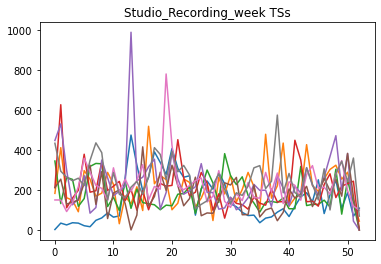

In [47]:
plt.plot(np.squeeze(tss_studio).T)
plt.title(album_type + " TSs")
plt.show()

In [48]:
tss_studio_scaled = TimeSeriesScalerMinMax().fit_transform(tss_studio)
tss_studio_scaled

array([[[0.        ],
        [0.06765328],
        [0.04862579],
        [0.07188161],
        [0.06765328],
        [0.04016913],
        [0.02959831],
        [0.09725159],
        [0.12262156],
        [0.17547569],
        [0.13107822],
        [0.14376321],
        [0.54968288],
        [1.        ],
        [0.68287526],
        [0.41014799],
        [0.55391121],
        [0.82241015],
        [0.71035941],
        [0.58350951],
        [0.85835095],
        [0.64693446],
        [0.55391121],
        [0.56871036],
        [0.15221987],
        [0.43128964],
        [0.51374207],
        [0.42706131],
        [0.60042283],
        [0.48414376],
        [0.27272727],
        [0.2410148 ],
        [0.18181818],
        [0.14799154],
        [0.15221987],
        [0.07188161],
        [0.1205074 ],
        [0.13319239],
        [0.18393235],
        [0.21987315],
        [0.13742072],
        [0.24524313],
        [0.34672304],
        [0.38900634],
        [0.29386892],
        [0

In [49]:
tss_studio_scaled.shape

(8, 53, 1)

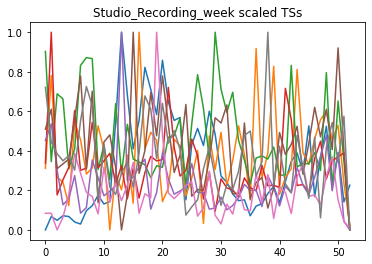

In [50]:
plt.plot(np.squeeze(tss_studio_scaled).T)
plt.title(album_type + " scaled TSs")
plt.show()

**I convert scaled time series dataset to normal dataset**

In [52]:
df_tss_studio_scaled = pd.DataFrame(np.squeeze(tss_studio_scaled), columns = df_studio.columns, \
                                    index = df_studio.index)
df_tss_studio_scaled

1         2         3         4         5  \
track_date_created                                                     
2009_studio         0.000000  0.067653  0.048626  0.071882  0.067653   
2010_studio         0.311475  0.780738  0.266393  0.241803  0.122951   
2011_studio         0.903141  0.345550  0.688482  0.662304  0.308901   
2012_studio         0.338118  1.000000  0.177033  0.253589  0.317384   
2013_studio         0.452525  0.536364  0.302020  0.127273  0.158586   
2014_studio         0.509615  0.610577  0.310096  0.334135  0.358173   
2015_studio         0.084180  0.084180  0.000000  0.063861  0.179971   
2016_studio         0.721344  0.444664  0.385375  0.349802  0.375494   

                           6         7         8         9        10  ...  \
track_date_created                                                    ...   
2009_studio         0.040169  0.029598  0.097252  0.122622  0.175476  ...   
2010_studio         0.545082  0.456967  0.282787  0.313525  0.526639  ...   
2011_studio         0.410995  0.832461  0.871728  0.866492  0.306283  ...   
2012_studio         0.604466  0.301435  0.312600  0.543860  0.314195  ...   
2013_studio         0.274747  0.084848  0.113131  0.353535  0.263636  ...   
2014_studio         0.560096  0.778846  0.307692  0.701923  0.137019  ...   
2015_studio         0.387518  0.287373  0.190131  0.168360  0.081277  ...   
2016_studio         0.302372  0.551383  0.725296  0.628458  0.160079  ...   

                          44        45        46        47        48  \
track_date_created                                                     
2009_studio         0.389006  0.293869  0.526427  0.169133  0.365751   
2010_studio         0.811475  0.391393  0.331967  0.461066  0.557377   
2011_studio         0.319372  0.335079  0.335079  0.390052  0.301047   
2012_studio         0.224880  0.229665  0.189793  0.362041  0.448166   
2013_studio         0.315152  0.226263  0.177778  0.267677  0.371717   
2014_studio         0.524038  0.281250  0.437500  0.620192  0.471154   
2015_studio         0.268505  0.333817  0.169811  0.177068  0.126270   
2016_studio         0.478261  0.314229  0.160079  0.468379  0.061265   

                          49        50        51        52        53  
track_date_created                                                    
2009_studio         0.524313  0.224101  0.391121  0.141649  0.226216  
2010_studio         0.600410  0.456967  0.528689  0.235656  0.026639  
2011_studio         0.795812  0.206806  0.651832  0.348168  0.000000  
2012_studio         0.258373  0.349282  0.370016  0.389155  0.000000  
2013_studio         0.476768  0.197980  0.386869  0.044444  0.000000  
2014_studio         0.610577  0.406250  0.920673  0.399038  0.000000  
2015_studio         0.271408  0.370102  0.152395  0.040639  0.010160  
2016_studio         0.418972  0.543478  0.341897  0.575099  0.000000  

[8 rows x 53 columns]

<h3>Euclidean Distance</h3>

k:  2 SSE:  1.4634000485446599 Silhouette Score:  0.12366398524491662

k:  3 SSE:  1.1253861036904254 Silhouette Score:  0.08121550777901454

k:  4 SSE:  0.8623477114121059 Silhouette Score:  0.046609869936060734

k:  5 SSE:  0.6025655015185541 Silhouette Score:  0.031134431980485128

k:  6 SSE:  0.33530702282854336 Silhouette Score:  0.04907139414083602

k:  7 SSE:  0.13902756262363414 Silhouette Score:  0.026147589725392058



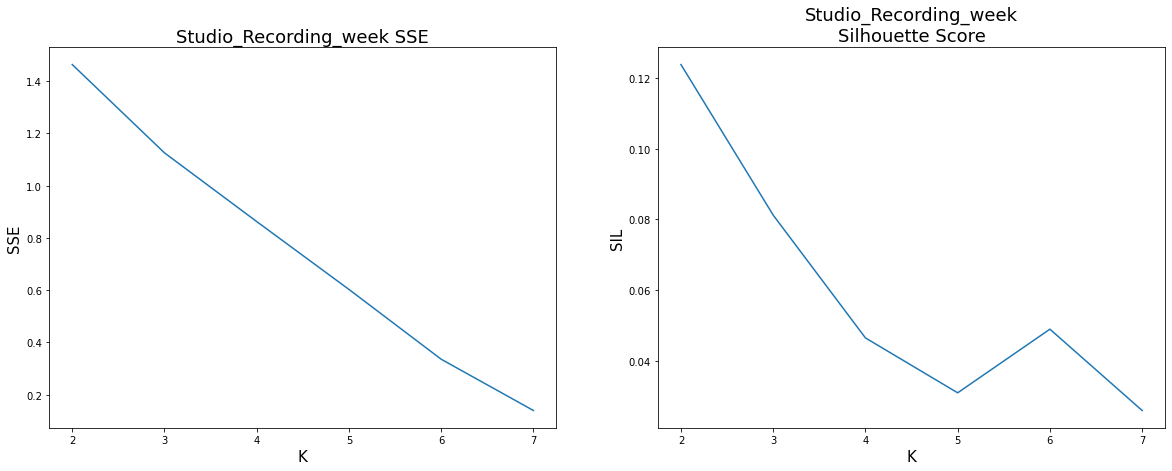

In [53]:
find_optimal_k_kmeans(7, 'euclidean', tss_studio_scaled, False, album_type)

**We can see that best k is 5**

In [54]:
cluster_centers_studio_eu, dict_label_studio_eu, labels_studio_eu = run_kmeans(3, 300, 10, 'euclidean', tss_studio_scaled,\
                                                                      False)

cluster_centers_shape (3, 53, 1)

Labels:  {0: 4, 1: 3, 2: 1}

SSE:  1.1253861036904254
Silhouette Score:  0.08121550777901454


In [55]:
cluster_insight(df_tss_studio_scaled, labels_studio_eu)

1         2         3         4         5  \
track_date_created                                                     
2009_studio         0.000000  0.067653  0.048626  0.071882  0.067653   
2010_studio         0.311475  0.780738  0.266393  0.241803  0.122951   
2011_studio         0.903141  0.345550  0.688482  0.662304  0.308901   
2012_studio         0.338118  1.000000  0.177033  0.253589  0.317384   
2013_studio         0.452525  0.536364  0.302020  0.127273  0.158586   
2014_studio         0.509615  0.610577  0.310096  0.334135  0.358173   
2015_studio         0.084180  0.084180  0.000000  0.063861  0.179971   
2016_studio         0.721344  0.444664  0.385375  0.349802  0.375494   

                           6         7         8         9        10  ...  \
track_date_created                                                    ...   
2009_studio         0.040169  0.029598  0.097252  0.122622  0.175476  ...   
2010_studio         0.545082  0.456967  0.282787  0.313525  0.526639  ...   
2011_studio         0.410995  0.832461  0.871728  0.866492  0.306283  ...   
2012_studio         0.604466  0.301435  0.312600  0.543860  0.314195  ...   
2013_studio         0.274747  0.084848  0.113131  0.353535  0.263636  ...   
2014_studio         0.560096  0.778846  0.307692  0.701923  0.137019  ...   
2015_studio         0.387518  0.287373  0.190131  0.168360  0.081277  ...   
2016_studio         0.302372  0.551383  0.725296  0.628458  0.160079  ...   

                          45        46        47        48        49  \
track_date_created                                                     
2009_studio         0.293869  0.526427  0.169133  0.365751  0.524313   
2010_studio         0.391393  0.331967  0.461066  0.557377  0.600410   
2011_studio         0.335079  0.335079  0.390052  0.301047  0.795812   
2012_studio         0.229665  0.189793  0.362041  0.448166  0.258373   
2013_studio         0.226263  0.177778  0.267677  0.371717  0.476768   
2014_studio         0.281250  0.437500  0.620192  0.471154  0.610577   
2015_studio         0.333817  0.169811  0.177068  0.126270  0.271408   
2016_studio         0.314229  0.160079  0.468379  0.061265  0.418972   

                          50        51        52        53  Labels  
track_date_created                                                  
2009_studio         0.224101  0.391121  0.141649  0.226216       1  
2010_studio         0.456967  0.528689  0.235656  0.026639       0  
2011_studio         0.206806  0.651832  0.348168  0.000000       2  
2012_studio         0.349282  0.370016  0.389155  0.000000       0  
2013_studio         0.197980  0.386869  0.044444  0.000000       1  
2014_studio         0.406250  0.920673  0.399038  0.000000       0  
2015_studio         0.370102  0.152395  0.040639  0.010160       1  
2016_studio         0.543478  0.341897  0.575099  0.000000       0  

[8 rows x 54 columns]

Cluster 0
 ['2010_studio', '2012_studio', '2014_studio', '2016_studio']

Cluster 1
 ['2009_studio', '2013_studio', '2015_studio']

Cluster 2
 ['2011_studio']



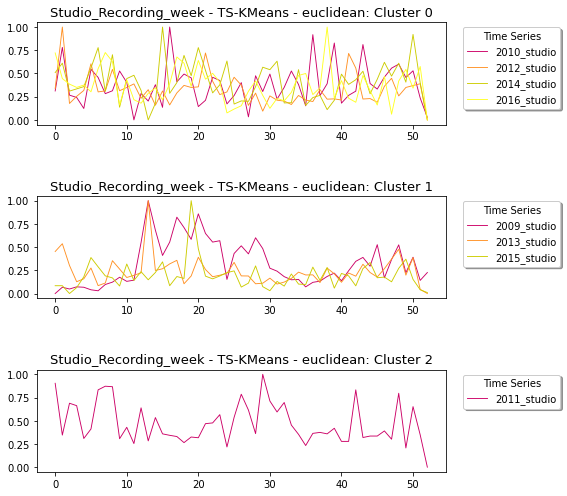

In [56]:
analyze_clusters(labels_studio_eu, tss_studio_scaled, df_tss_studio_scaled, album_type, 'TS-KMeans - euclidean', False)

**Centroids**

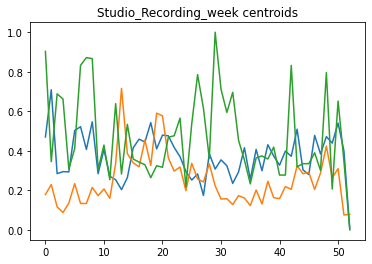

In [57]:
plot_kmeans_centroids(cluster_centers_studio_eu, album_type)

<h3>DTW distance</h3>

k:  2 SSE:  0.507239124339099 Silhouette Score:  0.1115886560593541

k:  3 SSE:  0.3958241252635934 Silhouette Score:  0.10053656503409414

k:  4 SSE:  0.31054613134556813 Silhouette Score:  0.09061308357360434

k:  5 SSE:  0.20919501740455734 Silhouette Score:  0.04960605610069291

k:  6 SSE:  0.10705774021851569 Silhouette Score:  0.04543479491079972

k:  7 SSE:  0.03878660468229439 Silhouette Score:  0.023513652877701505



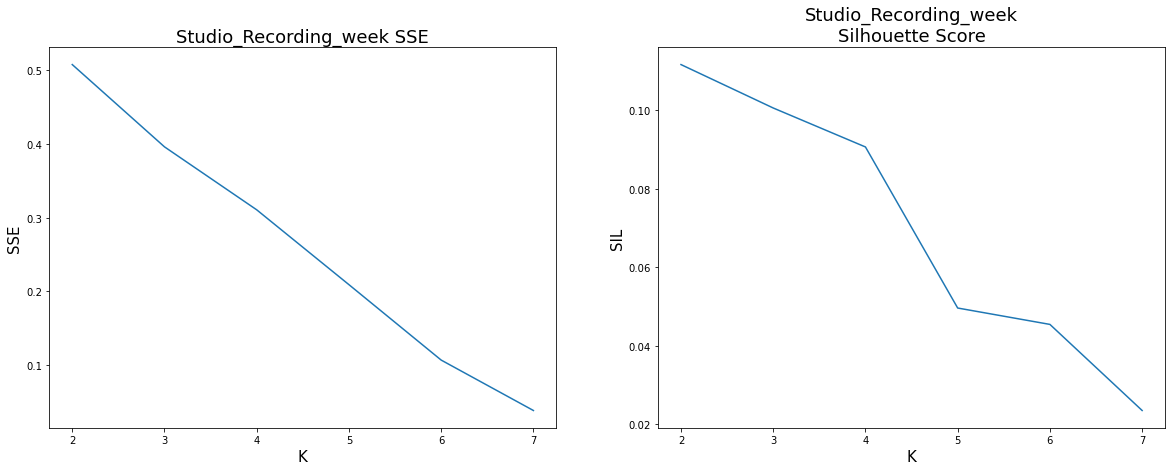

In [58]:
find_optimal_k_kmeans(7, 'dtw', tss_studio_scaled, False, album_type)

**We can see that best k is 4**

In [59]:
cluster_centers_studio_dtw, dict_label_studio_dtw, labels_studio_dtw = run_kmeans(3, 300, 10, 'dtw', tss_studio_scaled,\
                                                                      False)

cluster_centers_shape (3, 53, 1)

Labels:  {0: 2, 1: 4, 2: 2}

SSE:  0.3958241252635934
Silhouette Score:  0.10053656503409414


In [60]:
cluster_insight(df_tss_studio_scaled, labels_studio_dtw)

1         2         3         4         5  \
track_date_created                                                     
2009_studio         0.000000  0.067653  0.048626  0.071882  0.067653   
2010_studio         0.311475  0.780738  0.266393  0.241803  0.122951   
2011_studio         0.903141  0.345550  0.688482  0.662304  0.308901   
2012_studio         0.338118  1.000000  0.177033  0.253589  0.317384   
2013_studio         0.452525  0.536364  0.302020  0.127273  0.158586   
2014_studio         0.509615  0.610577  0.310096  0.334135  0.358173   
2015_studio         0.084180  0.084180  0.000000  0.063861  0.179971   
2016_studio         0.721344  0.444664  0.385375  0.349802  0.375494   

                           6         7         8         9        10  ...  \
track_date_created                                                    ...   
2009_studio         0.040169  0.029598  0.097252  0.122622  0.175476  ...   
2010_studio         0.545082  0.456967  0.282787  0.313525  0.526639  ...   
2011_studio         0.410995  0.832461  0.871728  0.866492  0.306283  ...   
2012_studio         0.604466  0.301435  0.312600  0.543860  0.314195  ...   
2013_studio         0.274747  0.084848  0.113131  0.353535  0.263636  ...   
2014_studio         0.560096  0.778846  0.307692  0.701923  0.137019  ...   
2015_studio         0.387518  0.287373  0.190131  0.168360  0.081277  ...   
2016_studio         0.302372  0.551383  0.725296  0.628458  0.160079  ...   

                          45        46        47        48        49  \
track_date_created                                                     
2009_studio         0.293869  0.526427  0.169133  0.365751  0.524313   
2010_studio         0.391393  0.331967  0.461066  0.557377  0.600410   
2011_studio         0.335079  0.335079  0.390052  0.301047  0.795812   
2012_studio         0.229665  0.189793  0.362041  0.448166  0.258373   
2013_studio         0.226263  0.177778  0.267677  0.371717  0.476768   
2014_studio         0.281250  0.437500  0.620192  0.471154  0.610577   
2015_studio         0.333817  0.169811  0.177068  0.126270  0.271408   
2016_studio         0.314229  0.160079  0.468379  0.061265  0.418972   

                          50        51        52        53  Labels  
track_date_created                                                  
2009_studio         0.224101  0.391121  0.141649  0.226216       0  
2010_studio         0.456967  0.528689  0.235656  0.026639       1  
2011_studio         0.206806  0.651832  0.348168  0.000000       2  
2012_studio         0.349282  0.370016  0.389155  0.000000       1  
2013_studio         0.197980  0.386869  0.044444  0.000000       1  
2014_studio         0.406250  0.920673  0.399038  0.000000       2  
2015_studio         0.370102  0.152395  0.040639  0.010160       0  
2016_studio         0.543478  0.341897  0.575099  0.000000       1  

[8 rows x 54 columns]

Cluster 0
 ['2009_studio', '2015_studio']

Cluster 1
 ['2010_studio', '2012_studio', '2013_studio', '2016_studio']

Cluster 2
 ['2011_studio', '2014_studio']



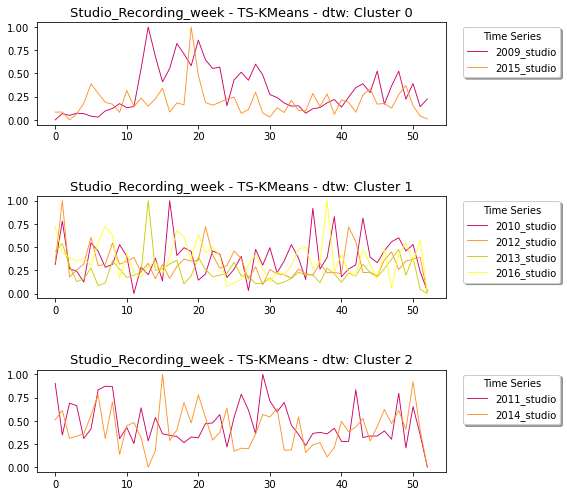

In [61]:
analyze_clusters(labels_studio_dtw, tss_studio_scaled, df_tss_studio_scaled, album_type, 'TS-KMeans - dtw', False)

**Centroids**

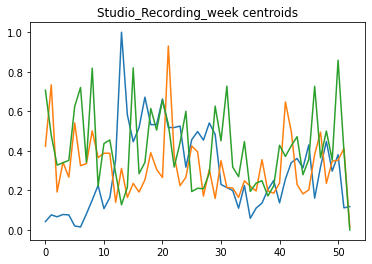

In [62]:
plot_kmeans_centroids(cluster_centers_studio_dtw, album_type)

<h3>KMeans sklearn</h3>

k:  2 SSE:  11.70720038835728 Silhouette Score:  0.1236639852449167
Calinski-Harabaz:  2.286998294687212 Davies-Bouldin:  1.5141801948765197

k:  3 SSE:  9.003088829523405 Silhouette Score:  0.08121550777901468
Calinski-Harabaz:  1.9900122377876388 Davies-Bouldin:  1.2497252411667825

k:  4 SSE:  6.898781691296847 Silhouette Score:  0.0466098699360608
Calinski-Harabaz:  1.7917772214531633 Davies-Bouldin:  1.071901529979987

k:  5 SSE:  4.820524012148432 Silhouette Score:  0.031134431980485246
Calinski-Harabaz:  1.7657417899324774 Davies-Bouldin:  0.5908010543005306

k:  6 SSE:  2.6824561826283464 Silhouette Score:  0.04907139414083607
Calinski-Harabaz:  2.0111620855087056 Davies-Bouldin:  0.5040610340292702

k:  7 SSE:  1.1122205009890733 Silhouette Score:  0.02614758972539201
Calinski-Harabaz:  2.2563528087281934 Davies-Bouldin:  0.419018679743553



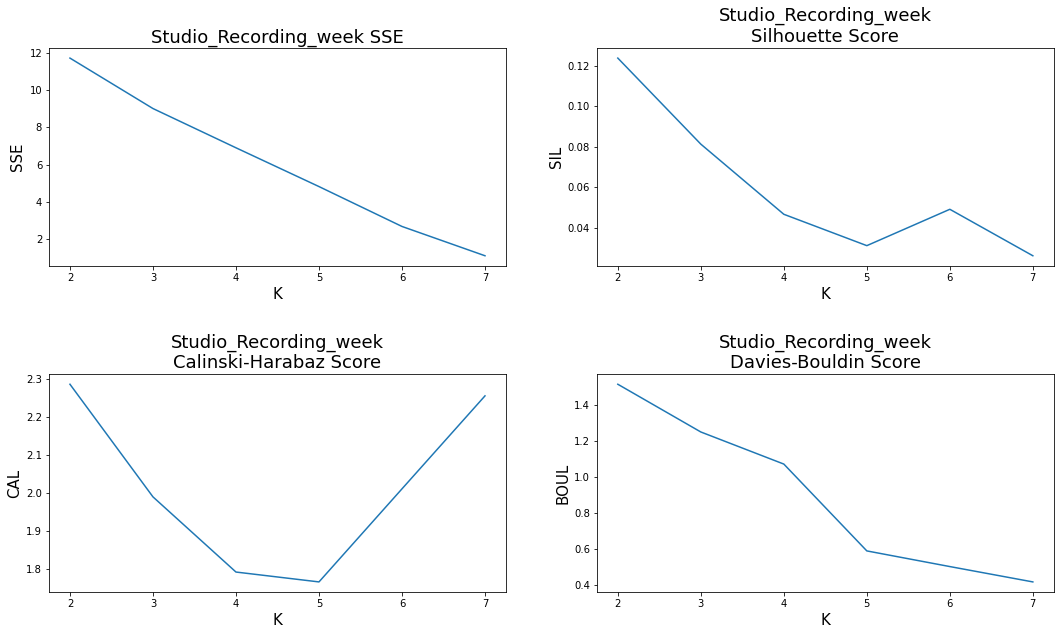

In [63]:
find_optimal_k_kmeans(7, "", df_tss_studio_scaled, True, album_type)

In [64]:
cluster_centers_studio_2, dict_label_studio_2, labels_studio_2 = run_kmeans(3, 300, 10, '', df_tss_studio_scaled,\
                                                                      True)

cluster_centers_shape (3, 53)

Labels:  {0: 4, 1: 3, 2: 1}

SSE:  9.003088829523405
Silhouette Score:  0.08121550777901468
Calinski - Harabaz Score:  1.9900122377876388
Davies - Bouldin Score:  1.2497252411667825


In [65]:
cluster_insight(df_tss_studio_scaled, labels_studio_2)

1         2         3         4         5  \
track_date_created                                                     
2009_studio         0.000000  0.067653  0.048626  0.071882  0.067653   
2010_studio         0.311475  0.780738  0.266393  0.241803  0.122951   
2011_studio         0.903141  0.345550  0.688482  0.662304  0.308901   
2012_studio         0.338118  1.000000  0.177033  0.253589  0.317384   
2013_studio         0.452525  0.536364  0.302020  0.127273  0.158586   
2014_studio         0.509615  0.610577  0.310096  0.334135  0.358173   
2015_studio         0.084180  0.084180  0.000000  0.063861  0.179971   
2016_studio         0.721344  0.444664  0.385375  0.349802  0.375494   

                           6         7         8         9        10  ...  \
track_date_created                                                    ...   
2009_studio         0.040169  0.029598  0.097252  0.122622  0.175476  ...   
2010_studio         0.545082  0.456967  0.282787  0.313525  0.526639  ...   
2011_studio         0.410995  0.832461  0.871728  0.866492  0.306283  ...   
2012_studio         0.604466  0.301435  0.312600  0.543860  0.314195  ...   
2013_studio         0.274747  0.084848  0.113131  0.353535  0.263636  ...   
2014_studio         0.560096  0.778846  0.307692  0.701923  0.137019  ...   
2015_studio         0.387518  0.287373  0.190131  0.168360  0.081277  ...   
2016_studio         0.302372  0.551383  0.725296  0.628458  0.160079  ...   

                          45        46        47        48        49  \
track_date_created                                                     
2009_studio         0.293869  0.526427  0.169133  0.365751  0.524313   
2010_studio         0.391393  0.331967  0.461066  0.557377  0.600410   
2011_studio         0.335079  0.335079  0.390052  0.301047  0.795812   
2012_studio         0.229665  0.189793  0.362041  0.448166  0.258373   
2013_studio         0.226263  0.177778  0.267677  0.371717  0.476768   
2014_studio         0.281250  0.437500  0.620192  0.471154  0.610577   
2015_studio         0.333817  0.169811  0.177068  0.126270  0.271408   
2016_studio         0.314229  0.160079  0.468379  0.061265  0.418972   

                          50        51        52        53  Labels  
track_date_created                                                  
2009_studio         0.224101  0.391121  0.141649  0.226216       1  
2010_studio         0.456967  0.528689  0.235656  0.026639       0  
2011_studio         0.206806  0.651832  0.348168  0.000000       2  
2012_studio         0.349282  0.370016  0.389155  0.000000       0  
2013_studio         0.197980  0.386869  0.044444  0.000000       1  
2014_studio         0.406250  0.920673  0.399038  0.000000       0  
2015_studio         0.370102  0.152395  0.040639  0.010160       1  
2016_studio         0.543478  0.341897  0.575099  0.000000       0  

[8 rows x 54 columns]

Cluster 0
 ['2010_studio', '2012_studio', '2014_studio', '2016_studio']

Cluster 1
 ['2009_studio', '2013_studio', '2015_studio']

Cluster 2
 ['2011_studio']



<h2>Feature based Clustering</h2>

<h3>KMeans</h3>

In [66]:
F = [list(calculate_features(x).values())for x in tss_studio_scaled]

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead

k:  2 SSE:  19.419145187885537 Silhouette Score:  0.7878672236533057
Calinski-Harabaz:  53.49659264330878 Davies-Bouldin:  0.23144903385692173

k:  3 SSE:  4.7597963503415786 Silhouette Score:  0.6692968130618957
Calinski-Harabaz:  98.63991629792295 Davies-Bouldin:  0.17259457741129813

k:  4 SSE:  1.352805624010749 Silhouette Score:  0.5121759564889772
Calinski-Harabaz:  188.45708776853562 Davies-Bouldin:  0.08266611901918533

k:  5 SSE:  0.17626113821498948 Silhouette Score:  0.43111097017650735
Calinski-Harabaz:  818.6116744064012 Davies-Bouldin:  0.14514819847118482

k:  6 SSE:  0.05733702914179626 Silhouette Score:  0.28556895565531815
Calinski-Harabaz:  1342.970346665645 Davies-Bouldin:  0.1598284370450791

k:  7 SSE:  0.015038007975641083 Silhouette Score:  0.1986579269600452
Calinski-Harabaz:  2134.005205248364 Davies-Bouldin:  0.05801479987971814



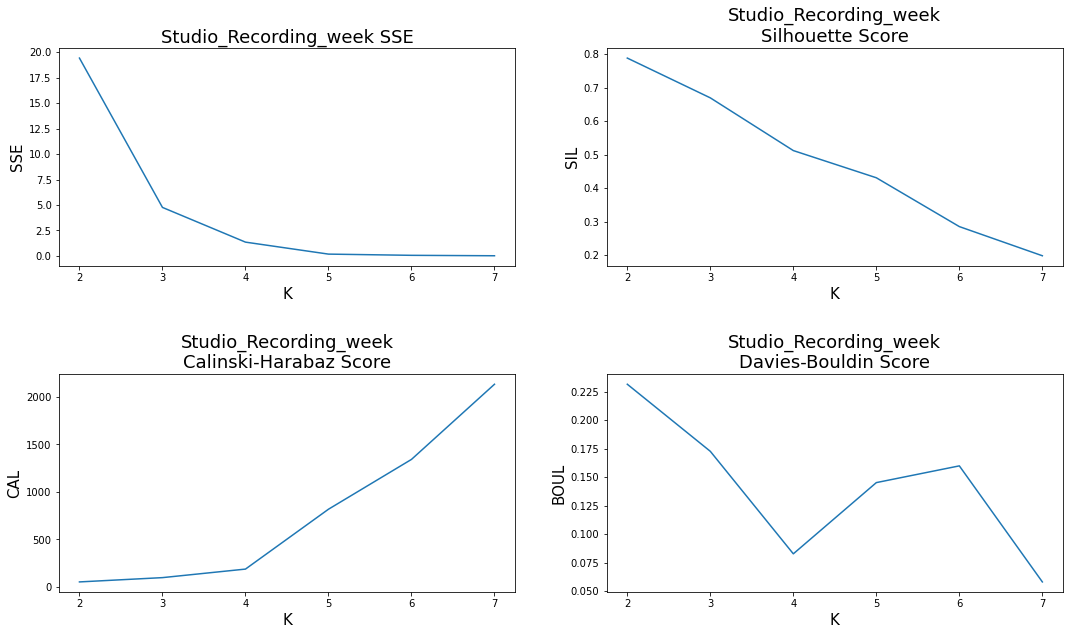

In [67]:
find_optimal_k_kmeans(7, "", F, True, album_type)

In [68]:
cluster_centers_studio_fb, dict_label_studio_fb, labels_studio_fb = run_kmeans(3, 300, 10, "", F, True)

cluster_centers_shape (3, 5)

Labels:  {0: 2, 1: 5, 2: 1}

SSE:  4.7597963503415786
Silhouette Score:  0.6692968130618957
Calinski - Harabaz Score:  98.63991629792295
Davies - Bouldin Score:  0.17259457741129813


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead

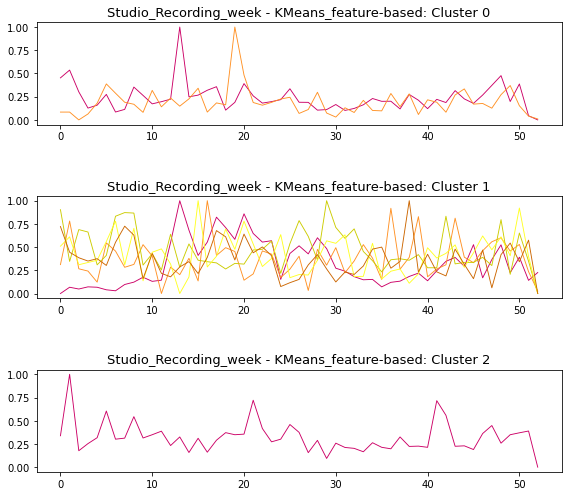

In [69]:
analyze_clusters_fb(labels_studio_fb, tss_studio_scaled, album_type, 'KMeans_feature-based', False)

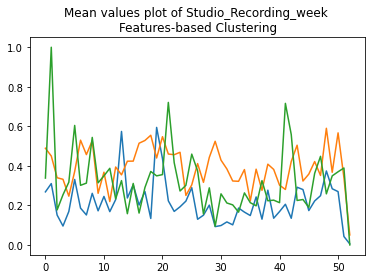

In [70]:
plot_mean_values(labels_studio_fb, tss_studio_scaled, album_type)

<h2>Compression-based Clustering</h2>

<h3>DBSCAN</h3>

In [71]:
M = pairwise_distances(tss_studio_scaled.reshape(tss_studio_scaled.shape[0], tss_studio_scaled.shape[1]), \
                       metric=cdm_dist)

In [72]:
print(tss_studio_scaled.shape, M.shape)

(8, 53, 1) (8, 8)


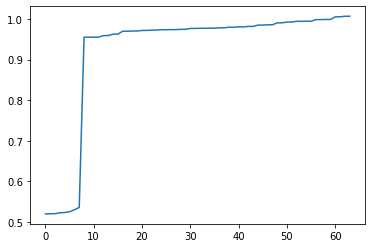

In [73]:
plt.plot(sorted(M.ravel()))
plt.show()

In [75]:
dbscan_compression_studio = DBSCAN(eps=0.96, min_samples=5, metric='precomputed')
dbscan_compression_studio.fit(M)

DBSCAN(eps=0.96, metric='precomputed')

In [76]:
dbscan_compression_studio.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1])

<h2>Approximation-based Clustering</h2>

<h3>PiecewiseAggregateApproximation</h3>

<h3>TimeSeriesKMeans</h3>

In [77]:
n_paa_segments = 26
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
X_paa = paa.fit_transform(tss_studio_scaled)

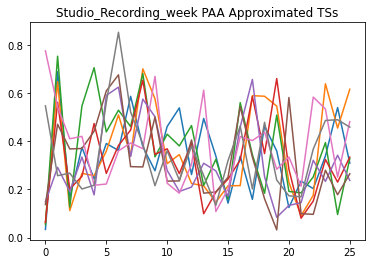

In [78]:
plt.plot(X_paa.reshape(X_paa.shape[1], X_paa.shape[0]))
plt.title(album_type + " PAA Approximated TSs")
plt.show()

<h3>Euclidean</h3>

k:  2 SSE:  0.42366204418914344 Silhouette Score:  0.20590673952519845

k:  3 SSE:  0.3058917255943736 Silhouette Score:  0.15934409955804263

k:  4 SSE:  0.20923756313047145 Silhouette Score:  0.1297407713885528

k:  5 SSE:  0.1301270803462503 Silhouette Score:  0.13514320925043008

k:  6 SSE:  0.07700011414793081 Silhouette Score:  0.07632948425689363

k:  7 SSE:  0.038068223329859784 Silhouette Score:  0.02138463180709318



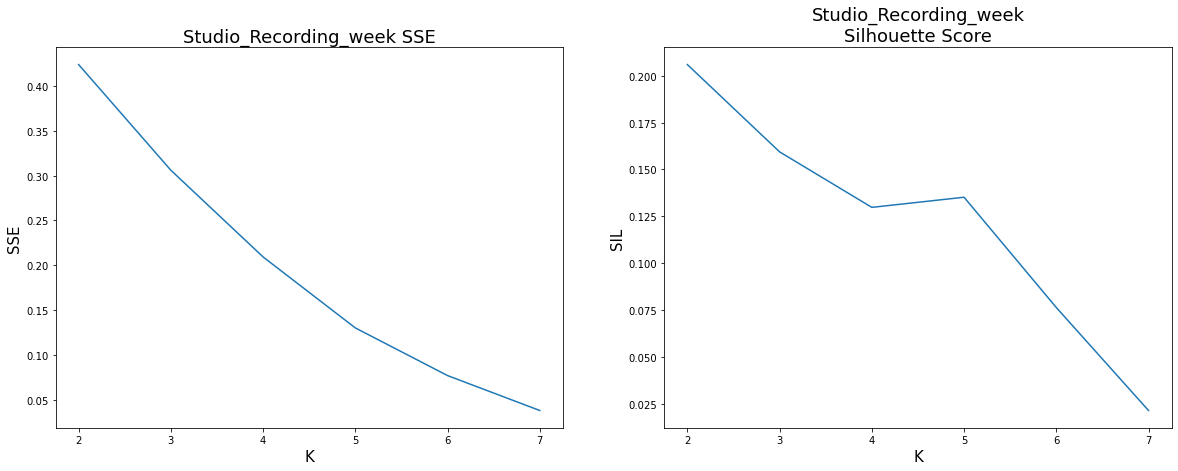

In [79]:
find_optimal_k_kmeans(7, 'euclidean', X_paa, False, album_type)

In [80]:
cluster_centers_studio_paa, dict_label_studio_paa, labels_studio_paa = run_kmeans(3, 300, 10, 'euclidean', X_paa,\
                                                                      False)

cluster_centers_shape (3, 26, 1)

Labels:  {0: 4, 1: 3, 2: 1}

SSE:  0.3058917255943736
Silhouette Score:  0.15934409955804263


0         1         2         3         4  \
track_date_created                                                     
2009_studio         0.033827  0.060254  0.053911  0.063425  0.149049   
2010_studio         0.546107  0.254098  0.334016  0.369877  0.420082   
2011_studio         0.624346  0.675393  0.359948  0.852094  0.586387   
2012_studio         0.669059  0.215311  0.460925  0.307018  0.429027   
2013_studio         0.494444  0.214646  0.216667  0.098990  0.308586   
2014_studio         0.560096  0.322115  0.459135  0.543269  0.419471   
2015_studio         0.084180  0.031930  0.283745  0.238752  0.124819   
2016_studio         0.583004  0.367589  0.338933  0.638340  0.394269   

                           5         6         7         8         9  ...  \
track_date_created                                                    ...   
2009_studio         0.137421  0.774841  0.546512  0.688161  0.646934  ...   
2010_studio         0.201844  0.243852  0.257172  0.704918  0.473361  ...   
2011_studio         0.341623  0.460733  0.446335  0.336387  0.294503  ...   
2012_studio         0.368421  0.279107  0.234450  0.225678  0.360447  ...   
2013_studio         0.184343  0.611616  0.257576  0.338384  0.146970  ...   
2014_studio         0.462740  0.158654  0.588942  0.343750  0.585337  ...   
2015_studio         0.229318  0.191582  0.283745  0.133527  0.581277  ...   
2016_studio         0.324111  0.233202  0.279644  0.533597  0.486166  ...   

                          17        18        19        20        21  \
track_date_created                                                     
2009_studio         0.112051  0.126850  0.201903  0.191332  0.367865   
2010_studio         0.266393  0.590164  0.608607  0.222336  0.560451   
2011_studio         0.293194  0.369110  0.388743  0.277487  0.575916   
2012_studio         0.238437  0.261563  0.224880  0.464912  0.391547   
2013_studio         0.215152  0.159596  0.242929  0.171212  0.251010   
2014_studio         0.348558  0.252404  0.161058  0.437500  0.478365   
2015_studio         0.099419  0.213353  0.169086  0.203193  0.175617   
2016_studio         0.489130  0.309289  0.615613  0.328063  0.333992   

                          22        23        24        25  Labels  
track_date_created                                                  
2009_studio         0.410148  0.267442  0.374207  0.266385       2  
2010_studio         0.361680  0.509221  0.528689  0.382172       0  
2011_studio         0.335079  0.345550  0.501309  0.500000       0  
2012_studio         0.209729  0.405104  0.303828  0.379585       1  
2013_studio         0.202020  0.319697  0.337374  0.215657       1  
2014_studio         0.359375  0.545673  0.508413  0.659856       0  
2015_studio         0.251814  0.151669  0.320755  0.096517       1  
2016_studio         0.237154  0.264822  0.481225  0.458498       0  

[8 rows x 27 columns]


Cluster 0
 ['2010_studio', '2011_studio', '2014_studio', '2016_studio']

Cluster 1
 ['2012_studio', '2013_studio', '2015_studio']

Cluster 2
 ['2009_studio']




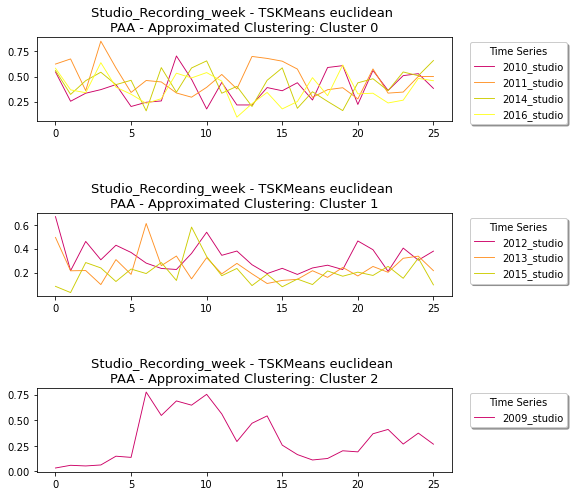

In [81]:
analyze_approximated_clusters(labels_studio_paa, X_paa, df_tss_studio_scaled, album_type, \
                               'TSKMeans euclidean \nPAA - Approximated Clustering', False)

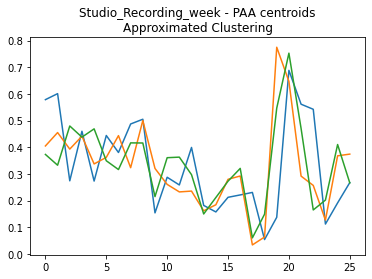

In [82]:
plot_centroids_approximated(cluster_centers_studio_paa, X_paa, album_type, 'PAA')

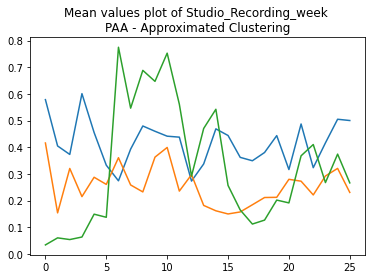

In [83]:
plot_mean_values_approximated(labels_studio_paa, X_paa, album_type, 'PAA')

<h3>DTW</h3>

k:  2 SSE:  0.12776552859913368 Silhouette Score:  0.37302130798098343

k:  3 SSE:  0.09934281119418562 Silhouette Score:  0.16736462808357874

k:  4 SSE:  0.06995291625874557 Silhouette Score:  0.11851867035993598

k:  5 SSE:  0.04949006667840479 Silhouette Score:  0.12171920791549856

k:  6 SSE:  0.03095039589610269 Silhouette Score:  0.03465831523188366

k:  7 SSE:  0.014394162030266135 Silhouette Score:  0.01960231693773568



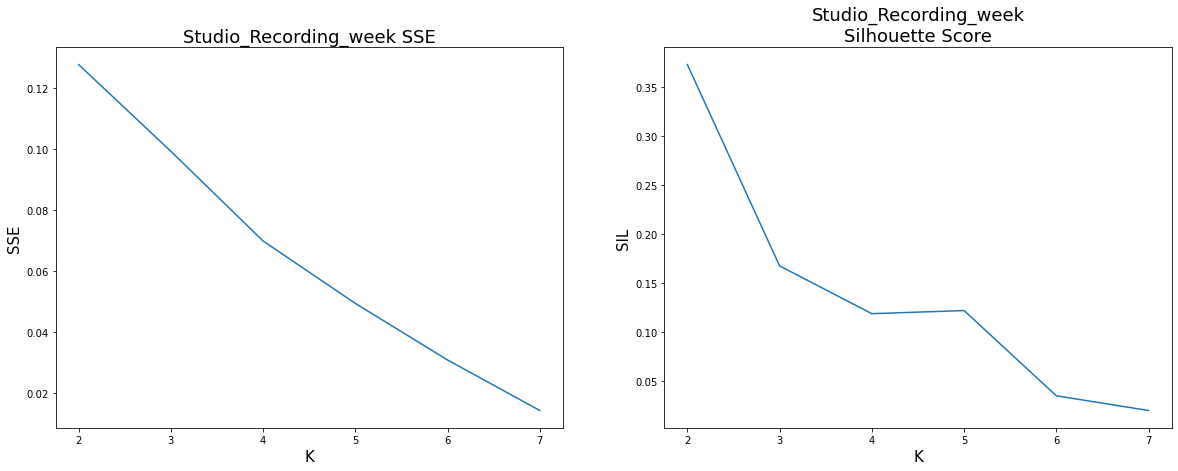

In [84]:
find_optimal_k_kmeans(7, 'dtw', X_paa, False, album_type)

In [85]:
cluster_centers_studio_paa_dtw, dict_label_studio_paa_dtw, \
labels_studio_paa_dtw = run_kmeans(3, 300, 10, 'dtw', X_paa, False)

cluster_centers_shape (3, 26, 1)

Labels:  {0: 3, 1: 1, 2: 4}

SSE:  0.09934281119418562
Silhouette Score:  0.16736462808357874


0         1         2         3         4  \
track_date_created                                                     
2009_studio         0.033827  0.060254  0.053911  0.063425  0.149049   
2010_studio         0.546107  0.254098  0.334016  0.369877  0.420082   
2011_studio         0.624346  0.675393  0.359948  0.852094  0.586387   
2012_studio         0.669059  0.215311  0.460925  0.307018  0.429027   
2013_studio         0.494444  0.214646  0.216667  0.098990  0.308586   
2014_studio         0.560096  0.322115  0.459135  0.543269  0.419471   
2015_studio         0.084180  0.031930  0.283745  0.238752  0.124819   
2016_studio         0.583004  0.367589  0.338933  0.638340  0.394269   

                           5         6         7         8         9  ...  \
track_date_created                                                    ...   
2009_studio         0.137421  0.774841  0.546512  0.688161  0.646934  ...   
2010_studio         0.201844  0.243852  0.257172  0.704918  0.473361  ...   
2011_studio         0.341623  0.460733  0.446335  0.336387  0.294503  ...   
2012_studio         0.368421  0.279107  0.234450  0.225678  0.360447  ...   
2013_studio         0.184343  0.611616  0.257576  0.338384  0.146970  ...   
2014_studio         0.462740  0.158654  0.588942  0.343750  0.585337  ...   
2015_studio         0.229318  0.191582  0.283745  0.133527  0.581277  ...   
2016_studio         0.324111  0.233202  0.279644  0.533597  0.486166  ...   

                          17        18        19        20        21  \
track_date_created                                                     
2009_studio         0.112051  0.126850  0.201903  0.191332  0.367865   
2010_studio         0.266393  0.590164  0.608607  0.222336  0.560451   
2011_studio         0.293194  0.369110  0.388743  0.277487  0.575916   
2012_studio         0.238437  0.261563  0.224880  0.464912  0.391547   
2013_studio         0.215152  0.159596  0.242929  0.171212  0.251010   
2014_studio         0.348558  0.252404  0.161058  0.437500  0.478365   
2015_studio         0.099419  0.213353  0.169086  0.203193  0.175617   
2016_studio         0.489130  0.309289  0.615613  0.328063  0.333992   

                          22        23        24        25  Labels  
track_date_created                                                  
2009_studio         0.410148  0.267442  0.374207  0.266385       0  
2010_studio         0.361680  0.509221  0.528689  0.382172       2  
2011_studio         0.335079  0.345550  0.501309  0.500000       2  
2012_studio         0.209729  0.405104  0.303828  0.379585       2  
2013_studio         0.202020  0.319697  0.337374  0.215657       0  
2014_studio         0.359375  0.545673  0.508413  0.659856       1  
2015_studio         0.251814  0.151669  0.320755  0.096517       0  
2016_studio         0.237154  0.264822  0.481225  0.458498       2  

[8 rows x 27 columns]


Cluster 0
 ['2009_studio', '2013_studio', '2015_studio']

Cluster 1
 ['2014_studio']

Cluster 2
 ['2010_studio', '2011_studio', '2012_studio', '2016_studio']




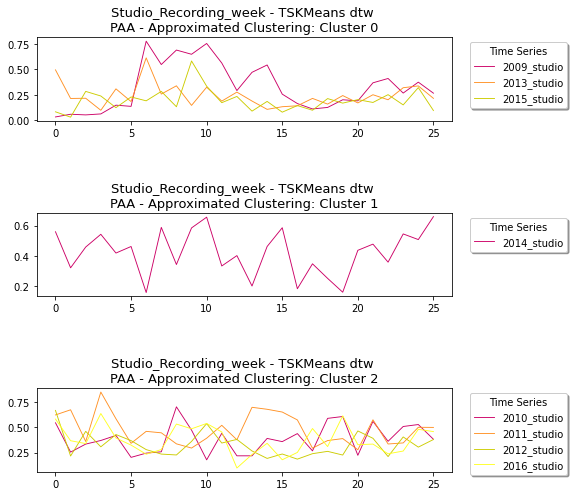

In [86]:
analyze_approximated_clusters(labels_studio_paa_dtw, X_paa, df_tss_studio_scaled, album_type, \
                               'TSKMeans dtw \nPAA - Approximated Clustering', False)

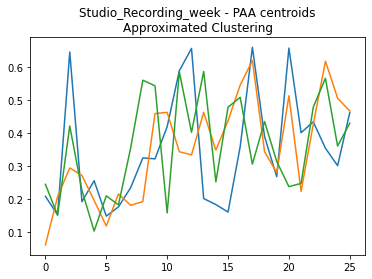

In [87]:
plot_centroids_approximated(cluster_centers_studio_paa_dtw, X_paa, album_type, 'PAA')

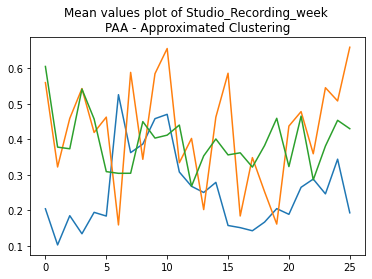

In [88]:
plot_mean_values_approximated(labels_studio_paa_dtw, X_paa, album_type, 'PAA')

<h3>OneD_SymbolicAggregateApproximation</h3>

<h3>TimeSeriesKMeans</h3>

In [89]:
n_sax1d_segments = 26
n_sax_symbols_avg = 10
#n_sax_symbols_slope = 4

one_d_sax = OneD_SymbolicAggregateApproximation(n_segments=n_sax1d_segments,\
     alphabet_size_avg=n_sax_symbols_avg)

X_sax1d = one_d_sax.fit_transform(tss_studio_scaled)
X_sax1d.shape

(8, 26, 2)

<h3>EUCLIDEAN</h3>

k:  2 SSE:  51.54166666666668 Silhouette Score:  0.08098992354146113

k:  3 SSE:  39.28125 Silhouette Score:  0.07212391024836858

k:  4 SSE:  30.0 Silhouette Score:  0.052871826313448986

k:  5 SSE:  21.291666666666668 Silhouette Score:  0.04553458865652611

k:  6 SSE:  12.375 Silhouette Score:  0.042634565860234036

k:  7 SSE:  4.687500000000001 Silhouette Score:  0.028970138783763585



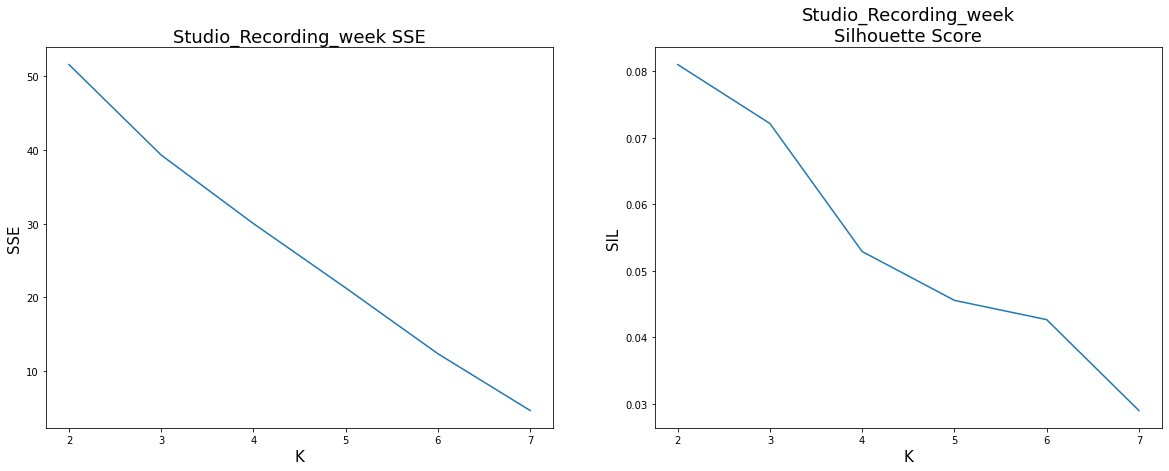

In [90]:
find_optimal_k_kmeans(7, 'euclidean', X_sax1d, False, album_type)

In [91]:
cluster_centers_studio_sax1d, dict_label_studio_sax1d, \
labels_studio_sax1d = run_kmeans(3, 1000, 10, 'euclidean', X_sax1d, False)

cluster_centers_shape (3, 26, 2)

Labels:  {0: 4, 1: 2, 2: 2}

SSE:  39.28125
Silhouette Score:  0.07212391024836858


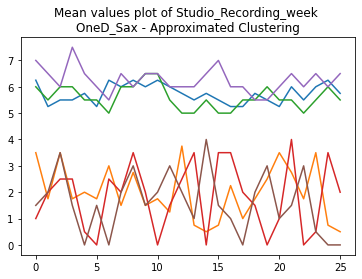

In [92]:
plot_mean_values_approximated(labels_studio_sax1d, X_sax1d, album_type, 'OneD_Sax')

<h3>DTW</h3>

k:  2 SSE:  23.870337301587302 Silhouette Score:  0.12382249467874953

k:  3 SSE:  18.488988095238096 Silhouette Score:  0.0502697198828765

k:  4 SSE:  13.460200216450216 Silhouette Score:  0.053597285440485774

k:  5 SSE:  8.370833333333334 Silhouette Score:  0.07877338729957292

k:  6 SSE:  5.166666666666666 Silhouette Score:  0.061043508391568385

k:  7 SSE:  2.114583333333333 Silhouette Score:  0.04367071749692293



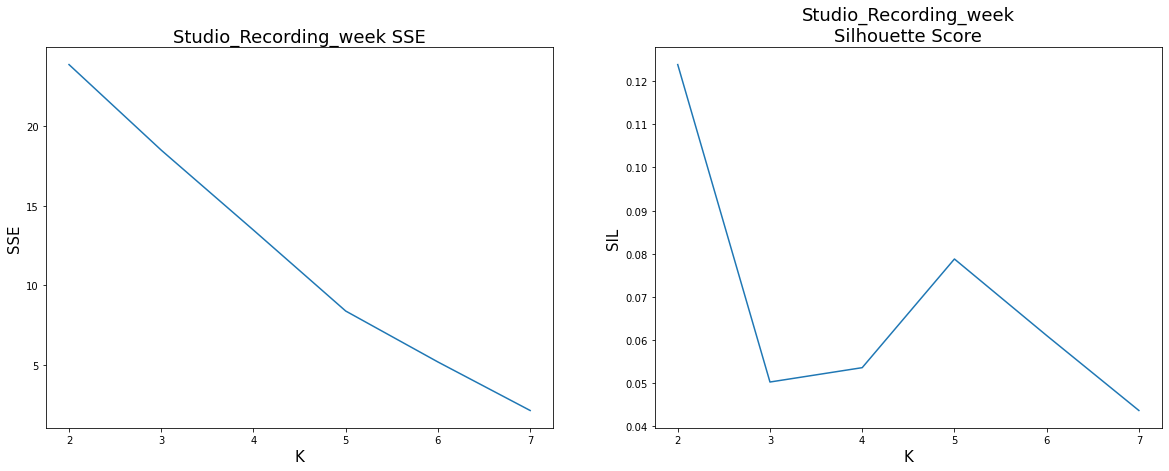

In [93]:
find_optimal_k_kmeans(7, 'dtw', X_sax1d, False, album_type)

In [94]:
cluster_centers_studio_sax1d_dtw, dict_label_studio_sax1d_dtw, \
labels_studio_sax1d_dtw = run_kmeans(5, 300, 10, 'dtw', X_sax1d, False)

cluster_centers_shape (5, 26, 2)

Labels:  {0: 2, 1: 1, 2: 1, 3: 2, 4: 2}

SSE:  8.370833333333334
Silhouette Score:  0.07877338729957292


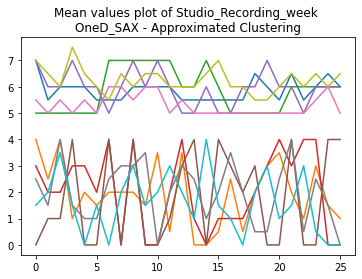

In [95]:
plot_mean_values_approximated(labels_studio_sax1d_dtw, X_sax1d, album_type, 'OneD_SAX')

<h3>SymbolicAggregateApproximation</h3>

<h3>TimeSeriesKMeans</h3>

In [96]:
n_sax_segments = 26
n_sax_symbols = 10

sax = SymbolicAggregateApproximation(n_segments=n_sax_segments, \
                                     alphabet_size_avg=n_sax_symbols)

X_sax = sax.fit_transform(tss_studio_scaled)

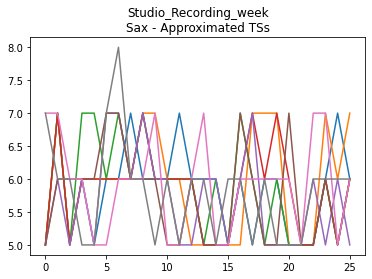

In [97]:
plt.plot(X_sax.reshape(X_sax.shape[1], X_sax.shape[0]))
plt.title(album_type + "\nSax - Approximated TSs")
plt.show()

<h3>Euclidean</h3>

k:  2 SSE:  7.59375 Silhouette Score:  0.19466837324096836

k:  3 SSE:  5.96875 Silhouette Score:  0.13197326806038653

k:  4 SSE:  4.249999999999998 Silhouette Score:  0.0997863380823143

k:  5 SSE:  2.812499999999999 Silhouette Score:  0.10043816471239789

k:  6 SSE:  1.6875 Silhouette Score:  0.06317740099874344

k:  7 SSE:  0.8124999999999999 Silhouette Score:  0.04123825829352443



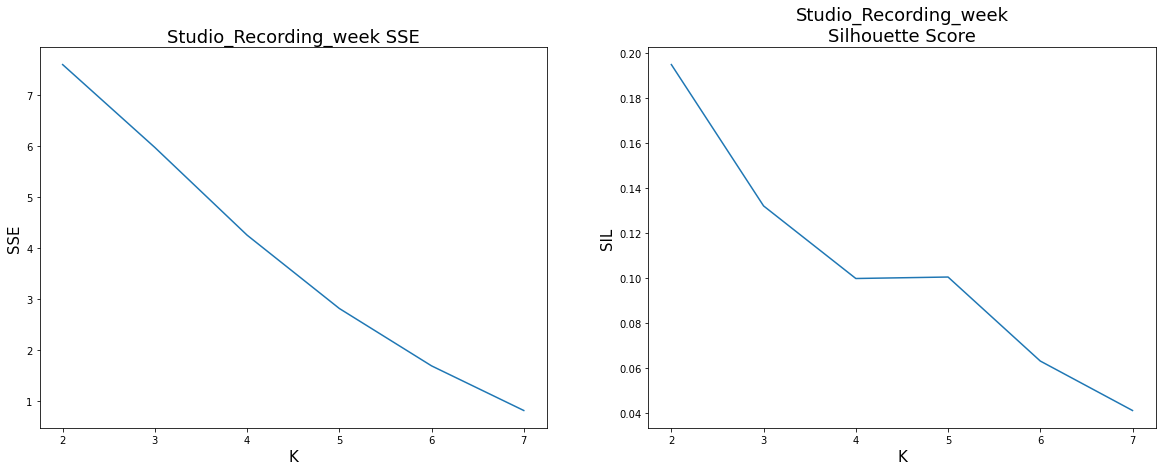

In [98]:
find_optimal_k_kmeans(7, 'euclidean', X_sax, False, album_type)

In [99]:
cluster_centers_studio_sax, dict_label_studio_sax, \
labels_studio_sax = run_kmeans(3, 1000, 10, 'euclidean', X_sax, False)

cluster_centers_shape (3, 26, 1)

Labels:  {0: 2, 1: 4, 2: 2}

SSE:  5.96875
Silhouette Score:  0.13197326806038653


0  1  2  3  4  5  6  7  8  9  ...  17  18  19  20  21  22  \
track_date_created                                ...                           
2009_studio         5  5  5  5  5  5  7  7  7  7  ...   5   5   5   5   6   6   
2010_studio         7  6  6  6  6  5  5  6  7  6  ...   6   7   7   5   7   6   
2011_studio         7  7  6  8  7  6  6  6  6  6  ...   6   6   6   6   7   6   
2012_studio         7  5  6  6  6  6  6  5  5  6  ...   5   6   5   6   6   5   
2013_studio         6  5  5  5  6  5  7  6  6  5  ...   5   5   5   5   5   5   
2014_studio         7  6  6  7  6  6  5  7  6  7  ...   6   5   5   6   6   6   
2015_studio         5  5  6  5  5  5  5  6  5  7  ...   5   5   5   5   5   5   
2016_studio         7  6  6  7  6  6  5  6  7  6  ...   6   6   7   6   6   5   

                    23  24  25  Labels  
track_date_created                      
2009_studio          6   6   6       1  
2010_studio          6   7   6       2  
2011_studio          6   6   6       0  
2012_studio          6   6   6       1  
2013_studio          6   6   5       1  
2014_studio          7   6   7       0  
2015_studio          5   6   5       1  
2016_studio          6   6   6       2  

[8 rows x 27 columns]


Cluster 0
 ['2011_studio', '2014_studio']

Cluster 1
 ['2009_studio', '2012_studio', '2013_studio', '2015_studio']

Cluster 2
 ['2010_studio', '2016_studio']




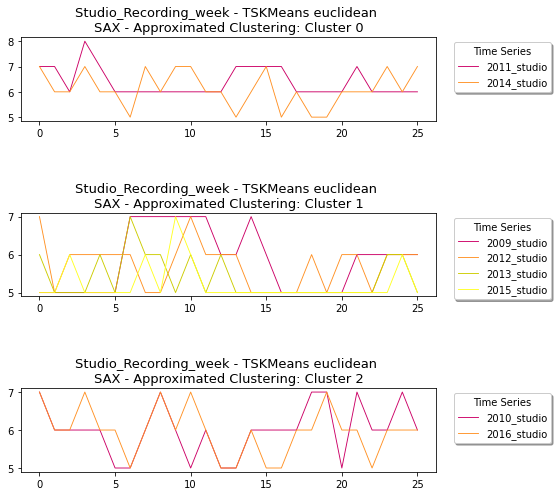

In [100]:
analyze_approximated_clusters(labels_studio_sax, X_sax, df_tss_studio_scaled, \
                              album_type, \
                              'TSKMeans euclidean \nSAX - Approximated Clustering', False)

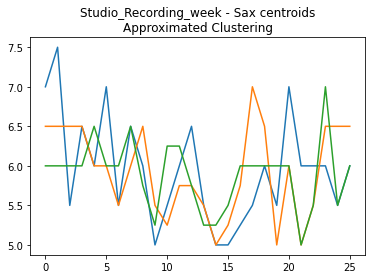

In [101]:
plot_centroids_approximated(cluster_centers_studio_sax, X_sax, album_type, 'Sax')

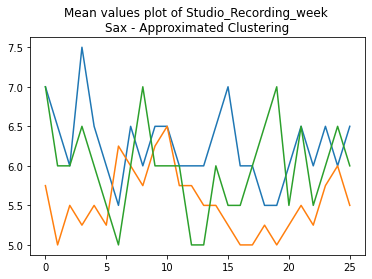

In [102]:
plot_mean_values_approximated(labels_studio_sax, X_sax, album_type, 'Sax')

<h3>DTW</h3>

k:  2 SSE:  2.5424908424908423 Silhouette Score:  0.31106104164714954

k:  3 SSE:  1.7654761904761904 Silhouette Score:  0.21357633856696256

k:  4 SSE:  1.1875 Silhouette Score:  0.12566793902021736

k:  5 SSE:  0.78125 Silhouette Score:  0.12949417062715937

k:  6 SSE:  0.4687499999999999 Silhouette Score:  0.10830022617306499

k:  7 SSE:  0.18749999999999997 Silhouette Score:  0.03349364905389035



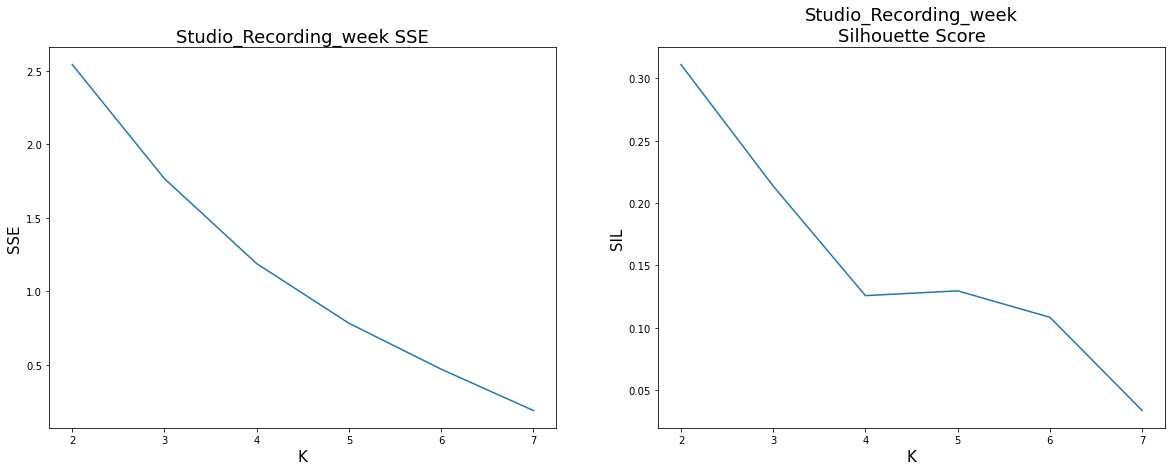

In [103]:
find_optimal_k_kmeans(7, 'dtw', X_sax, False, album_type)

In [104]:
cluster_centers_studio_sax_dtw, dict_label_studio_sax_dtw, \
labels_studio_sax_dtw = run_kmeans(3, 300, 10, 'dtw', X_sax, False)

cluster_centers_shape (3, 26, 1)

Labels:  {0: 4, 1: 3, 2: 1}

SSE:  1.7654761904761904
Silhouette Score:  0.21357633856696256


0  1  2  3  4  5  6  7  8  9  ...  17  18  19  20  21  22  \
track_date_created                                ...                           
2009_studio         5  5  5  5  5  5  7  7  7  7  ...   5   5   5   5   6   6   
2010_studio         7  6  6  6  6  5  5  6  7  6  ...   6   7   7   5   7   6   
2011_studio         7  7  6  8  7  6  6  6  6  6  ...   6   6   6   6   7   6   
2012_studio         7  5  6  6  6  6  6  5  5  6  ...   5   6   5   6   6   5   
2013_studio         6  5  5  5  6  5  7  6  6  5  ...   5   5   5   5   5   5   
2014_studio         7  6  6  7  6  6  5  7  6  7  ...   6   5   5   6   6   6   
2015_studio         5  5  6  5  5  5  5  6  5  7  ...   5   5   5   5   5   5   
2016_studio         7  6  6  7  6  6  5  6  7  6  ...   6   6   7   6   6   5   

                    23  24  25  Labels  
track_date_created                      
2009_studio          6   6   6       1  
2010_studio          6   7   6       0  
2011_studio          6   6   6       2  
2012_studio          6   6   6       0  
2013_studio          6   6   5       1  
2014_studio          7   6   7       0  
2015_studio          5   6   5       1  
2016_studio          6   6   6       0  

[8 rows x 27 columns]


Cluster 0
 ['2010_studio', '2012_studio', '2014_studio', '2016_studio']

Cluster 1
 ['2009_studio', '2013_studio', '2015_studio']

Cluster 2
 ['2011_studio']




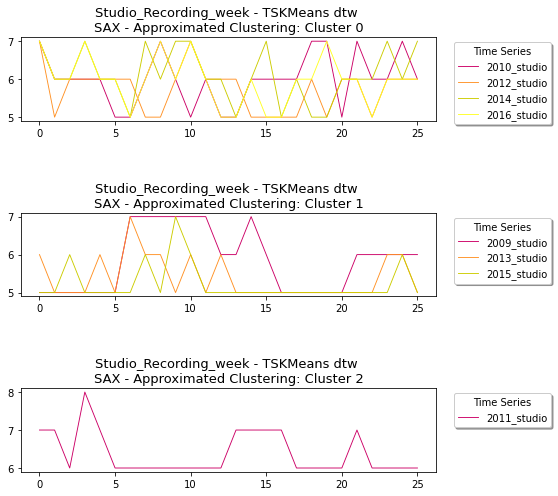

In [105]:
analyze_approximated_clusters(labels_studio_sax_dtw, X_sax, df_tss_studio_scaled, album_type, \
                               'TSKMeans dtw \nSAX - Approximated Clustering', False)

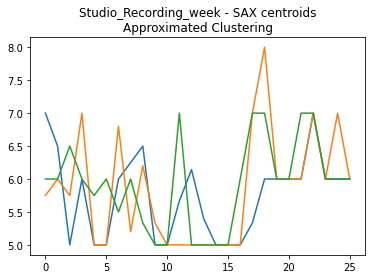

In [106]:
plot_centroids_approximated(cluster_centers_studio_sax_dtw, X_sax, album_type, 'SAX')

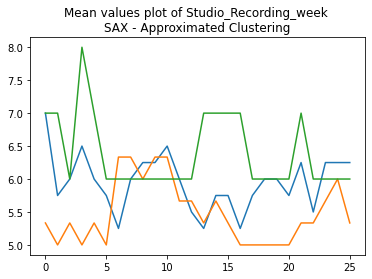

In [107]:
plot_mean_values_approximated(labels_studio_sax_dtw, X_sax, album_type, 'SAX')

**--------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

<h1>Live_Recording</h1>

In [116]:
album_type = "Live_Recording_week"

<h2>Shape based clustering</h2>

<h3>TimeSeriesKMeans</h3>

In [117]:
df_live

1   2   3   4   5   6    7    8   9  10  ...  44  45  \
track_date_created                                             ...           
2009_live           128  12  22  98  15  13   19  100  73  64  ...  37  24   
2010_live            23  48  35  54  54  39   26   29  11  12  ...  30   8   
2011_live             2  29  21  20   6   1   71   14  22   4  ...  62  36   
2012_live             8   6  14   2  72  17  106   20   6   0  ...   0   3   
2013_live            17   6   1  17   0   2   26   46  18   0  ...   8  25   
2014_live            21  14  17   5  55  17   36   43  11   0  ...   0  10   
2015_live             0  19  14  11  18  10   12   18  25  12  ...   0   7   
2016_live            23  21   6   9  23  30    7    7  51   1  ...  36   7   

                    46  47  48  49  50   51  52  53  
track_date_created                                   
2009_live           23  47   9  34  20  114  22   9  
2010_live           28   2  13  16  29    2   1   2  
2011_live           48  18  29  23  96   32   5   0  
2012_live            8   7  22  21  21   25   0   0  
2013_live           13   1   1  28  23   37   0   0  
2014_live            0   0   1  10   5    4   0   0  
2015_live           15   5   0   5   8   52   0  28  
2016_live           30   0   3  20  10   49   2   0  

[8 rows x 53 columns]

In [118]:
df_live.shape

(8, 53)

In [119]:
tss_live = to_time_series_dataset(df_live.values)
tss_live

array([[[128.],
        [ 12.],
        [ 22.],
        [ 98.],
        [ 15.],
        [ 13.],
        [ 19.],
        [100.],
        [ 73.],
        [ 64.],
        [ 74.],
        [ 75.],
        [113.],
        [123.],
        [ 66.],
        [ 43.],
        [105.],
        [ 51.],
        [ 66.],
        [ 47.],
        [  5.],
        [ 66.],
        [101.],
        [ 21.],
        [ 63.],
        [ 38.],
        [ 32.],
        [116.],
        [ 28.],
        [ 21.],
        [ 48.],
        [ 43.],
        [ 35.],
        [ 13.],
        [ 29.],
        [ 71.],
        [ 25.],
        [ 19.],
        [ 23.],
        [ 17.],
        [ 28.],
        [ 38.],
        [ 57.],
        [ 37.],
        [ 24.],
        [ 23.],
        [ 47.],
        [  9.],
        [ 34.],
        [ 20.],
        [114.],
        [ 22.],
        [  9.]],

       [[ 23.],
        [ 48.],
        [ 35.],
        [ 54.],
        [ 54.],
        [ 39.],
        [ 26.],
        [ 29.],
        [ 11.],
      

In [120]:
tss_live.shape

(8, 53, 1)

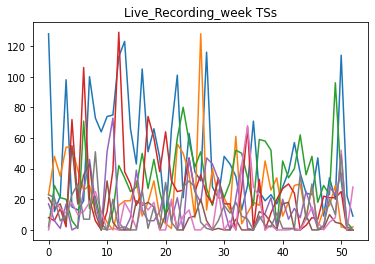

In [121]:
plt.plot(np.squeeze(tss_live).T)
plt.title(album_type + " TSs")
plt.show()

In [122]:
tss_live_scaled = TimeSeriesScalerMinMax().fit_transform(tss_live)
tss_live_scaled

array([[[1.        ],
        [0.05691057],
        [0.13821138],
        [0.75609756],
        [0.08130081],
        [0.06504065],
        [0.11382114],
        [0.77235772],
        [0.55284553],
        [0.4796748 ],
        [0.56097561],
        [0.56910569],
        [0.87804878],
        [0.95934959],
        [0.49593496],
        [0.30894309],
        [0.81300813],
        [0.37398374],
        [0.49593496],
        [0.34146341],
        [0.        ],
        [0.49593496],
        [0.7804878 ],
        [0.1300813 ],
        [0.47154472],
        [0.26829268],
        [0.2195122 ],
        [0.90243902],
        [0.18699187],
        [0.1300813 ],
        [0.3495935 ],
        [0.30894309],
        [0.24390244],
        [0.06504065],
        [0.19512195],
        [0.53658537],
        [0.16260163],
        [0.11382114],
        [0.14634146],
        [0.09756098],
        [0.18699187],
        [0.26829268],
        [0.42276423],
        [0.2601626 ],
        [0.15447154],
        [0

In [123]:
tss_live_scaled.shape

(8, 53, 1)

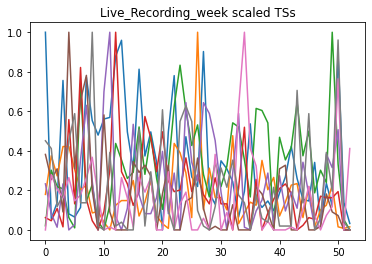

In [124]:
plt.plot(np.squeeze(tss_live_scaled).T)
plt.title(album_type + " scaled TSs")
plt.show()

**I convert scaled time series dataset to normal dataset**

In [125]:
df_tss_live_scaled = pd.DataFrame(np.squeeze(tss_live_scaled), columns = df_live.columns, \
                                    index = df_live.index)
df_tss_live_scaled

1         2         3         4         5  \
track_date_created                                                     
2009_live           1.000000  0.056911  0.138211  0.756098  0.081301   
2010_live           0.179688  0.375000  0.273438  0.421875  0.421875   
2011_live           0.020833  0.302083  0.218750  0.208333  0.062500   
2012_live           0.062016  0.046512  0.108527  0.015504  0.558140   
2013_live           0.232877  0.082192  0.013699  0.232877  0.000000   
2014_live           0.381818  0.254545  0.309091  0.090909  1.000000   
2015_live           0.000000  0.279412  0.205882  0.161765  0.264706   
2016_live           0.450980  0.411765  0.117647  0.176471  0.450980   

                           6         7         8         9        10  ...  \
track_date_created                                                    ...   
2009_live           0.065041  0.113821  0.772358  0.552846  0.479675  ...   
2010_live           0.304688  0.203125  0.226562  0.085938  0.093750  ...   
2011_live           0.010417  0.739583  0.145833  0.229167  0.041667  ...   
2012_live           0.131783  0.821705  0.155039  0.046512  0.000000  ...   
2013_live           0.027397  0.356164  0.630137  0.246575  0.000000  ...   
2014_live           0.309091  0.654545  0.781818  0.200000  0.000000  ...   
2015_live           0.147059  0.176471  0.264706  0.367647  0.176471  ...   
2016_live           0.588235  0.137255  0.137255  1.000000  0.019608  ...   

                          44        45        46        47        48  \
track_date_created                                                     
2009_live           0.260163  0.154472  0.146341  0.341463  0.032520   
2010_live           0.234375  0.062500  0.218750  0.015625  0.101562   
2011_live           0.645833  0.375000  0.500000  0.187500  0.302083   
2012_live           0.000000  0.023256  0.062016  0.054264  0.170543   
2013_live           0.109589  0.342466  0.178082  0.013699  0.013699   
2014_live           0.000000  0.181818  0.000000  0.000000  0.018182   
2015_live           0.000000  0.102941  0.220588  0.073529  0.000000   
2016_live           0.705882  0.137255  0.588235  0.000000  0.058824   

                          49        50        51        52        53  
track_date_created                                                    
2009_live           0.235772  0.121951  0.886179  0.138211  0.032520  
2010_live           0.125000  0.226562  0.015625  0.007812  0.015625  
2011_live           0.239583  1.000000  0.333333  0.052083  0.000000  
2012_live           0.162791  0.162791  0.193798  0.000000  0.000000  
2013_live           0.383562  0.315068  0.506849  0.000000  0.000000  
2014_live           0.181818  0.090909  0.072727  0.000000  0.000000  
2015_live           0.073529  0.117647  0.764706  0.000000  0.411765  
2016_live           0.392157  0.196078  0.960784  0.039216  0.000000  

[8 rows x 53 columns]

<h3>Euclidean Distance</h3>

k:  2 SSE:  1.870189647019457 Silhouette Score:  0.16107954742247046

k:  3 SSE:  1.45913177670886 Silhouette Score:  0.058856362273123145

k:  4 SSE:  1.0615998815961076 Silhouette Score:  0.054042957953481574

k:  5 SSE:  0.7320178262894659 Silhouette Score:  0.03922979276790723

k:  6 SSE:  0.4265097945539289 Silhouette Score:  0.03781347967384485

k:  7 SSE:  0.19494137094040548 Silhouette Score:  0.015780403035314805



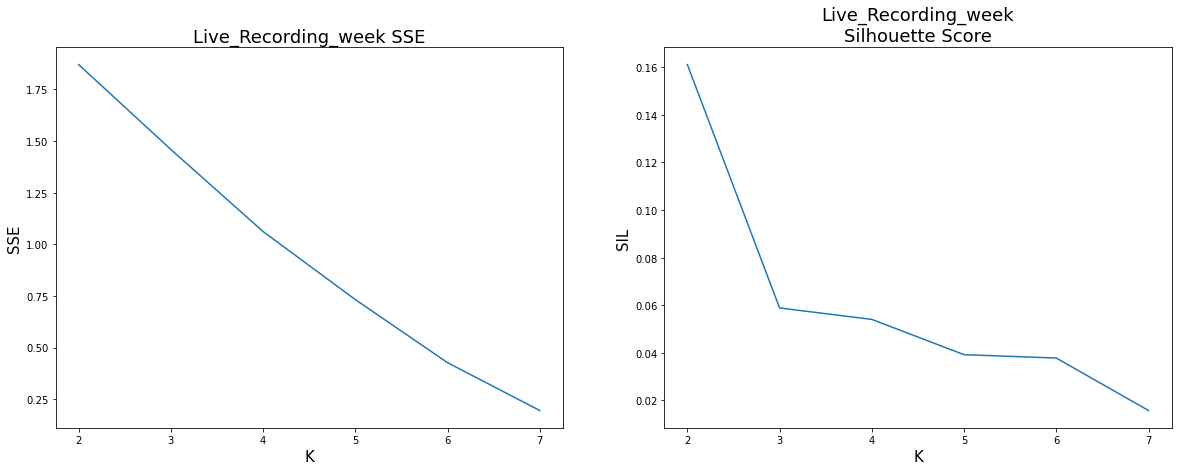

In [126]:
find_optimal_k_kmeans(7, 'euclidean', tss_live_scaled, False, album_type)

**We can see that best k is 3**

In [127]:
cluster_centers_live_eu, dict_label_live_eu, labels_live_eu = run_kmeans(3, 300, 10, 'euclidean', tss_live_scaled,\
                                                                      False)

cluster_centers_shape (3, 53, 1)

Labels:  {0: 1, 1: 2, 2: 5}

SSE:  1.45913177670886
Silhouette Score:  0.058856362273123145


In [128]:
cluster_insight(df_tss_live_scaled, labels_live_eu)

1         2         3         4         5  \
track_date_created                                                     
2009_live           1.000000  0.056911  0.138211  0.756098  0.081301   
2010_live           0.179688  0.375000  0.273438  0.421875  0.421875   
2011_live           0.020833  0.302083  0.218750  0.208333  0.062500   
2012_live           0.062016  0.046512  0.108527  0.015504  0.558140   
2013_live           0.232877  0.082192  0.013699  0.232877  0.000000   
2014_live           0.381818  0.254545  0.309091  0.090909  1.000000   
2015_live           0.000000  0.279412  0.205882  0.161765  0.264706   
2016_live           0.450980  0.411765  0.117647  0.176471  0.450980   

                           6         7         8         9        10  ...  \
track_date_created                                                    ...   
2009_live           0.065041  0.113821  0.772358  0.552846  0.479675  ...   
2010_live           0.304688  0.203125  0.226562  0.085938  0.093750  ...   
2011_live           0.010417  0.739583  0.145833  0.229167  0.041667  ...   
2012_live           0.131783  0.821705  0.155039  0.046512  0.000000  ...   
2013_live           0.027397  0.356164  0.630137  0.246575  0.000000  ...   
2014_live           0.309091  0.654545  0.781818  0.200000  0.000000  ...   
2015_live           0.147059  0.176471  0.264706  0.367647  0.176471  ...   
2016_live           0.588235  0.137255  0.137255  1.000000  0.019608  ...   

                          45        46        47        48        49  \
track_date_created                                                     
2009_live           0.154472  0.146341  0.341463  0.032520  0.235772   
2010_live           0.062500  0.218750  0.015625  0.101562  0.125000   
2011_live           0.375000  0.500000  0.187500  0.302083  0.239583   
2012_live           0.023256  0.062016  0.054264  0.170543  0.162791   
2013_live           0.342466  0.178082  0.013699  0.013699  0.383562   
2014_live           0.181818  0.000000  0.000000  0.018182  0.181818   
2015_live           0.102941  0.220588  0.073529  0.000000  0.073529   
2016_live           0.137255  0.588235  0.000000  0.058824  0.392157   

                          50        51        52        53  Labels  
track_date_created                                                  
2009_live           0.121951  0.886179  0.138211  0.032520       0  
2010_live           0.226562  0.015625  0.007812  0.015625       2  
2011_live           1.000000  0.333333  0.052083  0.000000       2  
2012_live           0.162791  0.193798  0.000000  0.000000       2  
2013_live           0.315068  0.506849  0.000000  0.000000       2  
2014_live           0.090909  0.072727  0.000000  0.000000       2  
2015_live           0.117647  0.764706  0.000000  0.411765       1  
2016_live           0.196078  0.960784  0.039216  0.000000       1  

[8 rows x 54 columns]

Cluster 0
 ['2009_live']

Cluster 1
 ['2015_live', '2016_live']

Cluster 2
 ['2010_live', '2011_live', '2012_live', '2013_live', '2014_live']



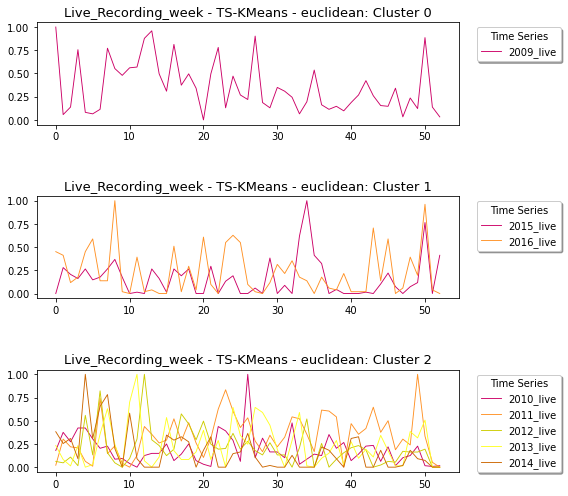

In [129]:
analyze_clusters(labels_live_eu, tss_live_scaled, df_tss_live_scaled, album_type, 'TS-KMeans - euclidean', False)

**Centroids**

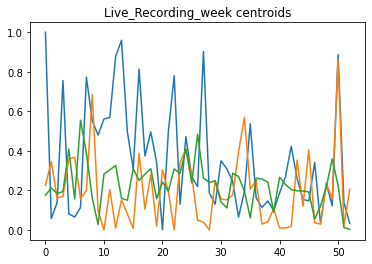

In [130]:
plot_kmeans_centroids(cluster_centers_live_eu, album_type)

<h3>DTW distance</h3>

k:  2 SSE:  0.671433744890781 Silhouette Score:  0.1229494980791619

k:  3 SSE:  0.4634136000983908 Silhouette Score:  0.1041516709085167

k:  4 SSE:  0.33227836319913384 Silhouette Score:  0.08825571187499788

k:  5 SSE:  0.23799209037596514 Silhouette Score:  0.025872664428285397

k:  6 SSE:  0.12905738332514494 Silhouette Score:  0.03008763907986747

k:  7 SSE:  0.056213202624644486 Silhouette Score:  0.01254312060616716



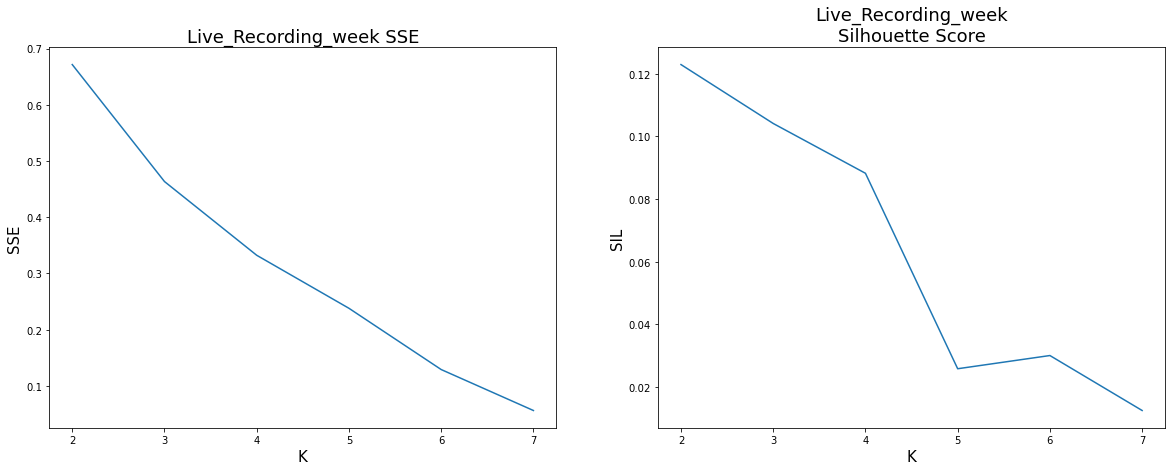

In [131]:
find_optimal_k_kmeans(7, 'dtw', tss_live_scaled, False, album_type)

**We can see that best k is 3**

In [132]:
cluster_centers_live_dtw, dict_label_live_dtw, labels_live_dtw = run_kmeans(3, 300, 10, 'dtw', tss_live_scaled,\
                                                                      False)

cluster_centers_shape (3, 53, 1)

Labels:  {0: 5, 1: 1, 2: 2}

SSE:  0.4634136000983908
Silhouette Score:  0.1041516709085167


In [133]:
cluster_insight(df_tss_live_scaled, labels_live_dtw)

1         2         3         4         5  \
track_date_created                                                     
2009_live           1.000000  0.056911  0.138211  0.756098  0.081301   
2010_live           0.179688  0.375000  0.273438  0.421875  0.421875   
2011_live           0.020833  0.302083  0.218750  0.208333  0.062500   
2012_live           0.062016  0.046512  0.108527  0.015504  0.558140   
2013_live           0.232877  0.082192  0.013699  0.232877  0.000000   
2014_live           0.381818  0.254545  0.309091  0.090909  1.000000   
2015_live           0.000000  0.279412  0.205882  0.161765  0.264706   
2016_live           0.450980  0.411765  0.117647  0.176471  0.450980   

                           6         7         8         9        10  ...  \
track_date_created                                                    ...   
2009_live           0.065041  0.113821  0.772358  0.552846  0.479675  ...   
2010_live           0.304688  0.203125  0.226562  0.085938  0.093750  ...   
2011_live           0.010417  0.739583  0.145833  0.229167  0.041667  ...   
2012_live           0.131783  0.821705  0.155039  0.046512  0.000000  ...   
2013_live           0.027397  0.356164  0.630137  0.246575  0.000000  ...   
2014_live           0.309091  0.654545  0.781818  0.200000  0.000000  ...   
2015_live           0.147059  0.176471  0.264706  0.367647  0.176471  ...   
2016_live           0.588235  0.137255  0.137255  1.000000  0.019608  ...   

                          45        46        47        48        49  \
track_date_created                                                     
2009_live           0.154472  0.146341  0.341463  0.032520  0.235772   
2010_live           0.062500  0.218750  0.015625  0.101562  0.125000   
2011_live           0.375000  0.500000  0.187500  0.302083  0.239583   
2012_live           0.023256  0.062016  0.054264  0.170543  0.162791   
2013_live           0.342466  0.178082  0.013699  0.013699  0.383562   
2014_live           0.181818  0.000000  0.000000  0.018182  0.181818   
2015_live           0.102941  0.220588  0.073529  0.000000  0.073529   
2016_live           0.137255  0.588235  0.000000  0.058824  0.392157   

                          50        51        52        53  Labels  
track_date_created                                                  
2009_live           0.121951  0.886179  0.138211  0.032520       1  
2010_live           0.226562  0.015625  0.007812  0.015625       0  
2011_live           1.000000  0.333333  0.052083  0.000000       2  
2012_live           0.162791  0.193798  0.000000  0.000000       0  
2013_live           0.315068  0.506849  0.000000  0.000000       0  
2014_live           0.090909  0.072727  0.000000  0.000000       0  
2015_live           0.117647  0.764706  0.000000  0.411765       0  
2016_live           0.196078  0.960784  0.039216  0.000000       2  

[8 rows x 54 columns]

Cluster 0
 ['2010_live', '2012_live', '2013_live', '2014_live', '2015_live']

Cluster 1
 ['2009_live']

Cluster 2
 ['2011_live', '2016_live']



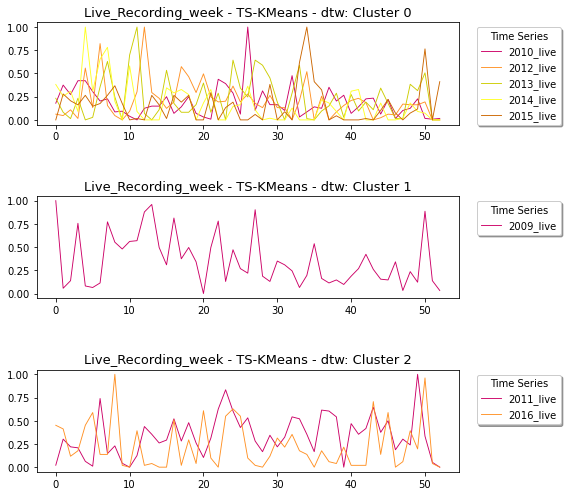

In [134]:
analyze_clusters(labels_live_dtw, tss_live_scaled, df_tss_live_scaled, album_type, 'TS-KMeans - dtw', False)

**Centroids**

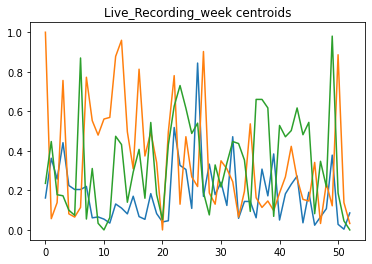

In [135]:
plot_kmeans_centroids(cluster_centers_live_dtw, album_type)

<h3>KMeans sklearn</h3>

k:  2 SSE:  14.961517176155656 Silhouette Score:  0.16107954742247033
Calinski-Harabaz:  1.8694151002166082 Davies-Bouldin:  0.6299387813247306

k:  3 SSE:  11.673054213670884 Silhouette Score:  0.058856362273123075
Calinski-Harabaz:  1.7026415078490595 Davies-Bouldin:  1.2678805047015012

k:  4 SSE:  8.492799052768861 Silhouette Score:  0.05404295795348152
Calinski-Harabaz:  1.747404397972601 Davies-Bouldin:  1.0336245432114517

k:  5 SSE:  5.856142610315727 Silhouette Score:  0.03922979276790725
Calinski-Harabaz:  1.763138703726038 Davies-Bouldin:  0.5953365436378084

k:  6 SSE:  3.4120783564314303 Silhouette Score:  0.037813479673844824
Calinski-Harabaz:  1.9004237083489846 Davies-Bouldin:  0.5313840808190617

k:  7 SSE:  1.5595309675232436 Silhouette Score:  0.015780403035314788
Calinski-Harabaz:  1.9304451438009869 Davies-Bouldin:  0.442817447100308



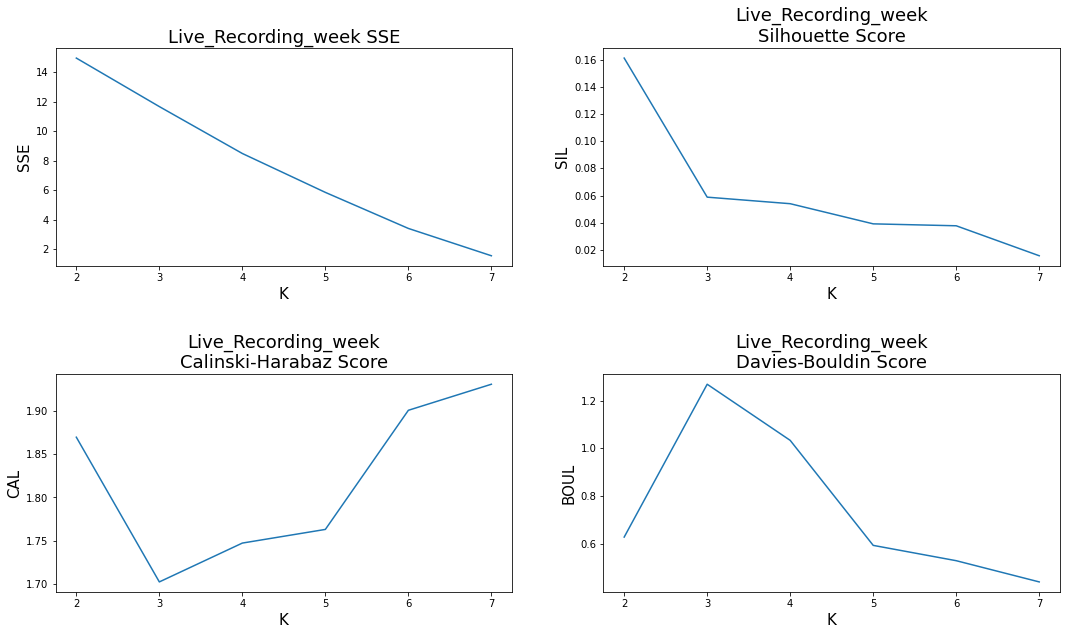

In [136]:
find_optimal_k_kmeans(7, "", df_tss_live_scaled, True, album_type)

In [137]:
cluster_centers_live_2, dict_label_live_2, labels_live_2 = run_kmeans(3, 300, 10, '', df_tss_live_scaled,\
                                                                      True)

cluster_centers_shape (3, 53)

Labels:  {0: 1, 1: 2, 2: 5}

SSE:  11.673054213670884
Silhouette Score:  0.058856362273123075
Calinski - Harabaz Score:  1.7026415078490595
Davies - Bouldin Score:  1.2678805047015012


In [138]:
cluster_insight(df_tss_live_scaled, labels_live_2)

1         2         3         4         5  \
track_date_created                                                     
2009_live           1.000000  0.056911  0.138211  0.756098  0.081301   
2010_live           0.179688  0.375000  0.273438  0.421875  0.421875   
2011_live           0.020833  0.302083  0.218750  0.208333  0.062500   
2012_live           0.062016  0.046512  0.108527  0.015504  0.558140   
2013_live           0.232877  0.082192  0.013699  0.232877  0.000000   
2014_live           0.381818  0.254545  0.309091  0.090909  1.000000   
2015_live           0.000000  0.279412  0.205882  0.161765  0.264706   
2016_live           0.450980  0.411765  0.117647  0.176471  0.450980   

                           6         7         8         9        10  ...  \
track_date_created                                                    ...   
2009_live           0.065041  0.113821  0.772358  0.552846  0.479675  ...   
2010_live           0.304688  0.203125  0.226562  0.085938  0.093750  ...   
2011_live           0.010417  0.739583  0.145833  0.229167  0.041667  ...   
2012_live           0.131783  0.821705  0.155039  0.046512  0.000000  ...   
2013_live           0.027397  0.356164  0.630137  0.246575  0.000000  ...   
2014_live           0.309091  0.654545  0.781818  0.200000  0.000000  ...   
2015_live           0.147059  0.176471  0.264706  0.367647  0.176471  ...   
2016_live           0.588235  0.137255  0.137255  1.000000  0.019608  ...   

                          45        46        47        48        49  \
track_date_created                                                     
2009_live           0.154472  0.146341  0.341463  0.032520  0.235772   
2010_live           0.062500  0.218750  0.015625  0.101562  0.125000   
2011_live           0.375000  0.500000  0.187500  0.302083  0.239583   
2012_live           0.023256  0.062016  0.054264  0.170543  0.162791   
2013_live           0.342466  0.178082  0.013699  0.013699  0.383562   
2014_live           0.181818  0.000000  0.000000  0.018182  0.181818   
2015_live           0.102941  0.220588  0.073529  0.000000  0.073529   
2016_live           0.137255  0.588235  0.000000  0.058824  0.392157   

                          50        51        52        53  Labels  
track_date_created                                                  
2009_live           0.121951  0.886179  0.138211  0.032520       0  
2010_live           0.226562  0.015625  0.007812  0.015625       2  
2011_live           1.000000  0.333333  0.052083  0.000000       2  
2012_live           0.162791  0.193798  0.000000  0.000000       2  
2013_live           0.315068  0.506849  0.000000  0.000000       2  
2014_live           0.090909  0.072727  0.000000  0.000000       2  
2015_live           0.117647  0.764706  0.000000  0.411765       1  
2016_live           0.196078  0.960784  0.039216  0.000000       1  

[8 rows x 54 columns]

Cluster 0
 ['2009_live']

Cluster 1
 ['2015_live', '2016_live']

Cluster 2
 ['2010_live', '2011_live', '2012_live', '2013_live', '2014_live']



<h2>Feature based Clustering</h2>

<h3>KMeans</h3>

In [139]:
F = [list(calculate_features(x).values())for x in tss_live_scaled]

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead

k:  2 SSE:  13.204931220062438 Silhouette Score:  0.6778322793617108
Calinski-Harabaz:  21.605298131273432 Davies-Bouldin:  0.41163000035252606

k:  3 SSE:  1.883657280817909 Silhouette Score:  0.6886405950042052
Calinski-Harabaz:  78.1334895340988 Davies-Bouldin:  0.19407826550030513

k:  4 SSE:  0.83119258796997 Silhouette Score:  0.602029482796854
Calinski-Harabaz:  96.12397437092152 Davies-Bouldin:  0.2527146907104085

k:  5 SSE:  0.31662480911150237 Silhouette Score:  0.4276330541700636
Calinski-Harabaz:  143.1608894197598 Davies-Bouldin:  0.26273917533825414

k:  6 SSE:  0.1086458469440159 Silhouette Score:  0.328308662037683
Calinski-Harabaz:  223.27847668128564 Davies-Bouldin:  0.1298260351737851

k:  7 SSE:  0.007473826675810275 Silhouette Score:  0.21504212794092908
Calinski-Harabaz:  1354.657898463201 Davies-Bouldin:  0.03602191590520794



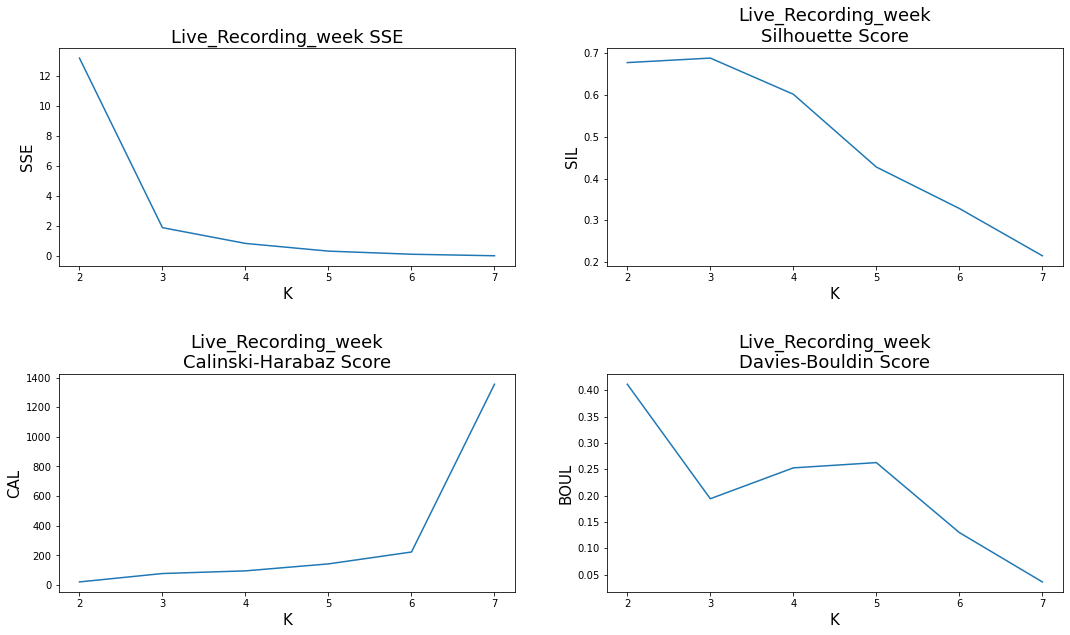

In [140]:
find_optimal_k_kmeans(7, "", F, True, album_type)

In [141]:
cluster_centers_live_fb, dict_label_live_fb, labels_live_fb = run_kmeans(3, 300, 10, "", F, True)

cluster_centers_shape (3, 5)

Labels:  {0: 4, 1: 3, 2: 1}

SSE:  1.883657280817909
Silhouette Score:  0.6886405950042052
Calinski - Harabaz Score:  78.1334895340988
Davies - Bouldin Score:  0.19407826550030513


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead

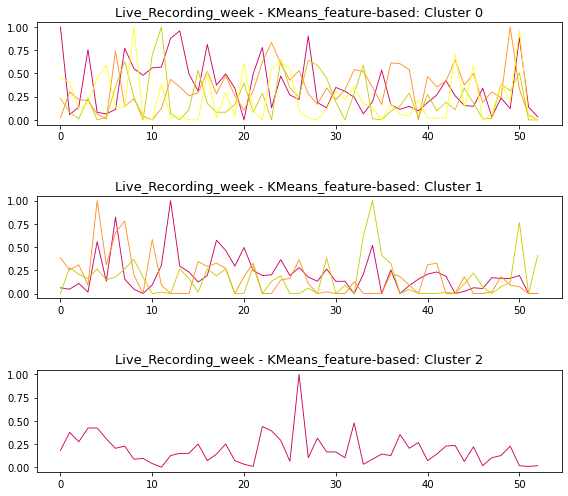

In [142]:
analyze_clusters_fb(labels_live_fb, tss_live_scaled, album_type, 'KMeans_feature-based', False)

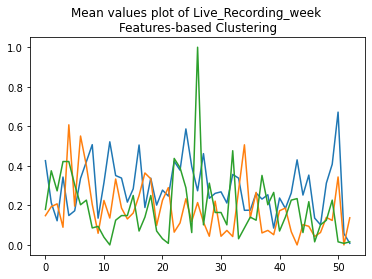

In [143]:
plot_mean_values(labels_live_fb, tss_live_scaled, album_type)

<h2>Compression-based Clustering</h2>

<h3>DBSCAN</h3>

In [144]:
M = pairwise_distances(tss_live_scaled.reshape(tss_live_scaled.shape[0], tss_live_scaled.shape[1]), \
                       metric=cdm_dist)

In [145]:
print(tss_live_scaled.shape, M.shape)

(8, 53, 1) (8, 8)


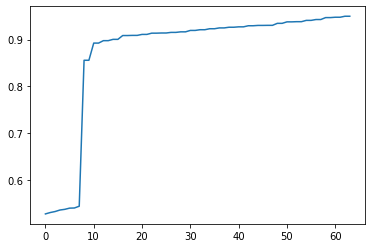

In [146]:
plt.plot(sorted(M.ravel()))
plt.show()

In [147]:
dbscan_compression_live = DBSCAN(eps=0.86, min_samples=5, metric='precomputed')
dbscan_compression_live.fit(M)

DBSCAN(eps=0.86, metric='precomputed')

In [148]:
dbscan_compression_live.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1])

<h2>Approximation-based Clustering</h2>

<h3>PiecewiseAggregateApproximation</h3>

<h3>TimeSeriesKMeans</h3>

In [149]:
n_paa_segments = 26
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
X_paa = paa.fit_transform(tss_live_scaled)

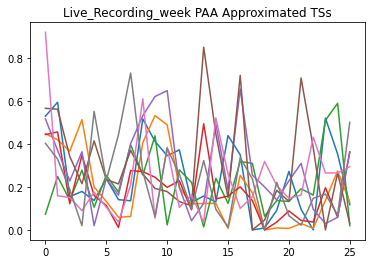

In [150]:
plt.plot(X_paa.reshape(X_paa.shape[1], X_paa.shape[0]))
plt.title(album_type + " PAA Approximated TSs")
plt.show()

<h3>Euclidean</h3>

k:  2 SSE:  0.5631134705846041 Silhouette Score:  0.15471240833076974

k:  3 SSE:  0.44431293634766167 Silhouette Score:  0.11799747076136682

k:  4 SSE:  0.3211683048400227 Silhouette Score:  0.077079510206079

k:  5 SSE:  0.21437506149593394 Silhouette Score:  0.05303588609837131

k:  6 SSE:  0.1305089553108128 Silhouette Score:  0.03394215417860806

k:  7 SSE:  0.06144379782882167 Silhouette Score:  0.010770133804037605



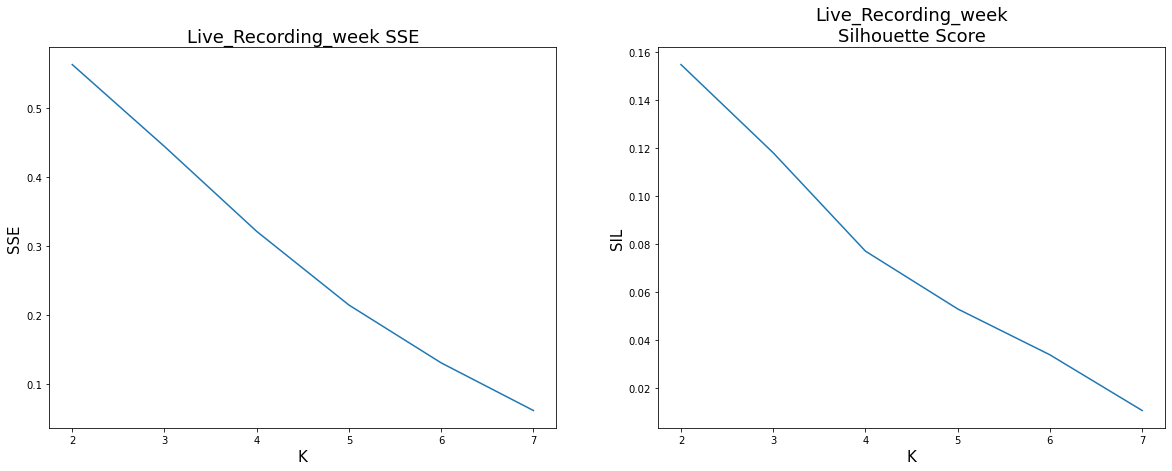

In [151]:
find_optimal_k_kmeans(7, 'euclidean', X_paa, False, album_type)

In [152]:
cluster_centers_live_paa, dict_label_live_paa, labels_live_paa = run_kmeans(3, 300, 10, 'euclidean', X_paa,\
                                                                      False)

cluster_centers_shape (3, 26, 1)

Labels:  {0: 6, 1: 1, 2: 1}

SSE:  0.44431293634766167
Silhouette Score:  0.11799747076136682


0         1         2         3         4  \
track_date_created                                                     
2009_live           0.528455  0.447154  0.073171  0.443089  0.516260   
2010_live           0.277344  0.347656  0.363281  0.214844  0.089844   
2011_live           0.161458  0.213542  0.036458  0.442708  0.135417   
2012_live           0.054264  0.062016  0.344961  0.488372  0.023256   
2013_live           0.157534  0.123288  0.013699  0.493151  0.123288   
2014_live           0.318182  0.200000  0.654545  0.718182  0.100000   
2015_live           0.139706  0.183824  0.205882  0.220588  0.272059   
2016_live           0.431373  0.147059  0.519608  0.137255  0.509804   

                           5         6         7         8         9  ...  \
track_date_created                                                    ...   
2009_live           0.565041  0.918699  0.402439  0.593496  0.418699  ...   
2010_live           0.019531  0.136719  0.199219  0.105469  0.160156  ...   
2011_live           0.062500  0.395833  0.276042  0.401042  0.369792  ...   
2012_live           0.197674  0.647287  0.178295  0.383721  0.379845  ...   
2013_live           0.849315  0.034247  0.321918  0.130137  0.123288  ...   
2014_live           0.336364  0.000000  0.172727  0.309091  0.136364  ...   
2015_live           0.007353  0.132353  0.088235  0.227941  0.132353  ...   
2016_live           0.196078  0.029412  0.000000  0.264706  0.166667  ...   

                          17        18        19        20        21  \
track_date_created                                                     
2009_live           0.365854  0.138211  0.121951  0.227642  0.341463   
2010_live           0.113281  0.238281  0.234375  0.105469  0.230469   
2011_live           0.260417  0.609375  0.270833  0.411458  0.531250   
2012_live           0.259690  0.127907  0.120155  0.220930  0.093023   
2013_live           0.006849  0.123288  0.157534  0.184932  0.150685   
2014_live           0.000000  0.200000  0.045455  0.318182  0.000000   
2015_live           0.705882  0.161765  0.022059  0.000000  0.007353   
2016_live           0.068627  0.117647  0.127451  0.019608  0.362745   

                          22        23        24        25  Labels  
track_date_created                                                  
2009_live           0.150407  0.186992  0.178862  0.512195       2  
2010_live           0.140625  0.058594  0.175781  0.011719       0  
2011_live           0.437500  0.244792  0.619792  0.192708       1  
2012_live           0.042636  0.112403  0.162791  0.096899       0  
2013_live           0.260274  0.013699  0.349315  0.253425       0  
2014_live           0.090909  0.009091  0.136364  0.036364       0  
2015_live           0.161765  0.036765  0.095588  0.382353       0  
2016_live           0.362745  0.029412  0.294118  0.500000       0  

[8 rows x 27 columns]


Cluster 0
 ['2010_live', '2012_live', '2013_live', '2014_live', '2015_live', '2016_live']

Cluster 1
 ['2011_live']

Cluster 2
 ['2009_live']




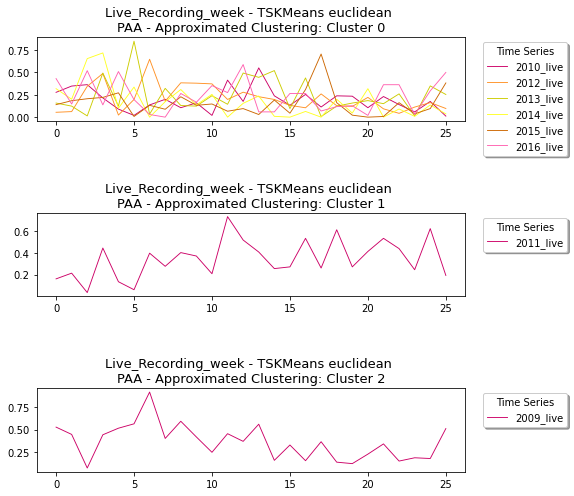

In [153]:
analyze_approximated_clusters(labels_live_paa, X_paa, df_tss_live_scaled, album_type, \
                               'TSKMeans euclidean \nPAA - Approximated Clustering', False)

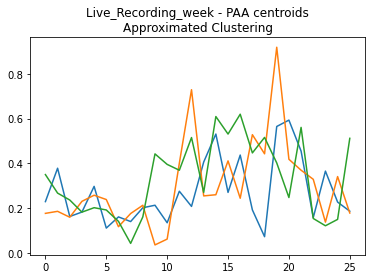

In [154]:
plot_centroids_approximated(cluster_centers_live_paa, X_paa, album_type, 'PAA')

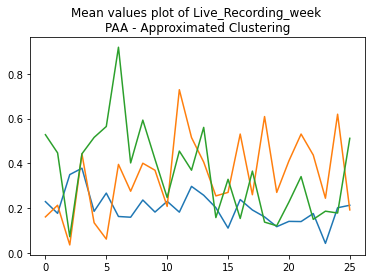

In [155]:
plot_mean_values_approximated(labels_live_paa, X_paa, album_type, 'PAA')

<h3>DTW</h3>

k:  2 SSE:  0.2134570851296138 Silhouette Score:  0.1638765106924717

k:  3 SSE:  0.17364791265547946 Silhouette Score:  0.07476557631419481

k:  4 SSE:  0.11330526224230923 Silhouette Score:  0.1145520368155876

k:  5 SSE:  0.07470319213272639 Silhouette Score:  0.0468933911057223

k:  6 SSE:  0.04632344996453103 Silhouette Score:  1.1721183274436553e-05

k:  7 SSE:  0.02111068184400512 Silhouette Score:  0.023749817903509236



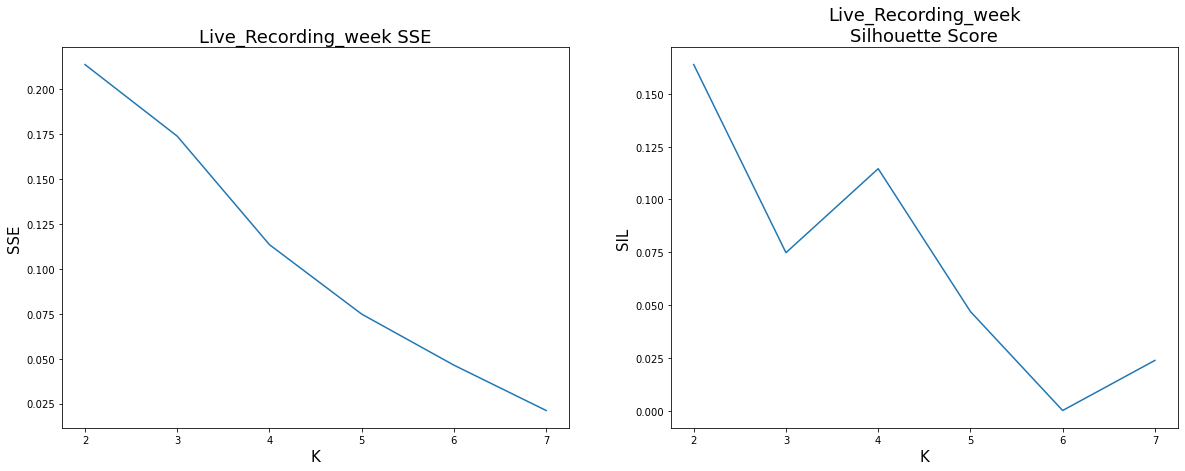

In [156]:
find_optimal_k_kmeans(7, 'dtw', X_paa, False, album_type)

In [157]:
cluster_centers_live_paa_dtw, dict_label_live_paa_dtw, labels_live_paa_dtw = run_kmeans(4, 300, 10, 'dtw', X_paa,\
                                                                      False)

cluster_centers_shape (4, 26, 1)

Labels:  {0: 2, 1: 2, 2: 3, 3: 1}

SSE:  0.11330526224230923
Silhouette Score:  0.1145520368155876


0         1         2         3         4  \
track_date_created                                                     
2009_live           0.528455  0.447154  0.073171  0.443089  0.516260   
2010_live           0.277344  0.347656  0.363281  0.214844  0.089844   
2011_live           0.161458  0.213542  0.036458  0.442708  0.135417   
2012_live           0.054264  0.062016  0.344961  0.488372  0.023256   
2013_live           0.157534  0.123288  0.013699  0.493151  0.123288   
2014_live           0.318182  0.200000  0.654545  0.718182  0.100000   
2015_live           0.139706  0.183824  0.205882  0.220588  0.272059   
2016_live           0.431373  0.147059  0.519608  0.137255  0.509804   

                           5         6         7         8         9  ...  \
track_date_created                                                    ...   
2009_live           0.565041  0.918699  0.402439  0.593496  0.418699  ...   
2010_live           0.019531  0.136719  0.199219  0.105469  0.160156  ...   
2011_live           0.062500  0.395833  0.276042  0.401042  0.369792  ...   
2012_live           0.197674  0.647287  0.178295  0.383721  0.379845  ...   
2013_live           0.849315  0.034247  0.321918  0.130137  0.123288  ...   
2014_live           0.336364  0.000000  0.172727  0.309091  0.136364  ...   
2015_live           0.007353  0.132353  0.088235  0.227941  0.132353  ...   
2016_live           0.196078  0.029412  0.000000  0.264706  0.166667  ...   

                          17        18        19        20        21  \
track_date_created                                                     
2009_live           0.365854  0.138211  0.121951  0.227642  0.341463   
2010_live           0.113281  0.238281  0.234375  0.105469  0.230469   
2011_live           0.260417  0.609375  0.270833  0.411458  0.531250   
2012_live           0.259690  0.127907  0.120155  0.220930  0.093023   
2013_live           0.006849  0.123288  0.157534  0.184932  0.150685   
2014_live           0.000000  0.200000  0.045455  0.318182  0.000000   
2015_live           0.705882  0.161765  0.022059  0.000000  0.007353   
2016_live           0.068627  0.117647  0.127451  0.019608  0.362745   

                          22        23        24        25  Labels  
track_date_created                                                  
2009_live           0.150407  0.186992  0.178862  0.512195       0  
2010_live           0.140625  0.058594  0.175781  0.011719       2  
2011_live           0.437500  0.244792  0.619792  0.192708       3  
2012_live           0.042636  0.112403  0.162791  0.096899       1  
2013_live           0.260274  0.013699  0.349315  0.253425       1  
2014_live           0.090909  0.009091  0.136364  0.036364       2  
2015_live           0.161765  0.036765  0.095588  0.382353       2  
2016_live           0.362745  0.029412  0.294118  0.500000       0  

[8 rows x 27 columns]


Cluster 0
 ['2009_live', '2016_live']

Cluster 1
 ['2012_live', '2013_live']

Cluster 2
 ['2010_live', '2014_live', '2015_live']

Cluster 3
 ['2011_live']




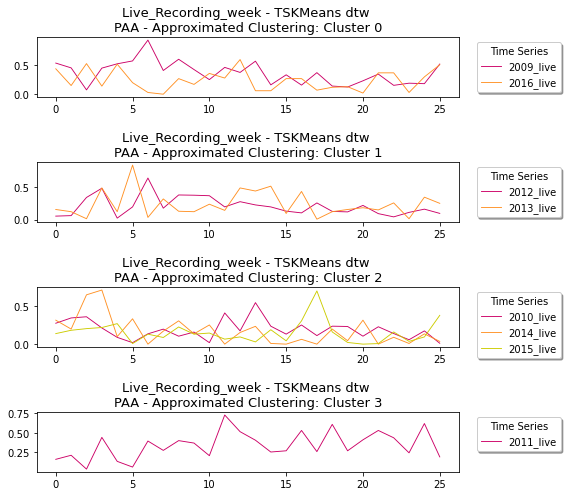

In [158]:
analyze_approximated_clusters(labels_live_paa_dtw, X_paa, df_tss_live_scaled, album_type, \
                               'TSKMeans dtw \nPAA - Approximated Clustering', False)

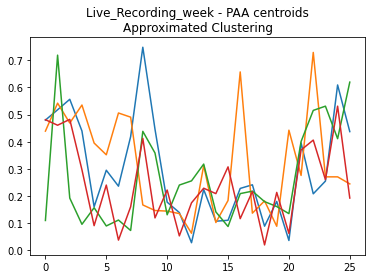

In [159]:
plot_centroids_approximated(cluster_centers_live_paa_dtw, X_paa, album_type, 'PAA')

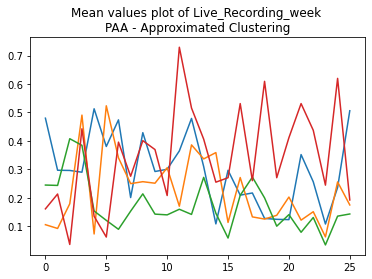

In [160]:
plot_mean_values_approximated(labels_live_paa_dtw, X_paa, album_type, 'PAA')

<h3>OneD_SymbolicAggregateApproximation</h3>

<h3>TimeSeriesKMeans</h3>

In [161]:
n_sax1d_segments = 26
n_sax_symbols_avg = 10
n_sax_symbols_slope = 4

one_d_sax = OneD_SymbolicAggregateApproximation(n_segments=n_sax1d_segments,\
     alphabet_size_avg=n_sax_symbols_avg, alphabet_size_slope=n_sax_symbols_slope)

X_sax1d = one_d_sax.fit_transform(tss_live_scaled)

<h3>EUCLIDEAN</h3>

k:  2 SSE:  32.5625 Silhouette Score:  0.10829567460953016

k:  3 SSE:  25.3125 Silhouette Score:  0.07545959465511393

k:  4 SSE:  19.6875 Silhouette Score:  0.057954380615220784

k:  5 SSE:  14.375 Silhouette Score:  0.054831132486409404

k:  6 SSE:  9.125 Silhouette Score:  0.03782801060773687

k:  7 SSE:  4.062499999999999 Silhouette Score:  0.0273684678684696



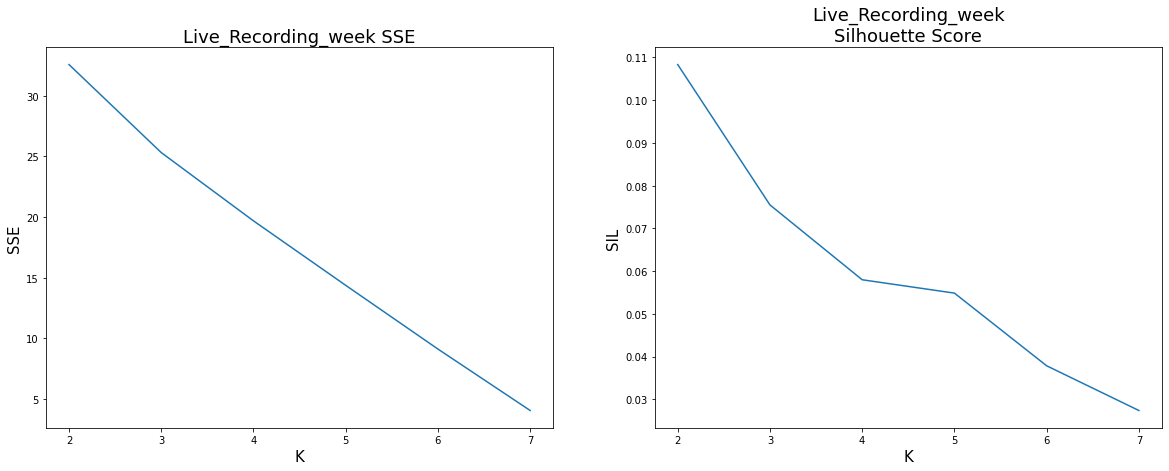

In [162]:
find_optimal_k_kmeans(7, 'euclidean', X_sax1d, False, album_type)

In [163]:
cluster_centers_live_sax1d, dict_label_live_sax1d, \
labels_live_sax1d = run_kmeans(3, 1000, 10, 'euclidean', X_sax1d, False)

cluster_centers_shape (3, 26, 2)

Labels:  {0: 2, 1: 4, 2: 2}

SSE:  25.3125
Silhouette Score:  0.07545959465511393


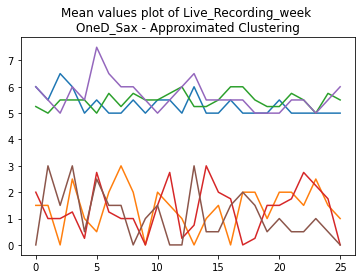

In [164]:
plot_mean_values_approximated(labels_live_sax1d, X_sax1d, album_type, 'OneD_Sax')

<h3>DTW</h3>

k:  2 SSE:  17.4821047008547 Silhouette Score:  0.06375288175592712

k:  3 SSE:  12.911805555555556 Silhouette Score:  0.06656495739044198

k:  4 SSE:  9.628174603174603 Silhouette Score:  0.05683897877219789

k:  5 SSE:  6.454166666666667 Silhouette Score:  0.03820533098671601

k:  6 SSE:  4.058333333333334 Silhouette Score:  0.03097661990633307

k:  7 SSE:  1.7395833333333335 Silhouette Score:  0.020276180126165784



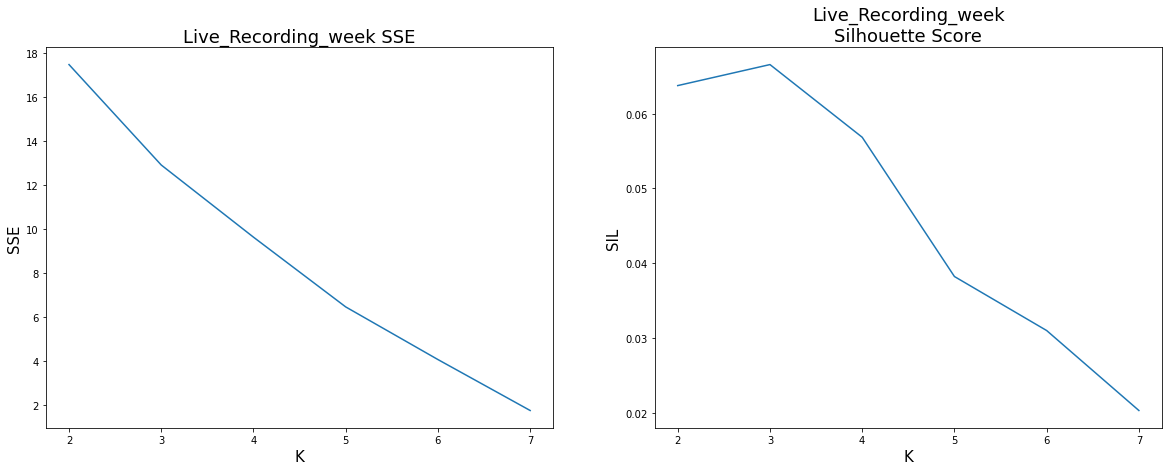

In [165]:
find_optimal_k_kmeans(7, 'dtw', X_sax1d, False, album_type)

In [166]:
cluster_centers_live_sax1d_dtw, dict_label_live_sax1d_dtw, \
labels_live_sax1d_dtw = run_kmeans(3, 300, 10, 'dtw', X_sax1d, False)

cluster_centers_shape (3, 26, 2)

Labels:  {0: 2, 1: 5, 2: 1}

SSE:  12.911805555555556
Silhouette Score:  0.06656495739044198


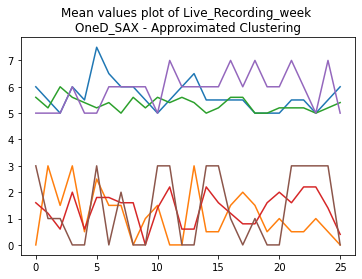

In [167]:
plot_mean_values_approximated(labels_live_sax1d_dtw, X_sax1d, album_type, 'OneD_SAX')

<h3>SymbolicAggregateApproximation</h3>

<h3>TimeSeriesKMeans</h3>

In [168]:
n_sax_segments = 26
n_sax_symbols = 10

sax = SymbolicAggregateApproximation(n_segments=n_sax_segments, \
                                     alphabet_size_avg=n_sax_symbols)

X_sax = sax.fit_transform(tss_live_scaled)

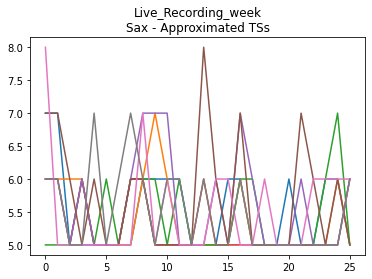

In [169]:
plt.plot(X_sax.reshape(X_sax.shape[1], X_sax.shape[0]))
plt.title(album_type + "\nSax - Approximated TSs")
plt.show()

<h3>Euclidean</h3>

k:  2 SSE:  7.895833333333332 Silhouette Score:  0.14955967769082057

k:  3 SSE:  5.708333333333332 Silhouette Score:  0.14591171983940332

k:  4 SSE:  4.1 Silhouette Score:  0.08147520274421324

k:  5 SSE:  2.749999999999999 Silhouette Score:  0.05598233420523273

k:  6 SSE:  1.625 Silhouette Score:  0.06194535563333996

k:  7 SSE:  0.7499999999999999 Silhouette Score:  0.026019312055376248



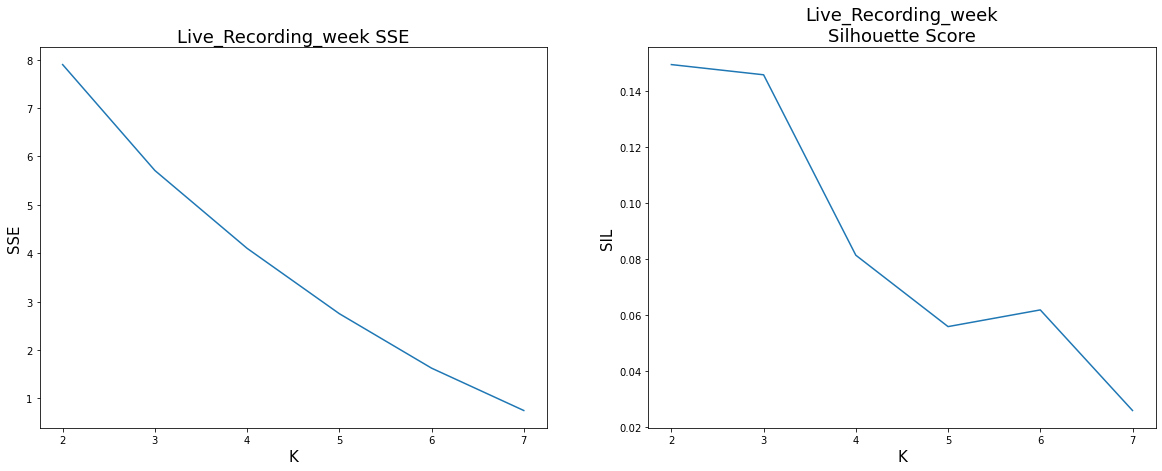

In [170]:
find_optimal_k_kmeans(7, 'euclidean', X_sax, False, album_type)

In [171]:
cluster_centers_live_sax, dict_label_live_sax, \
labels_live_sax = run_kmeans(3, 1000, 10, 'euclidean', X_sax, False)

cluster_centers_shape (3, 26, 1)

Labels:  {0: 6, 1: 1, 2: 1}

SSE:  5.708333333333332
Silhouette Score:  0.14591171983940332


0  1  2  3  4  5  6  7  8  9  ...  17  18  19  20  21  22  \
track_date_created                                ...                           
2009_live           7  6  5  6  6  7  8  6  7  6  ...   6   5   5   5   6   5   
2010_live           6  6  6  5  5  5  5  5  5  5  ...   5   5   5   5   5   5   
2011_live           5  5  5  6  5  5  6  6  6  6  ...   6   7   6   6   7   6   
2012_live           5  5  6  6  5  5  7  5  6  6  ...   6   5   5   5   5   5   
2013_live           5  5  5  6  5  8  5  6  5  5  ...   5   5   5   5   5   6   
2014_live           6  5  7  7  5  6  5  5  6  5  ...   5   5   5   6   5   5   
2015_live           5  5  5  5  6  5  5  5  5  5  ...   7   5   5   5   5   5   
2016_live           6  5  6  5  6  5  5  5  6  5  ...   5   5   5   5   6   6   

                    23  24  25  Labels  
track_date_created                      
2009_live            5   5   6       2  
2010_live            5   5   5       0  
2011_live            5   7   5       1  
2012_live            5   5   5       0  
2013_live            5   6   6       0  
2014_live            5   5   5       0  
2015_live            5   5   6       0  
2016_live            5   6   6       0  

[8 rows x 27 columns]


Cluster 0
 ['2010_live', '2012_live', '2013_live', '2014_live', '2015_live', '2016_live']

Cluster 1
 ['2011_live']

Cluster 2
 ['2009_live']




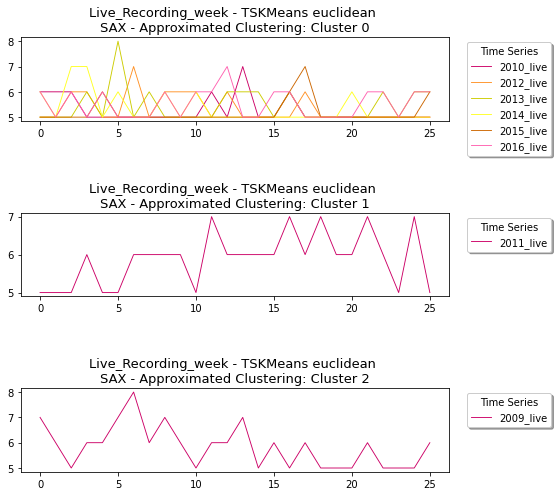

In [172]:
analyze_approximated_clusters(labels_live_sax, X_sax, df_tss_live_scaled, \
                              album_type, \
                              'TSKMeans euclidean \nSAX - Approximated Clustering', False)

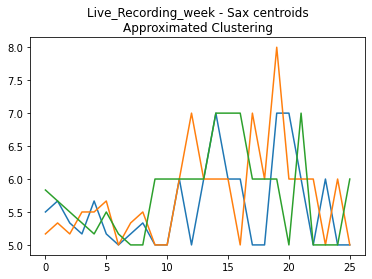

In [173]:
plot_centroids_approximated(cluster_centers_live_sax, X_sax, album_type, 'Sax')

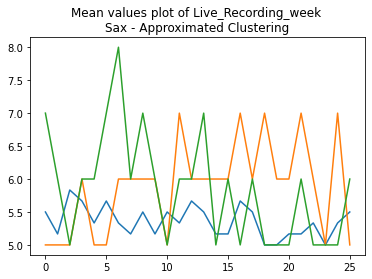

In [174]:
plot_mean_values_approximated(labels_live_sax, X_sax, album_type, 'Sax')

<h3>DTW</h3>

k:  2 SSE:  2.5348710317460315 Silhouette Score:  0.1153233402162696

k:  3 SSE:  1.7830357142857145 Silhouette Score:  0.09788581396879047

k:  4 SSE:  1.3466346153846156 Silhouette Score:  0.073235845337205

k:  5 SSE:  0.944551282051282 Silhouette Score:  0.061907618407032135

k:  6 SSE:  0.5407196969696969 Silhouette Score:  0.04768560845302436

k:  7 SSE:  0.18749999999999997 Silhouette Score:  0.03349364905389035



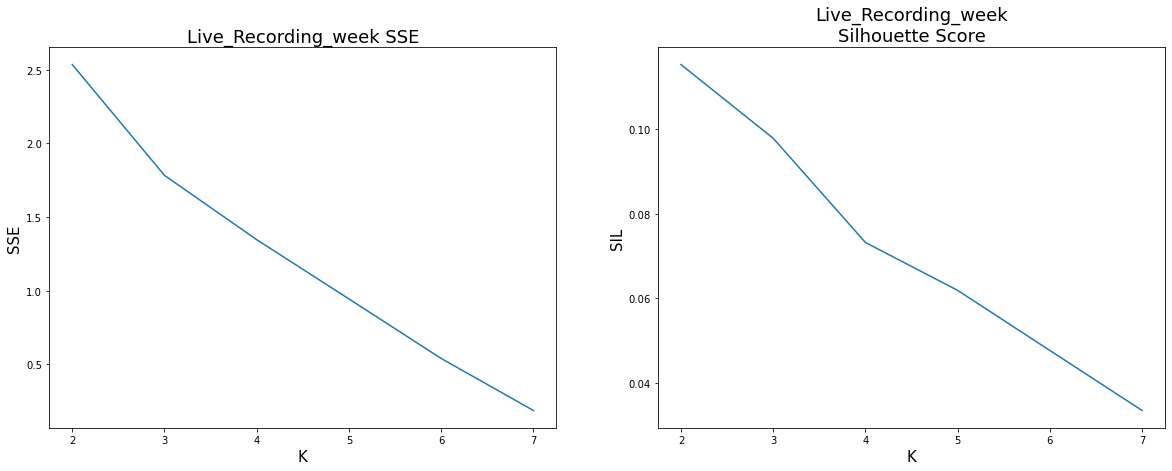

In [175]:
find_optimal_k_kmeans(7, 'dtw', X_sax, False, album_type)

In [176]:
cluster_centers_live_sax_dtw, dict_label_live_sax_dtw, \
labels_live_sax_dtw = run_kmeans(3, 300, 10, 'dtw', X_sax, False)

cluster_centers_shape (3, 26, 1)

Labels:  {0: 3, 1: 4, 2: 1}

SSE:  1.7830357142857145
Silhouette Score:  0.09788581396879047


0  1  2  3  4  5  6  7  8  9  ...  17  18  19  20  21  22  \
track_date_created                                ...                           
2009_live           7  6  5  6  6  7  8  6  7  6  ...   6   5   5   5   6   5   
2010_live           6  6  6  5  5  5  5  5  5  5  ...   5   5   5   5   5   5   
2011_live           5  5  5  6  5  5  6  6  6  6  ...   6   7   6   6   7   6   
2012_live           5  5  6  6  5  5  7  5  6  6  ...   6   5   5   5   5   5   
2013_live           5  5  5  6  5  8  5  6  5  5  ...   5   5   5   5   5   6   
2014_live           6  5  7  7  5  6  5  5  6  5  ...   5   5   5   6   5   5   
2015_live           5  5  5  5  6  5  5  5  5  5  ...   7   5   5   5   5   5   
2016_live           6  5  6  5  6  5  5  5  6  5  ...   5   5   5   5   6   6   

                    23  24  25  Labels  
track_date_created                      
2009_live            5   5   6       2  
2010_live            5   5   5       0  
2011_live            5   7   5       0  
2012_live            5   5   5       1  
2013_live            5   6   6       1  
2014_live            5   5   5       1  
2015_live            5   5   6       0  
2016_live            5   6   6       1  

[8 rows x 27 columns]


Cluster 0
 ['2010_live', '2011_live', '2015_live']

Cluster 1
 ['2012_live', '2013_live', '2014_live', '2016_live']

Cluster 2
 ['2009_live']




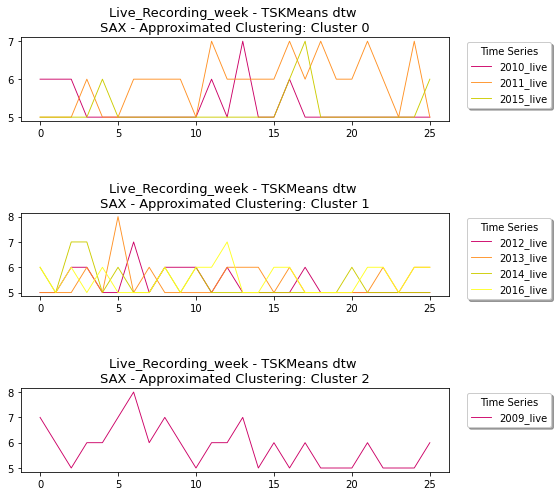

In [177]:
analyze_approximated_clusters(labels_live_sax_dtw, X_sax, df_tss_live_scaled, album_type, \
                               'TSKMeans dtw \nSAX - Approximated Clustering', False)

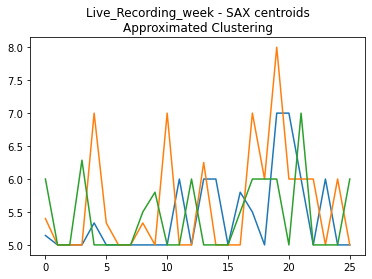

In [178]:
plot_centroids_approximated(cluster_centers_live_sax_dtw, X_sax, album_type, 'SAX')

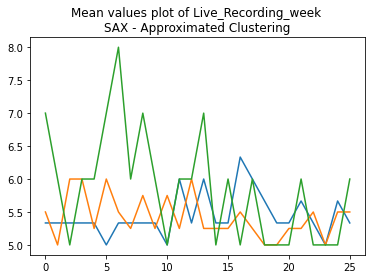

In [179]:
plot_mean_values_approximated(labels_live_sax_dtw, X_sax, album_type, 'SAX')

**--------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

<h1>Studio_Recording and Live_Recording</h1>

In [180]:
album_type = "Studio_Recording_week - Live_Recording_week"

<h2>Shape based clustering</h2>

<h3>TimeSeriesKMeans</h3>

In [181]:
df_studio_live

1    2    3    4    5    6    7    8    9   10  ...  \
track_date_created                                                    ...   
2009_studio           2   34   25   36   34   21   16   48   60   85  ...   
2010_studio         183  412  161  149   91  297  254  169  184  288  ...   
2011_studio         345  132  263  253  118  157  318  333  331  117  ...   
2012_studio         212  627  111  159  199  379  189  196  341  197  ...   
2013_studio         448  531  299  126  157  272   84  112  350  261  ...   
2014_studio         212  254  129  139  149  233  324  128  292   57  ...   
2015_studio         150  150   92  136  216  359  290  223  208  148  ...   
2016_studio         434  294  264  246  259  222  348  436  387  150  ...   
2009_live           128   12   22   98   15   13   19  100   73   64  ...   
2010_live            23   48   35   54   54   39   26   29   11   12  ...   
2011_live             2   29   21   20    6    1   71   14   22    4  ...   
2012_live             8    6   14    2   72   17  106   20    6    0  ...   
2013_live            17    6    1   17    0    2   26   46   18    0  ...   
2014_live            21   14   17    5   55   17   36   43   11    0  ...   
2015_live             0   19   14   11   18   10   12   18   25   12  ...   
2016_live            23   21    6    9   23   30    7    7   51    1  ...   

                     44   45   46   47   48   49   50   51   52   53  
track_date_created                                                    
2009_studio         186  141  251   82  175  250  108  187   69  109  
2010_studio         427  222  193  256  303  324  254  289  146   44  
2011_studio         122  128  128  149  115  304   79  249  133    0  
2012_studio         141  144  119  227  281  162  219  232  244    0  
2013_studio         312  224  176  265  368  472  196  383   44    0  
2014_studio         218  117  182  258  196  254  169  383  166    0  
2015_studio         277  322  209  214  179  279  347  197  120   99  
2016_studio         311  228  150  306  100  281  344  242  360   69  
2009_live            37   24   23   47    9   34   20  114   22    9  
2010_live            30    8   28    2   13   16   29    2    1    2  
2011_live            62   36   48   18   29   23   96   32    5    0  
2012_live             0    3    8    7   22   21   21   25    0    0  
2013_live             8   25   13    1    1   28   23   37    0    0  
2014_live             0   10    0    0    1   10    5    4    0    0  
2015_live             0    7   15    5    0    5    8   52    0   28  
2016_live            36    7   30    0    3   20   10   49    2    0  

[16 rows x 53 columns]

In [182]:
df_studio_live.shape

(16, 53)

In [183]:
tss_studio_live = to_time_series_dataset(df_studio_live.values)
tss_studio_live

array([[[  2.],
        [ 34.],
        [ 25.],
        [ 36.],
        [ 34.],
        [ 21.],
        [ 16.],
        [ 48.],
        [ 60.],
        [ 85.],
        [ 64.],
        [ 70.],
        [262.],
        [475.],
        [325.],
        [196.],
        [264.],
        [391.],
        [338.],
        [278.],
        [408.],
        [308.],
        [264.],
        [271.],
        [ 74.],
        [206.],
        [245.],
        [204.],
        [286.],
        [231.],
        [131.],
        [116.],
        [ 88.],
        [ 72.],
        [ 74.],
        [ 36.],
        [ 59.],
        [ 65.],
        [ 89.],
        [106.],
        [ 67.],
        [118.],
        [166.],
        [186.],
        [141.],
        [251.],
        [ 82.],
        [175.],
        [250.],
        [108.],
        [187.],
        [ 69.],
        [109.]],

       [[183.],
        [412.],
        [161.],
        [149.],
        [ 91.],
        [297.],
        [254.],
        [169.],
        [184.],
      

In [184]:
tss_studio_live.shape

(16, 53, 1)

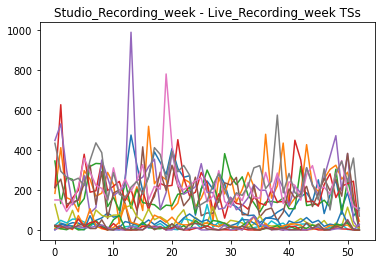

In [185]:
plt.plot(np.squeeze(tss_studio_live).T)
plt.title(album_type + " TSs")
plt.show()

In [186]:
tss_studio_live_scaled = TimeSeriesScalerMinMax().fit_transform(tss_studio_live)
tss_studio_live_scaled

array([[[0.        ],
        [0.06765328],
        [0.04862579],
        [0.07188161],
        [0.06765328],
        [0.04016913],
        [0.02959831],
        [0.09725159],
        [0.12262156],
        [0.17547569],
        [0.13107822],
        [0.14376321],
        [0.54968288],
        [1.        ],
        [0.68287526],
        [0.41014799],
        [0.55391121],
        [0.82241015],
        [0.71035941],
        [0.58350951],
        [0.85835095],
        [0.64693446],
        [0.55391121],
        [0.56871036],
        [0.15221987],
        [0.43128964],
        [0.51374207],
        [0.42706131],
        [0.60042283],
        [0.48414376],
        [0.27272727],
        [0.2410148 ],
        [0.18181818],
        [0.14799154],
        [0.15221987],
        [0.07188161],
        [0.1205074 ],
        [0.13319239],
        [0.18393235],
        [0.21987315],
        [0.13742072],
        [0.24524313],
        [0.34672304],
        [0.38900634],
        [0.29386892],
        [0

In [187]:
tss_studio_live_scaled.shape

(16, 53, 1)

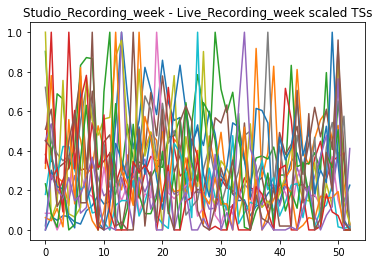

In [188]:
plt.plot(np.squeeze(tss_studio_live_scaled).T)
plt.title(album_type + " scaled TSs")
plt.show()

**I convert scaled time series dataset to normal dataset**

In [189]:
df_tss_studio_live_scaled = pd.DataFrame(np.squeeze(tss_studio_live_scaled), columns = df_studio_live.columns, \
                                    index = df_studio_live.index)
df_tss_studio_live_scaled

1         2         3         4         5  \
track_date_created                                                     
2009_studio         0.000000  0.067653  0.048626  0.071882  0.067653   
2010_studio         0.311475  0.780738  0.266393  0.241803  0.122951   
2011_studio         0.903141  0.345550  0.688482  0.662304  0.308901   
2012_studio         0.338118  1.000000  0.177033  0.253589  0.317384   
2013_studio         0.452525  0.536364  0.302020  0.127273  0.158586   
2014_studio         0.509615  0.610577  0.310096  0.334135  0.358173   
2015_studio         0.084180  0.084180  0.000000  0.063861  0.179971   
2016_studio         0.721344  0.444664  0.385375  0.349802  0.375494   
2009_live           1.000000  0.056911  0.138211  0.756098  0.081301   
2010_live           0.179688  0.375000  0.273438  0.421875  0.421875   
2011_live           0.020833  0.302083  0.218750  0.208333  0.062500   
2012_live           0.062016  0.046512  0.108527  0.015504  0.558140   
2013_live           0.232877  0.082192  0.013699  0.232877  0.000000   
2014_live           0.381818  0.254545  0.309091  0.090909  1.000000   
2015_live           0.000000  0.279412  0.205882  0.161765  0.264706   
2016_live           0.450980  0.411765  0.117647  0.176471  0.450980   

                           6         7         8         9        10  ...  \
track_date_created                                                    ...   
2009_studio         0.040169  0.029598  0.097252  0.122622  0.175476  ...   
2010_studio         0.545082  0.456967  0.282787  0.313525  0.526639  ...   
2011_studio         0.410995  0.832461  0.871728  0.866492  0.306283  ...   
2012_studio         0.604466  0.301435  0.312600  0.543860  0.314195  ...   
2013_studio         0.274747  0.084848  0.113131  0.353535  0.263636  ...   
2014_studio         0.560096  0.778846  0.307692  0.701923  0.137019  ...   
2015_studio         0.387518  0.287373  0.190131  0.168360  0.081277  ...   
2016_studio         0.302372  0.551383  0.725296  0.628458  0.160079  ...   
2009_live           0.065041  0.113821  0.772358  0.552846  0.479675  ...   
2010_live           0.304688  0.203125  0.226562  0.085938  0.093750  ...   
2011_live           0.010417  0.739583  0.145833  0.229167  0.041667  ...   
2012_live           0.131783  0.821705  0.155039  0.046512  0.000000  ...   
2013_live           0.027397  0.356164  0.630137  0.246575  0.000000  ...   
2014_live           0.309091  0.654545  0.781818  0.200000  0.000000  ...   
2015_live           0.147059  0.176471  0.264706  0.367647  0.176471  ...   
2016_live           0.588235  0.137255  0.137255  1.000000  0.019608  ...   

                          44        45        46        47        48  \
track_date_created                                                     
2009_studio         0.389006  0.293869  0.526427  0.169133  0.365751   
2010_studio         0.811475  0.391393  0.331967  0.461066  0.557377   
2011_studio         0.319372  0.335079  0.335079  0.390052  0.301047   
2012_studio         0.224880  0.229665  0.189793  0.362041  0.448166   
2013_studio         0.315152  0.226263  0.177778  0.267677  0.371717   
2014_studio         0.524038  0.281250  0.437500  0.620192  0.471154   
2015_studio         0.268505  0.333817  0.169811  0.177068  0.126270   
2016_studio         0.478261  0.314229  0.160079  0.468379  0.061265   
2009_live           0.260163  0.154472  0.146341  0.341463  0.032520   
2010_live           0.234375  0.062500  0.218750  0.015625  0.101562   
2011_live           0.645833  0.375000  0.500000  0.187500  0.302083   
2012_live           0.000000  0.023256  0.062016  0.054264  0.170543   
2013_live           0.109589  0.342466  0.178082  0.013699  0.013699   
2014_live           0.000000  0.181818  0.000000  0.000000  0.018182   
2015_live           0.000000  0.102941  0.220588  0.073529  0.000000   
2016_live           0.705882  0.137255  0.588235  0.000000  0.058824   

                          49        50        

<h3>Euclidean Distance</h3>

k:  2 SSE:  2.031509301939538 Silhouette Score:  0.11786641419711837

k:  3 SSE:  1.7980473785218076 Silhouette Score:  0.10718391607550032

k:  4 SSE:  1.6266437812862775 Silhouette Score:  0.07218624438372206

k:  5 SSE:  1.4131802330331444 Silhouette Score:  0.06350202638512517

k:  6 SSE:  1.2245020838754155 Silhouette Score:  0.06672889153322253

k:  7 SSE:  1.1173465749536151 Silhouette Score:  0.034277495836361256

k:  8 SSE:  0.9205784524609012 Silhouette Score:  0.04406129005580322

k:  9 SSE:  0.7865191381896486 Silhouette Score:  0.015316053349091788

k:  10 SSE:  0.6281822547943081 Silhouette Score:  0.044631187495025246

k:  11 SSE:  0.5157081576382695 Silhouette Score:  0.030856057970713908

k:  12 SSE:  0.3874151204751826 Silhouette Score:  0.015238782066851175

k:  13 SSE:  0.2511342612509886 Silhouette Score:  0.033063064678021045

k:  14 SSE:  0.15366357578078588 Silhouette Score:  0.026748483602625116

k:  15 SSE:  0.06951378131181707 Silhouette Score:  0.01307379486

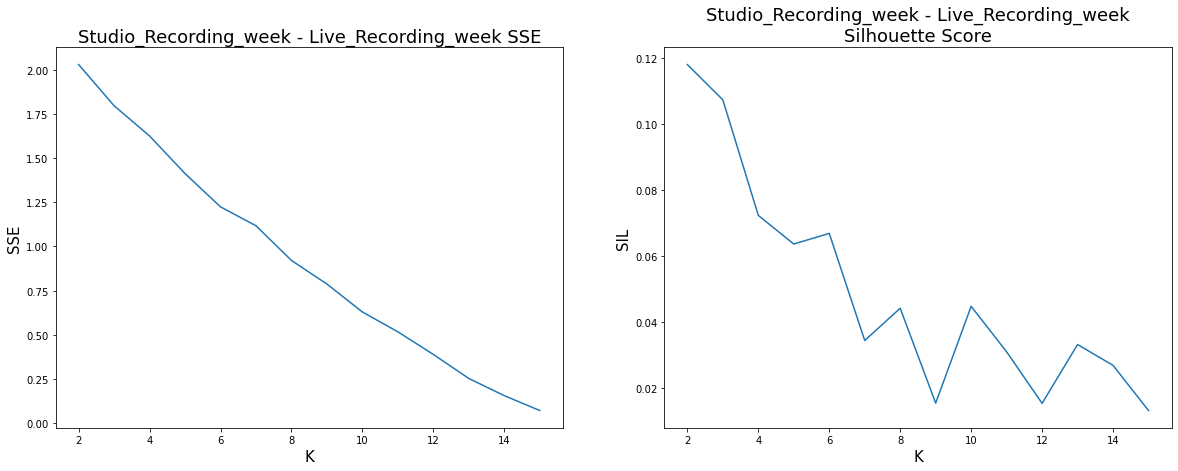

In [190]:
find_optimal_k_kmeans(15, 'euclidean', tss_studio_live_scaled, False, album_type)

**We can see that best k is 3**

In [191]:
cluster_centers_studio_live_eu, dict_label_studio_live_eu, labels_studio_live_eu = run_kmeans(3, 1000, 10, \
                                                            'euclidean', tss_studio_live_scaled, False)

cluster_centers_shape (3, 53, 1)

Labels:  {0: 8, 1: 7, 2: 1}

SSE:  1.7980473785218076
Silhouette Score:  0.10718391607550032


In [192]:
cluster_insight_studio_live(df_tss_studio_live_scaled, labels_studio_live_eu)

Dataset con le labels associate


1         2         3         4         5  \
track_date_created                                                     
2009_studio         0.000000  0.067653  0.048626  0.071882  0.067653   
2010_studio         0.311475  0.780738  0.266393  0.241803  0.122951   
2011_studio         0.903141  0.345550  0.688482  0.662304  0.308901   
2012_studio         0.338118  1.000000  0.177033  0.253589  0.317384   
2013_studio         0.452525  0.536364  0.302020  0.127273  0.158586   
2014_studio         0.509615  0.610577  0.310096  0.334135  0.358173   
2015_studio         0.084180  0.084180  0.000000  0.063861  0.179971   
2016_studio         0.721344  0.444664  0.385375  0.349802  0.375494   
2009_live           1.000000  0.056911  0.138211  0.756098  0.081301   
2010_live           0.179688  0.375000  0.273438  0.421875  0.421875   
2011_live           0.020833  0.302083  0.218750  0.208333  0.062500   
2012_live           0.062016  0.046512  0.108527  0.015504  0.558140   
2013_live           0.232877  0.082192  0.013699  0.232877  0.000000   
2014_live           0.381818  0.254545  0.309091  0.090909  1.000000   
2015_live           0.000000  0.279412  0.205882  0.161765  0.264706   
2016_live           0.450980  0.411765  0.117647  0.176471  0.450980   

                           6         7         8         9        10  ...  \
track_date_created                                                    ...   
2009_studio         0.040169  0.029598  0.097252  0.122622  0.175476  ...   
2010_studio         0.545082  0.456967  0.282787  0.313525  0.526639  ...   
2011_studio         0.410995  0.832461  0.871728  0.866492  0.306283  ...   
2012_studio         0.604466  0.301435  0.312600  0.543860  0.314195  ...   
2013_studio         0.274747  0.084848  0.113131  0.353535  0.263636  ...   
2014_studio         0.560096  0.778846  0.307692  0.701923  0.137019  ...   
2015_studio         0.387518  0.287373  0.190131  0.168360  0.081277  ...   
2016_studio         0.302372  0.551383  0.725296  0.628458  0.160079  ...   
2009_live           0.065041  0.113821  0.772358  0.552846  0.479675  ...   
2010_live           0.304688  0.203125  0.226562  0.085938  0.093750  ...   
2011_live           0.010417  0.739583  0.145833  0.229167  0.041667  ...   
2012_live           0.131783  0.821705  0.155039  0.046512  0.000000  ...   
2013_live           0.027397  0.356164  0.630137  0.246575  0.000000  ...   
2014_live           0.309091  0.654545  0.781818  0.200000  0.000000  ...   
2015_live           0.147059  0.176471  0.264706  0.367647  0.176471  ...   
2016_live           0.588235  0.137255  0.137255  1.000000  0.019608  ...   

                          45        46        47        48        49  \
track_date_created                                                     
2009_studio         0.293869  0.526427  0.169133  0.365751  0.524313   
2010_studio         0.391393  0.331967  0.461066  0.557377  0.600410   
2011_studio         0.335079  0.335079  0.390052  0.301047  0.795812   
2012_studio         0.229665  0.189793  0.362041  0.448166  0.258373   
2013_studio         0.226263  0.177778  0.267677  0.371717  0.476768   
2014_studio         0.281250  0.437500  0.620192  0.471154  0.610577   
2015_studio         0.333817  0.169811  0.177068  0.126270  0.271408   
2016_studio         0.314229  0.160079  0.468379  0.061265  0.418972   
2009_live           0.154472  0.146341  0.341463  0.032520  0.235772   
2010_live           0.062500  0.218750  0.015625  0.101562  0.125000   
2011_live           0.375000  0.500000  0.187500  0.302083  0.239583   
2012_live           0.023256  0.062016  0.054264  0.170543  0.162791   
2013_live           0.342466  0.178082  0.013699  0.013699  0.383562   
2014_live           0.181818  0.000000  0.000000  0.018182  0.181818   
2015_live           0.102941  0.220588  0.073529  0.000000  0.073529   
2016_live           0.137255  0.588235  0.000000  0.058824  0.392157   

                          50        51        

Cluster 0
 ['2013_studio', '2015_studio', '2010_live', '2012_live', '2013_live', '2014_live', '2015_live', '2016_live']

Cluster 1
 ['2009_studio', '2010_studio', '2011_studio', '2012_studio', '2014_studio', '2016_studio', '2011_live']

Cluster 2
 ['2009_live']



Studio_Recording Live_Recording  Tot_Cluster  Entropy  Purity
Cluster 0                2              6            8   0.8113  0.7500
Cluster 1                6              1            7   0.5917  0.8571
Cluster 2                0              1            1  -0.0000  1.0000
Total                    8              8           16   0.6645  0.8125

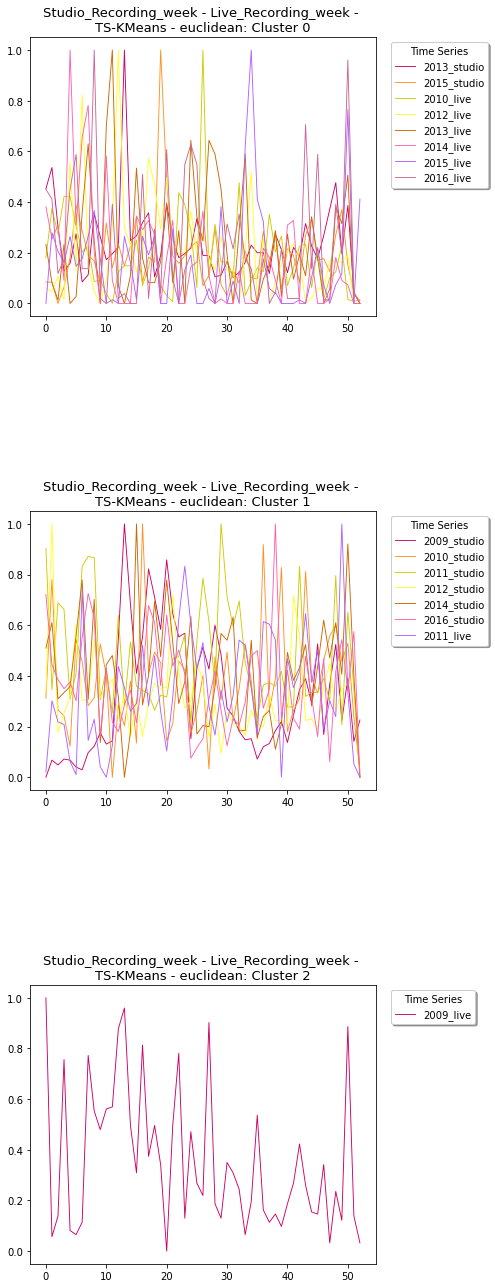

In [193]:
analyze_clusters(labels_studio_live_eu, tss_studio_live_scaled, df_tss_studio_live_scaled, album_type, \
                 '\nTS-KMeans - euclidean', True)

**Centroids**

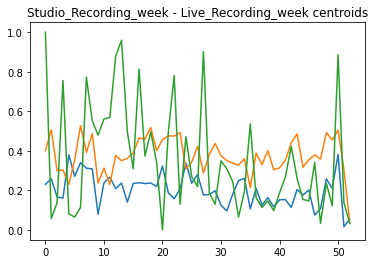

In [194]:
plot_kmeans_centroids(cluster_centers_studio_live_eu, album_type)

<h3>DTW distance</h3>

k:  2 SSE:  0.7760865879846279 Silhouette Score:  0.12450824585376519

k:  3 SSE:  0.663441352209653 Silhouette Score:  0.1293277386900063

k:  4 SSE:  0.5378815401232137 Silhouette Score:  0.1060342819214531

k:  5 SSE:  0.4612891679414342 Silhouette Score:  0.08992486451634936

k:  6 SSE:  0.4044856040358564 Silhouette Score:  0.06383863126575769

k:  7 SSE:  0.37345915157018966 Silhouette Score:  0.04298656178283927

k:  8 SSE:  0.3157732541704884 Silhouette Score:  0.061073218172293386

k:  9 SSE:  0.2576507150964012 Silhouette Score:  0.05007752554936014

k:  10 SSE:  0.2013287290820029 Silhouette Score:  0.051272419776517676

k:  11 SSE:  0.14683546383303198 Silhouette Score:  0.04070595482666495

k:  12 SSE:  0.11333545309134908 Silhouette Score:  0.028215152082229827

k:  13 SSE:  0.0728808446832435 Silhouette Score:  0.016128773055974654

k:  14 SSE:  0.03786026345713757 Silhouette Score:  0.029188964647135284

k:  15 SSE:  0.01660699158081377 Silhouette Score:  0.011574088657

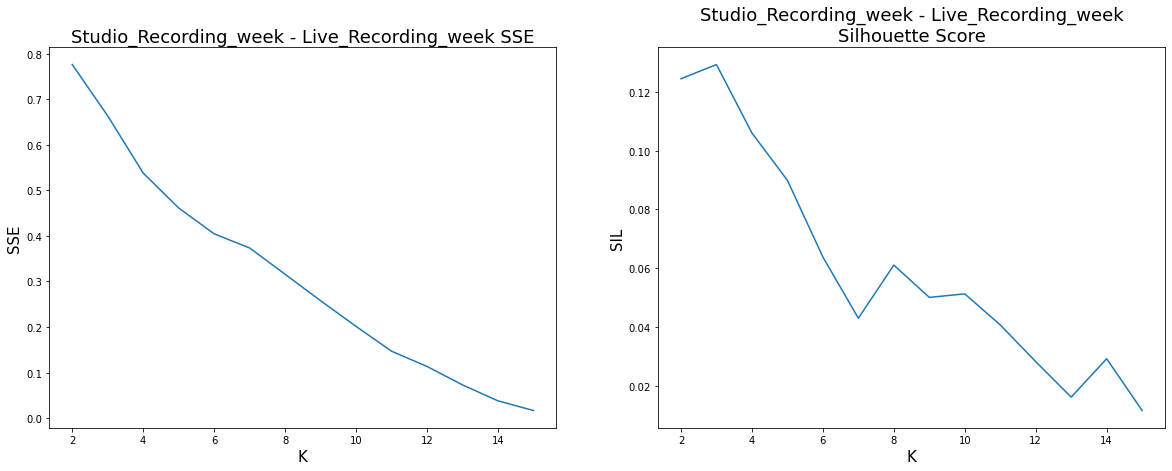

In [195]:
find_optimal_k_kmeans(15, 'dtw', tss_studio_live_scaled, False, album_type)

**We can see that best k is 3**

In [196]:
cluster_centers_studio_live_dtw, dict_label_studio_live_dtw, \
labels_studio_live_dtw = run_kmeans(3, 1000, 10, 'dtw', tss_studio_live_scaled, False)

cluster_centers_shape (3, 53, 1)

Labels:  {0: 6, 1: 8, 2: 2}

SSE:  0.663441352209653
Silhouette Score:  0.1293277386900063


In [197]:
cluster_insight_studio_live(df_tss_studio_live_scaled, labels_studio_live_dtw)

Dataset con le labels associate


1         2         3         4         5  \
track_date_created                                                     
2009_studio         0.000000  0.067653  0.048626  0.071882  0.067653   
2010_studio         0.311475  0.780738  0.266393  0.241803  0.122951   
2011_studio         0.903141  0.345550  0.688482  0.662304  0.308901   
2012_studio         0.338118  1.000000  0.177033  0.253589  0.317384   
2013_studio         0.452525  0.536364  0.302020  0.127273  0.158586   
2014_studio         0.509615  0.610577  0.310096  0.334135  0.358173   
2015_studio         0.084180  0.084180  0.000000  0.063861  0.179971   
2016_studio         0.721344  0.444664  0.385375  0.349802  0.375494   
2009_live           1.000000  0.056911  0.138211  0.756098  0.081301   
2010_live           0.179688  0.375000  0.273438  0.421875  0.421875   
2011_live           0.020833  0.302083  0.218750  0.208333  0.062500   
2012_live           0.062016  0.046512  0.108527  0.015504  0.558140   
2013_live           0.232877  0.082192  0.013699  0.232877  0.000000   
2014_live           0.381818  0.254545  0.309091  0.090909  1.000000   
2015_live           0.000000  0.279412  0.205882  0.161765  0.264706   
2016_live           0.450980  0.411765  0.117647  0.176471  0.450980   

                           6         7         8         9        10  ...  \
track_date_created                                                    ...   
2009_studio         0.040169  0.029598  0.097252  0.122622  0.175476  ...   
2010_studio         0.545082  0.456967  0.282787  0.313525  0.526639  ...   
2011_studio         0.410995  0.832461  0.871728  0.866492  0.306283  ...   
2012_studio         0.604466  0.301435  0.312600  0.543860  0.314195  ...   
2013_studio         0.274747  0.084848  0.113131  0.353535  0.263636  ...   
2014_studio         0.560096  0.778846  0.307692  0.701923  0.137019  ...   
2015_studio         0.387518  0.287373  0.190131  0.168360  0.081277  ...   
2016_studio         0.302372  0.551383  0.725296  0.628458  0.160079  ...   
2009_live           0.065041  0.113821  0.772358  0.552846  0.479675  ...   
2010_live           0.304688  0.203125  0.226562  0.085938  0.093750  ...   
2011_live           0.010417  0.739583  0.145833  0.229167  0.041667  ...   
2012_live           0.131783  0.821705  0.155039  0.046512  0.000000  ...   
2013_live           0.027397  0.356164  0.630137  0.246575  0.000000  ...   
2014_live           0.309091  0.654545  0.781818  0.200000  0.000000  ...   
2015_live           0.147059  0.176471  0.264706  0.367647  0.176471  ...   
2016_live           0.588235  0.137255  0.137255  1.000000  0.019608  ...   

                          45        46        47        48        49  \
track_date_created                                                     
2009_studio         0.293869  0.526427  0.169133  0.365751  0.524313   
2010_studio         0.391393  0.331967  0.461066  0.557377  0.600410   
2011_studio         0.335079  0.335079  0.390052  0.301047  0.795812   
2012_studio         0.229665  0.189793  0.362041  0.448166  0.258373   
2013_studio         0.226263  0.177778  0.267677  0.371717  0.476768   
2014_studio         0.281250  0.437500  0.620192  0.471154  0.610577   
2015_studio         0.333817  0.169811  0.177068  0.126270  0.271408   
2016_studio         0.314229  0.160079  0.468379  0.061265  0.418972   
2009_live           0.154472  0.146341  0.341463  0.032520  0.235772   
2010_live           0.062500  0.218750  0.015625  0.101562  0.125000   
2011_live           0.375000  0.500000  0.187500  0.302083  0.239583   
2012_live           0.023256  0.062016  0.054264  0.170543  0.162791   
2013_live           0.342466  0.178082  0.013699  0.013699  0.383562   
2014_live           0.181818  0.000000  0.000000  0.018182  0.181818   
2015_live           0.102941  0.220588  0.073529  0.000000  0.073529   
2016_live           0.137255  0.588235  0.000000  0.058824  0.392157   

                          50        51        

Cluster 0
 ['2010_studio', '2011_studio', '2012_studio', '2014_studio', '2016_studio', '2009_live']

Cluster 1
 ['2009_studio', '2013_studio', '2015_studio', '2010_live', '2012_live', '2013_live', '2014_live', '2015_live']

Cluster 2
 ['2011_live', '2016_live']



Studio_Recording Live_Recording  Tot_Cluster  Entropy  Purity
Cluster 0                5              1            6   0.6500  0.8333
Cluster 1                3              5            8   0.9544  0.6250
Cluster 2                0              2            2  -0.0000  1.0000
Total                    8              8           16   0.7210  0.7500

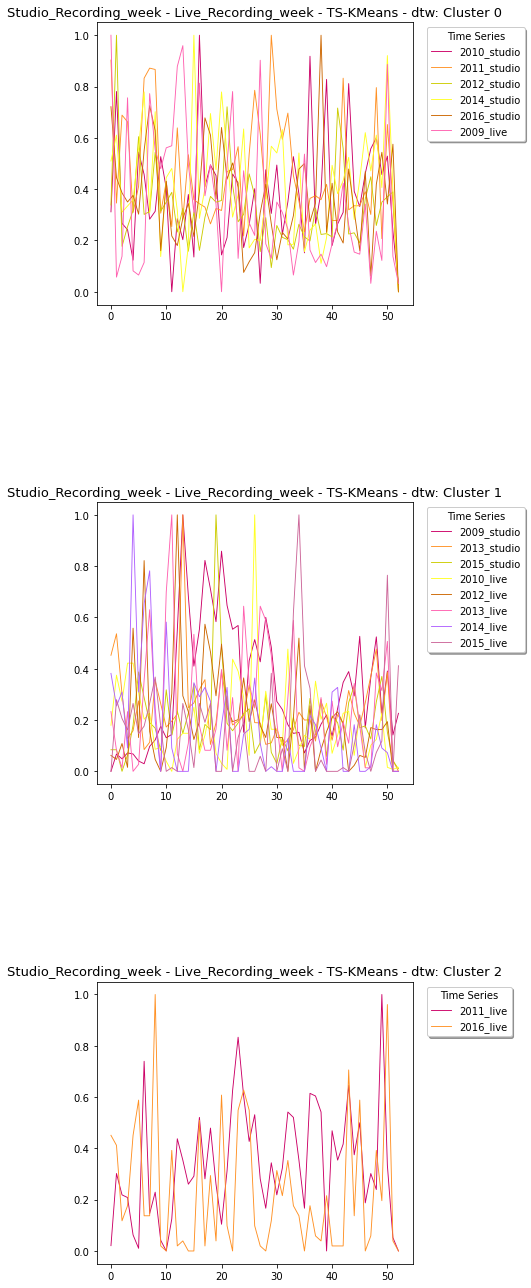

In [198]:
analyze_clusters(labels_studio_live_dtw, tss_studio_live_scaled, df_tss_studio_live_scaled, album_type, \
                 'TS-KMeans - dtw', True)

**Centroids**

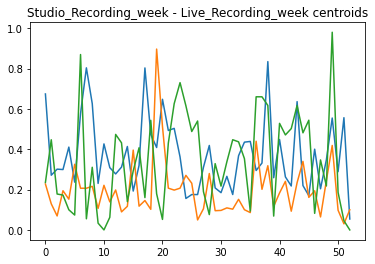

In [199]:
plot_kmeans_centroids(cluster_centers_studio_live_dtw, album_type)

<h3>KMeans sklearn</h3>

k:  2 SSE:  32.50414883103261 Silhouette Score:  0.11786641419711844
Calinski-Harabaz:  3.3860836006584316 Davies-Bouldin:  2.015018933051058

k:  3 SSE:  28.768758056348922 Silhouette Score:  0.10718391607550025
Calinski-Harabaz:  2.6202085335193814 Davies-Bouldin:  1.5185169519305486

k:  4 SSE:  26.02630050058044 Silhouette Score:  0.07218624438372206
Calinski-Harabaz:  2.20383269533693 Davies-Bouldin:  1.5077372590506435

k:  5 SSE:  22.610883728530318 Silhouette Score:  0.06350202638512514
Calinski-Harabaz:  2.1593916870682444 Davies-Bouldin:  1.0878635183287395

k:  6 SSE:  19.59203334200665 Silhouette Score:  0.06672889153322241
Calinski-Harabaz:  2.1206242140773015 Davies-Bouldin:  1.069225613257316

k:  7 SSE:  17.877545199257845 Silhouette Score:  0.034277495836361305
Calinski-Harabaz:  1.886849512570405 Davies-Bouldin:  1.0036697189456514

k:  8 SSE:  14.72925523937442 Silhouette Score:  0.04406129005580313
Calinski-Harabaz:  1.9891567856939096 Davies-Bouldin:  1.06211152272

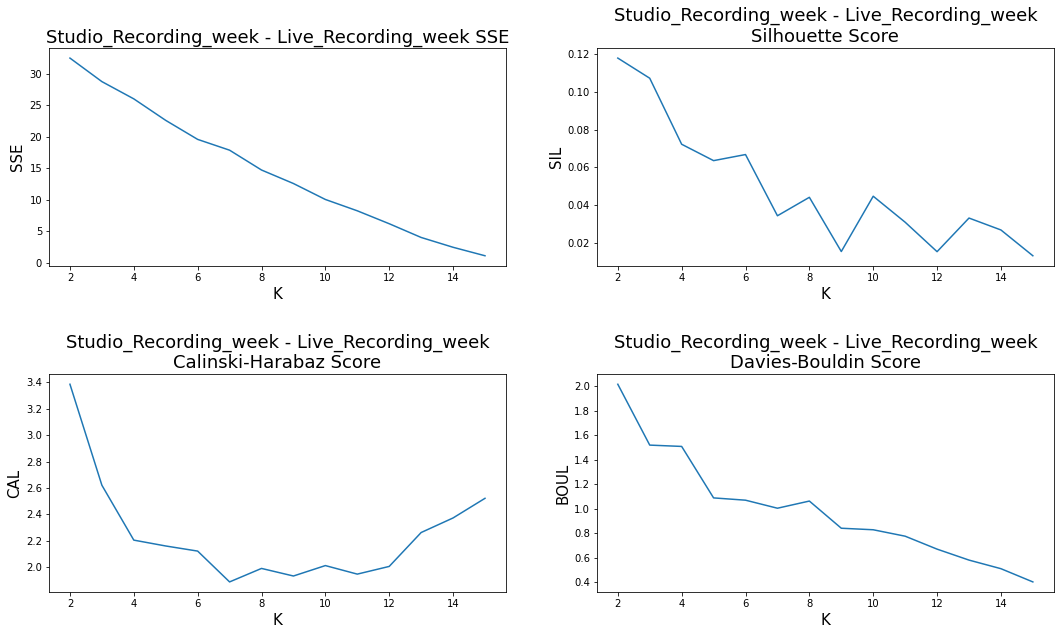

In [200]:
find_optimal_k_kmeans(15, "", df_tss_studio_live_scaled, True, album_type)

In [201]:
cluster_centers_studio_live_2, dict_label_studio_live_2, labels_studio_live_2 = run_kmeans(3, 1000, 10, '', \
                                                                        df_tss_studio_live_scaled, True)

cluster_centers_shape (3, 53)

Labels:  {0: 8, 1: 7, 2: 1}

SSE:  28.768758056348922
Silhouette Score:  0.10718391607550025
Calinski - Harabaz Score:  2.6202085335193814
Davies - Bouldin Score:  1.5185169519305486


In [202]:
cluster_insight_studio_live(df_tss_studio_live_scaled, labels_studio_live_2)

Dataset con le labels associate


1         2         3         4         5  \
track_date_created                                                     
2009_studio         0.000000  0.067653  0.048626  0.071882  0.067653   
2010_studio         0.311475  0.780738  0.266393  0.241803  0.122951   
2011_studio         0.903141  0.345550  0.688482  0.662304  0.308901   
2012_studio         0.338118  1.000000  0.177033  0.253589  0.317384   
2013_studio         0.452525  0.536364  0.302020  0.127273  0.158586   
2014_studio         0.509615  0.610577  0.310096  0.334135  0.358173   
2015_studio         0.084180  0.084180  0.000000  0.063861  0.179971   
2016_studio         0.721344  0.444664  0.385375  0.349802  0.375494   
2009_live           1.000000  0.056911  0.138211  0.756098  0.081301   
2010_live           0.179688  0.375000  0.273438  0.421875  0.421875   
2011_live           0.020833  0.302083  0.218750  0.208333  0.062500   
2012_live           0.062016  0.046512  0.108527  0.015504  0.558140   
2013_live           0.232877  0.082192  0.013699  0.232877  0.000000   
2014_live           0.381818  0.254545  0.309091  0.090909  1.000000   
2015_live           0.000000  0.279412  0.205882  0.161765  0.264706   
2016_live           0.450980  0.411765  0.117647  0.176471  0.450980   

                           6         7         8         9        10  ...  \
track_date_created                                                    ...   
2009_studio         0.040169  0.029598  0.097252  0.122622  0.175476  ...   
2010_studio         0.545082  0.456967  0.282787  0.313525  0.526639  ...   
2011_studio         0.410995  0.832461  0.871728  0.866492  0.306283  ...   
2012_studio         0.604466  0.301435  0.312600  0.543860  0.314195  ...   
2013_studio         0.274747  0.084848  0.113131  0.353535  0.263636  ...   
2014_studio         0.560096  0.778846  0.307692  0.701923  0.137019  ...   
2015_studio         0.387518  0.287373  0.190131  0.168360  0.081277  ...   
2016_studio         0.302372  0.551383  0.725296  0.628458  0.160079  ...   
2009_live           0.065041  0.113821  0.772358  0.552846  0.479675  ...   
2010_live           0.304688  0.203125  0.226562  0.085938  0.093750  ...   
2011_live           0.010417  0.739583  0.145833  0.229167  0.041667  ...   
2012_live           0.131783  0.821705  0.155039  0.046512  0.000000  ...   
2013_live           0.027397  0.356164  0.630137  0.246575  0.000000  ...   
2014_live           0.309091  0.654545  0.781818  0.200000  0.000000  ...   
2015_live           0.147059  0.176471  0.264706  0.367647  0.176471  ...   
2016_live           0.588235  0.137255  0.137255  1.000000  0.019608  ...   

                          45        46        47        48        49  \
track_date_created                                                     
2009_studio         0.293869  0.526427  0.169133  0.365751  0.524313   
2010_studio         0.391393  0.331967  0.461066  0.557377  0.600410   
2011_studio         0.335079  0.335079  0.390052  0.301047  0.795812   
2012_studio         0.229665  0.189793  0.362041  0.448166  0.258373   
2013_studio         0.226263  0.177778  0.267677  0.371717  0.476768   
2014_studio         0.281250  0.437500  0.620192  0.471154  0.610577   
2015_studio         0.333817  0.169811  0.177068  0.126270  0.271408   
2016_studio         0.314229  0.160079  0.468379  0.061265  0.418972   
2009_live           0.154472  0.146341  0.341463  0.032520  0.235772   
2010_live           0.062500  0.218750  0.015625  0.101562  0.125000   
2011_live           0.375000  0.500000  0.187500  0.302083  0.239583   
2012_live           0.023256  0.062016  0.054264  0.170543  0.162791   
2013_live           0.342466  0.178082  0.013699  0.013699  0.383562   
2014_live           0.181818  0.000000  0.000000  0.018182  0.181818   
2015_live           0.102941  0.220588  0.073529  0.000000  0.073529   
2016_live           0.137255  0.588235  0.000000  0.058824  0.392157   

                          50        51        

Cluster 0
 ['2013_studio', '2015_studio', '2010_live', '2012_live', '2013_live', '2014_live', '2015_live', '2016_live']

Cluster 1
 ['2009_studio', '2010_studio', '2011_studio', '2012_studio', '2014_studio', '2016_studio', '2011_live']

Cluster 2
 ['2009_live']



Studio_Recording Live_Recording  Tot_Cluster  Entropy  Purity
Cluster 0                2              6            8   0.8113  0.7500
Cluster 1                6              1            7   0.5917  0.8571
Cluster 2                0              1            1  -0.0000  1.0000
Total                    8              8           16   0.6645  0.8125

<h2>Feature based Clustering</h2>

<h3>KMeans</h3>

In [203]:
F = [list(calculate_features(x).values())for x in tss_studio_live_scaled]

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead

k:  2 SSE:  60.33140462646853 Silhouette Score:  0.6974567579922661
Calinski-Harabaz:  45.4249027652182 Davies-Bouldin:  0.3779586006597121

k:  3 SSE:  15.065449122389294 Silhouette Score:  0.7461536344944848
Calinski-Harabaz:  103.98801067545033 Davies-Bouldin:  0.2908290646214291

k:  4 SSE:  5.915387111916758 Silhouette Score:  0.7034297357292978
Calinski-Harabaz:  169.16523286939685 Davies-Bouldin:  0.2770938481461409

k:  5 SSE:  3.517082155633584 Silhouette Score:  0.6620107519139795
Calinski-Harabaz:  197.4822656185367 Davies-Bouldin:  0.1284556120413502

k:  6 SSE:  1.2795284804462934 Silhouette Score:  0.5535363715551932
Calinski-Harabaz:  398.28002596331777 Davies-Bouldin:  0.2236667335446484

k:  7 SSE:  0.8559179157807086 Silhouette Score:  0.41508810588907474
Calinski-Harabaz:  447.289846488972 Davies-Bouldin:  0.2623534047429096

k:  8 SSE:  0.5589197902650989 Silhouette Score:  0.3760522068248182
Calinski-Harabaz:  522.4893371561002 Davies-Bouldin:  0.2868817055911791



/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to d

k:  9 SSE:  0.35019192859057335 Silhouette Score:  0.3614864503356006
Calinski-Harabaz:  638.9862376729969 Davies-Bouldin:  0.25732741201550724

k:  10 SSE:  0.16004004516391768 Silhouette Score:  0.37706602915465304
Calinski-Harabaz:  1066.0865384436913 Davies-Bouldin:  0.25995833111611744

k:  11 SSE:  0.11481806206925493 Silhouette Score:  0.3279690345189563
Calinski-Harabaz:  1114.676663286916 Davies-Bouldin:  0.17255414583420056

k:  12 SSE:  0.07467282886704532 Silhouette Score:  0.24923616420253877
Calinski-Harabaz:  1246.6999052816311 Davies-Bouldin:  0.1851019963678934

k:  13 SSE:  0.046985956692234855 Silhouette Score:  0.22394290456756213
Calinski-Harabaz:  1362.3105644486398 Davies-Bouldin:  0.134647336073646



<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead

k:  14 SSE:  0.022511834651451356 Silhouette Score:  0.1640684614283552
Calinski-Harabaz:  1749.933133919328 Davies-Bouldin:  0.0908712000288151

k:  15 SSE:  0.007473826675810275 Silhouette Score:  0.08246265363233718
Calinski-Harabaz:  2447.372907079902 Davies-Bouldin:  0.05505070352349997



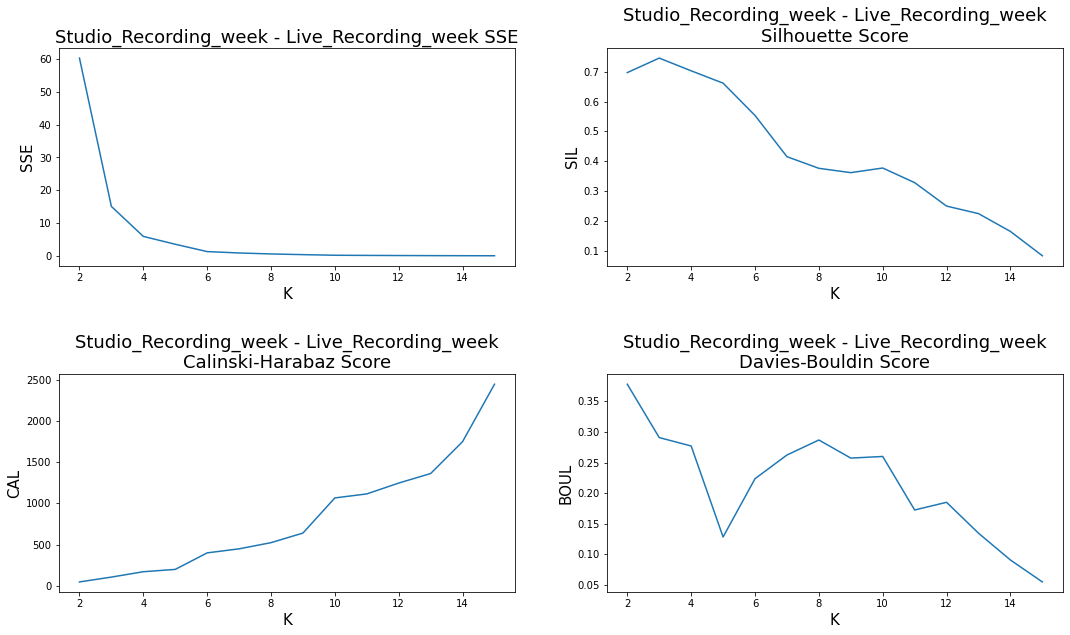

In [204]:
find_optimal_k_kmeans(15, "", F, True, album_type)

In [205]:
cluster_centers_studio_live_fb, dict_label_studio_live_fb, labels_studio_live_fb = run_kmeans(3, 1000, 10, "", F, \
                                                                                              True)

cluster_centers_shape (3, 5)

Labels:  {0: 9, 1: 3, 2: 4}

SSE:  15.065449122389294
Silhouette Score:  0.7461536344944848
Calinski - Harabaz Score:  103.98801067545033
Davies - Bouldin Score:  0.2908290646214291


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead

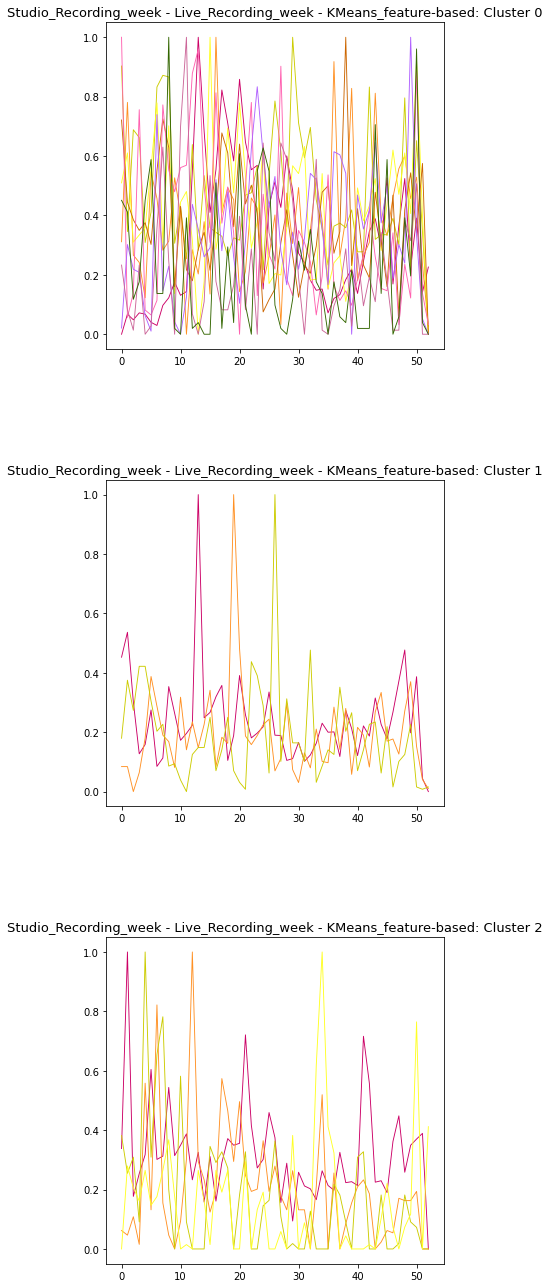

In [206]:
analyze_clusters_fb(labels_studio_live_fb, tss_studio_live_scaled, album_type, 'KMeans_feature-based', True)

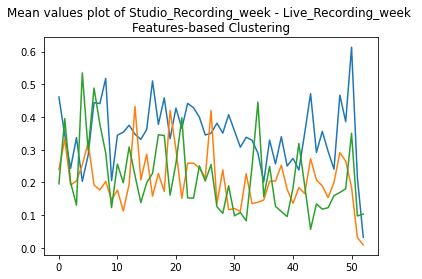

In [207]:
plot_mean_values(labels_studio_live_fb, tss_studio_live_scaled, album_type)

<h2>Compression-based Clustering</h2>

<h3>DBSCAN</h3>

In [208]:
M = pairwise_distances(tss_studio_live_scaled.reshape(tss_studio_live_scaled.shape[0], \
                                        tss_studio_live_scaled.shape[1]), metric=cdm_dist)

In [209]:
print(tss_studio_live_scaled.shape, M.shape)

(16, 53, 1) (16, 16)


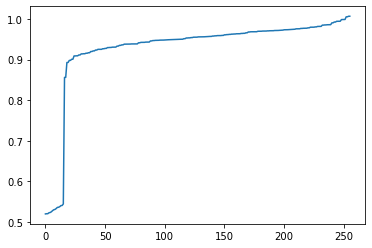

In [210]:
plt.plot(sorted(M.ravel()))
plt.show()

In [212]:
dbscan_compression_studio_live = DBSCAN(eps=0.9, min_samples=5, metric='precomputed')
dbscan_compression_studio_live.fit(M)

DBSCAN(eps=0.9, metric='precomputed')

In [213]:
dbscan_compression_studio_live.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

<h2>Approximation-based Clustering</h2>

<h3>PiecewiseAggregateApproximation</h3>

<h3>TimeSeriesKMeans</h3>

In [214]:
n_paa_segments = 26
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
X_paa = paa.fit_transform(tss_studio_live_scaled)

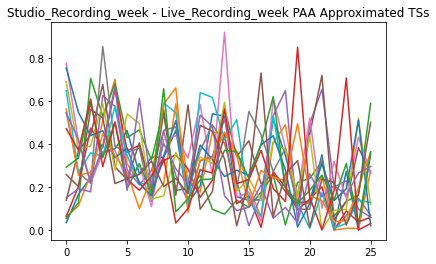

In [215]:
plt.plot(X_paa.reshape(X_paa.shape[1], X_paa.shape[0]))
plt.title(album_type + " PAA Approximated TSs")
plt.show()

<h3>Euclidean</h3>

k:  2 SSE:  0.6000818953929533 Silhouette Score:  0.19155253038303463

k:  3 SSE:  0.5135642212596884 Silhouette Score:  0.17263788742197667

k:  4 SSE:  0.47890055672925136 Silhouette Score:  0.0824222734796017

k:  5 SSE:  0.41675131032826795 Silhouette Score:  0.05276547787986094

k:  6 SSE:  0.34293130088944335 Silhouette Score:  0.084030651578554

k:  7 SSE:  0.2894597335907525 Silhouette Score:  0.08410964294611065

k:  8 SSE:  0.24457980049940206 Silhouette Score:  0.060185311635282665

k:  9 SSE:  0.2088864070863105 Silhouette Score:  0.042819783308897866

k:  10 SSE:  0.1584560690025675 Silhouette Score:  0.06500823842023393

k:  11 SSE:  0.1209331832082916 Silhouette Score:  0.05524533248859643

k:  12 SSE:  0.08758065598349413 Silhouette Score:  0.05820116702945374

k:  13 SSE:  0.055416790821811994 Silhouette Score:  0.06069511080302312

k:  14 SSE:  0.035950845412776475 Silhouette Score:  0.03741577836067651

k:  15 SSE:  0.016916733747846587 Silhouette Score:  0.017507748

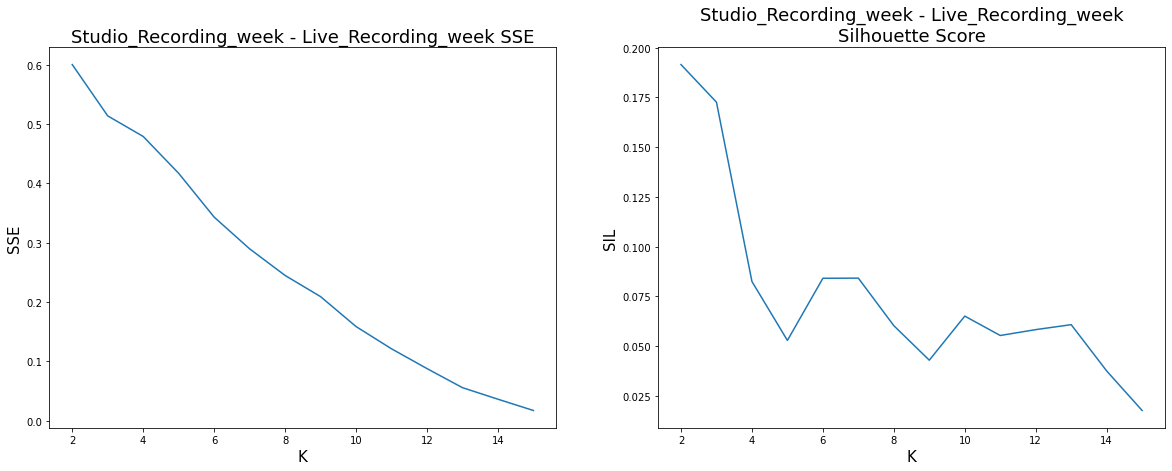

In [216]:
find_optimal_k_kmeans(15, 'euclidean', X_paa, False, album_type)

In [217]:
cluster_centers_studio_live_paa, dict_label_studio_live_paa, labels_studio_live_paa = run_kmeans(3, 1000, 10, \
                                                                'euclidean', X_paa, False)

cluster_centers_shape (3, 26, 1)

Labels:  {0: 8, 1: 6, 2: 2}

SSE:  0.5135642212596884
Silhouette Score:  0.17263788742197667


Dataset con le labels associate


0         1         2         3         4  \
track_date_created                                                     
2009_studio         0.033827  0.060254  0.053911  0.063425  0.149049   
2010_studio         0.546107  0.254098  0.334016  0.369877  0.420082   
2011_studio         0.624346  0.675393  0.359948  0.852094  0.586387   
2012_studio         0.669059  0.215311  0.460925  0.307018  0.429027   
2013_studio         0.494444  0.214646  0.216667  0.098990  0.308586   
2014_studio         0.560096  0.322115  0.459135  0.543269  0.419471   
2015_studio         0.084180  0.031930  0.283745  0.238752  0.124819   
2016_studio         0.583004  0.367589  0.338933  0.638340  0.394269   
2009_live           0.528455  0.447154  0.073171  0.443089  0.516260   
2010_live           0.277344  0.347656  0.363281  0.214844  0.089844   
2011_live           0.161458  0.213542  0.036458  0.442708  0.135417   
2012_live           0.054264  0.062016  0.344961  0.488372  0.023256   
2013_live           0.157534  0.123288  0.013699  0.493151  0.123288   
2014_live           0.318182  0.200000  0.654545  0.718182  0.100000   
2015_live           0.139706  0.183824  0.205882  0.220588  0.272059   
2016_live           0.431373  0.147059  0.519608  0.137255  0.509804   

                           5         6         7         8         9  ...  \
track_date_created                                                    ...   
2009_studio         0.137421  0.774841  0.546512  0.688161  0.646934  ...   
2010_studio         0.201844  0.243852  0.257172  0.704918  0.473361  ...   
2011_studio         0.341623  0.460733  0.446335  0.336387  0.294503  ...   
2012_studio         0.368421  0.279107  0.234450  0.225678  0.360447  ...   
2013_studio         0.184343  0.611616  0.257576  0.338384  0.146970  ...   
2014_studio         0.462740  0.158654  0.588942  0.343750  0.585337  ...   
2015_studio         0.229318  0.191582  0.283745  0.133527  0.581277  ...   
2016_studio         0.324111  0.233202  0.279644  0.533597  0.486166  ...   
2009_live           0.565041  0.918699  0.402439  0.593496  0.418699  ...   
2010_live           0.019531  0.136719  0.199219  0.105469  0.160156  ...   
2011_live           0.062500  0.395833  0.276042  0.401042  0.369792  ...   
2012_live           0.197674  0.647287  0.178295  0.383721  0.379845  ...   
2013_live           0.849315  0.034247  0.321918  0.130137  0.123288  ...   
2014_live           0.336364  0.000000  0.172727  0.309091  0.136364  ...   
2015_live           0.007353  0.132353  0.088235  0.227941  0.132353  ...   
2016_live           0.196078  0.029412  0.000000  0.264706  0.166667  ...   

                          17        18        19        20        21  \
track_date_created                                                     
2009_studio         0.112051  0.126850  0.201903  0.191332  0.367865   
2010_studio         0.266393  0.590164  0.608607  0.222336  0.560451   
2011_studio         0.293194  0.369110  0.388743  0.277487  0.575916   
2012_studio         0.238437  0.261563  0.224880  0.464912  0.391547   
2013_studio         0.215152  0.159596  0.242929  0.171212  0.251010   
2014_studio         0.348558  0.252404  0.161058  0.437500  0.478365   
2015_studio         0.099419  0.213353  0.169086  0.203193  0.175617   
2016_studio         0.489130  0.309289  0.615613  0.328063  0.333992   
2009_live           0.365854  0.138211  0.121951  0.227642  0.341463   
2010_live           0.113281  0.238281  0.234375  0.105469  0.230469   
2011_live           0.260417  0.609375  0.270833  0.411458  0.531250   
2012_live           0.259690  0.127907  0.120155  0.220930  0.093023   
2013_live           0.006849  0.123288  0.157534  0.184932  0.150685   
2014_live           0.000000  0.200000  0.045455  0.318182  0.000000   
2015_live           0.705882  0.161765  0.022059  0.000000  0.007353   
2016_live           0.068627  0.117647  0.127451  0.019608  0.362745   

                          22        23        

Cluster 0
 ['2013_studio', '2015_studio', '2010_live', '2012_live', '2013_live', '2014_live', '2015_live', '2016_live']

Cluster 1
 ['2010_studio', '2011_studio', '2012_studio', '2014_studio', '2016_studio', '2011_live']

Cluster 2
 ['2009_studio', '2009_live']



Studio_Recording Live_Recording  Tot_Cluster Entropy  Purity
Cluster 0                2              6            8  0.8113  0.7500
Cluster 1                5              1            6  0.6500  0.8333
Cluster 2                1              1            2  1.0000  0.5000
Total                    8              8           16  0.7744  0.7500

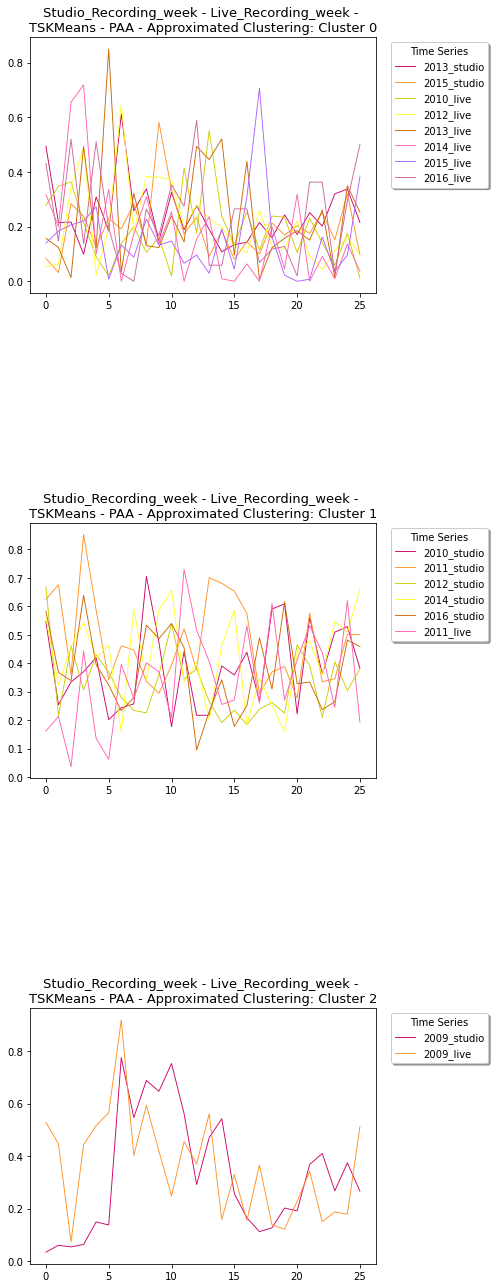

In [218]:
analyze_approximated_clusters(labels_studio_live_paa, X_paa, df_tss_studio_live_scaled, album_type, \
                               '\nTSKMeans - PAA - Approximated Clustering', True)

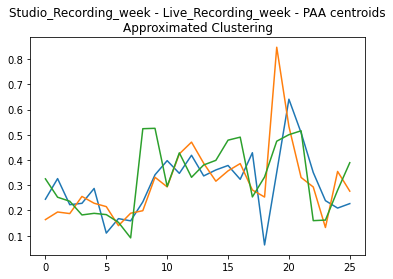

In [219]:
plot_centroids_approximated(cluster_centers_studio_live_paa, X_paa, album_type, 'PAA')

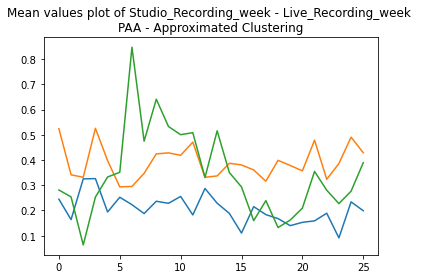

In [220]:
plot_mean_values_approximated(labels_studio_live_paa, X_paa, album_type, 'PAA')

<h3>DTW</h3>

k:  2 SSE:  0.2076946493017637 Silhouette Score:  0.28156782583640383

k:  3 SSE:  0.1769171235639263 Silhouette Score:  0.18814864588880978

k:  4 SSE:  0.15381196952295356 Silhouette Score:  0.18190746137388808

k:  5 SSE:  0.14115327771992925 Silhouette Score:  0.16108167058845008

k:  6 SSE:  0.11722036638508793 Silhouette Score:  0.1143189164728188

k:  7 SSE:  0.1044550431718289 Silhouette Score:  0.06310521502121985

k:  8 SSE:  0.08881415402206902 Silhouette Score:  0.03779174763506776

k:  9 SSE:  0.0725901898201908 Silhouette Score:  0.07008467504624924

k:  10 SSE:  0.05616339888145171 Silhouette Score:  0.09575759515194358

k:  11 SSE:  0.04518829877594193 Silhouette Score:  0.06888699019053379

k:  12 SSE:  0.03270024785914954 Silhouette Score:  0.03613944408980705

k:  13 SSE:  0.02246882306897915 Silhouette Score:  0.04292413578307726

k:  14 SSE:  0.013495375033447273 Silhouette Score:  0.037424937374557384

k:  15 SSE:  0.006298294018314206 Silhouette Score:  0.0276237

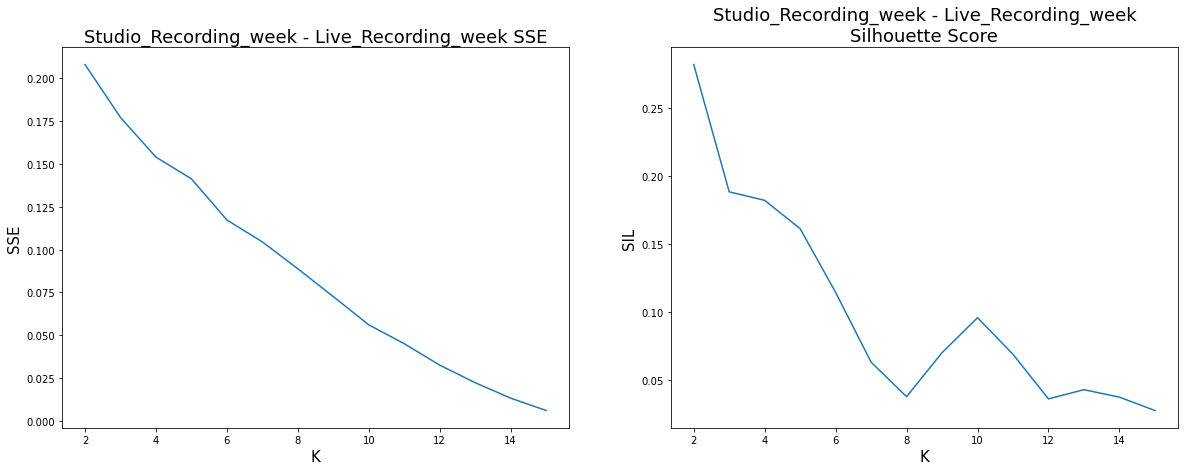

In [221]:
find_optimal_k_kmeans(15, 'dtw', X_paa, False, album_type)

In [222]:
cluster_centers_studio_live_paa_dtw, dict_label_studio_live_paa_dtw, \
labels_studio_live_paa_dtw = run_kmeans(3, 1000, 10, 'dtw', X_paa, False)

cluster_centers_shape (3, 26, 1)

Labels:  {0: 9, 1: 1, 2: 6}

SSE:  0.1769171235639263
Silhouette Score:  0.18814864588880978


Dataset con le labels associate


0         1         2         3         4  \
track_date_created                                                     
2009_studio         0.033827  0.060254  0.053911  0.063425  0.149049   
2010_studio         0.546107  0.254098  0.334016  0.369877  0.420082   
2011_studio         0.624346  0.675393  0.359948  0.852094  0.586387   
2012_studio         0.669059  0.215311  0.460925  0.307018  0.429027   
2013_studio         0.494444  0.214646  0.216667  0.098990  0.308586   
2014_studio         0.560096  0.322115  0.459135  0.543269  0.419471   
2015_studio         0.084180  0.031930  0.283745  0.238752  0.124819   
2016_studio         0.583004  0.367589  0.338933  0.638340  0.394269   
2009_live           0.528455  0.447154  0.073171  0.443089  0.516260   
2010_live           0.277344  0.347656  0.363281  0.214844  0.089844   
2011_live           0.161458  0.213542  0.036458  0.442708  0.135417   
2012_live           0.054264  0.062016  0.344961  0.488372  0.023256   
2013_live           0.157534  0.123288  0.013699  0.493151  0.123288   
2014_live           0.318182  0.200000  0.654545  0.718182  0.100000   
2015_live           0.139706  0.183824  0.205882  0.220588  0.272059   
2016_live           0.431373  0.147059  0.519608  0.137255  0.509804   

                           5         6         7         8         9  ...  \
track_date_created                                                    ...   
2009_studio         0.137421  0.774841  0.546512  0.688161  0.646934  ...   
2010_studio         0.201844  0.243852  0.257172  0.704918  0.473361  ...   
2011_studio         0.341623  0.460733  0.446335  0.336387  0.294503  ...   
2012_studio         0.368421  0.279107  0.234450  0.225678  0.360447  ...   
2013_studio         0.184343  0.611616  0.257576  0.338384  0.146970  ...   
2014_studio         0.462740  0.158654  0.588942  0.343750  0.585337  ...   
2015_studio         0.229318  0.191582  0.283745  0.133527  0.581277  ...   
2016_studio         0.324111  0.233202  0.279644  0.533597  0.486166  ...   
2009_live           0.565041  0.918699  0.402439  0.593496  0.418699  ...   
2010_live           0.019531  0.136719  0.199219  0.105469  0.160156  ...   
2011_live           0.062500  0.395833  0.276042  0.401042  0.369792  ...   
2012_live           0.197674  0.647287  0.178295  0.383721  0.379845  ...   
2013_live           0.849315  0.034247  0.321918  0.130137  0.123288  ...   
2014_live           0.336364  0.000000  0.172727  0.309091  0.136364  ...   
2015_live           0.007353  0.132353  0.088235  0.227941  0.132353  ...   
2016_live           0.196078  0.029412  0.000000  0.264706  0.166667  ...   

                          17        18        19        20        21  \
track_date_created                                                     
2009_studio         0.112051  0.126850  0.201903  0.191332  0.367865   
2010_studio         0.266393  0.590164  0.608607  0.222336  0.560451   
2011_studio         0.293194  0.369110  0.388743  0.277487  0.575916   
2012_studio         0.238437  0.261563  0.224880  0.464912  0.391547   
2013_studio         0.215152  0.159596  0.242929  0.171212  0.251010   
2014_studio         0.348558  0.252404  0.161058  0.437500  0.478365   
2015_studio         0.099419  0.213353  0.169086  0.203193  0.175617   
2016_studio         0.489130  0.309289  0.615613  0.328063  0.333992   
2009_live           0.365854  0.138211  0.121951  0.227642  0.341463   
2010_live           0.113281  0.238281  0.234375  0.105469  0.230469   
2011_live           0.260417  0.609375  0.270833  0.411458  0.531250   
2012_live           0.259690  0.127907  0.120155  0.220930  0.093023   
2013_live           0.006849  0.123288  0.157534  0.184932  0.150685   
2014_live           0.000000  0.200000  0.045455  0.318182  0.000000   
2015_live           0.705882  0.161765  0.022059  0.000000  0.007353   
2016_live           0.068627  0.117647  0.127451  0.019608  0.362745   

                          22        23        

Cluster 0
 ['2009_studio', '2013_studio', '2015_studio', '2010_live', '2012_live', '2013_live', '2014_live', '2015_live', '2016_live']

Cluster 1
 ['2011_live']

Cluster 2
 ['2010_studio', '2011_studio', '2012_studio', '2014_studio', '2016_studio', '2009_live']



Studio_Recording Live_Recording  Tot_Cluster  Entropy  Purity
Cluster 0                3              6            9   0.9183  0.6667
Cluster 1                0              1            1  -0.0000  1.0000
Cluster 2                5              1            6   0.6500  0.8333
Total                    8              8           16   0.7603  0.7500

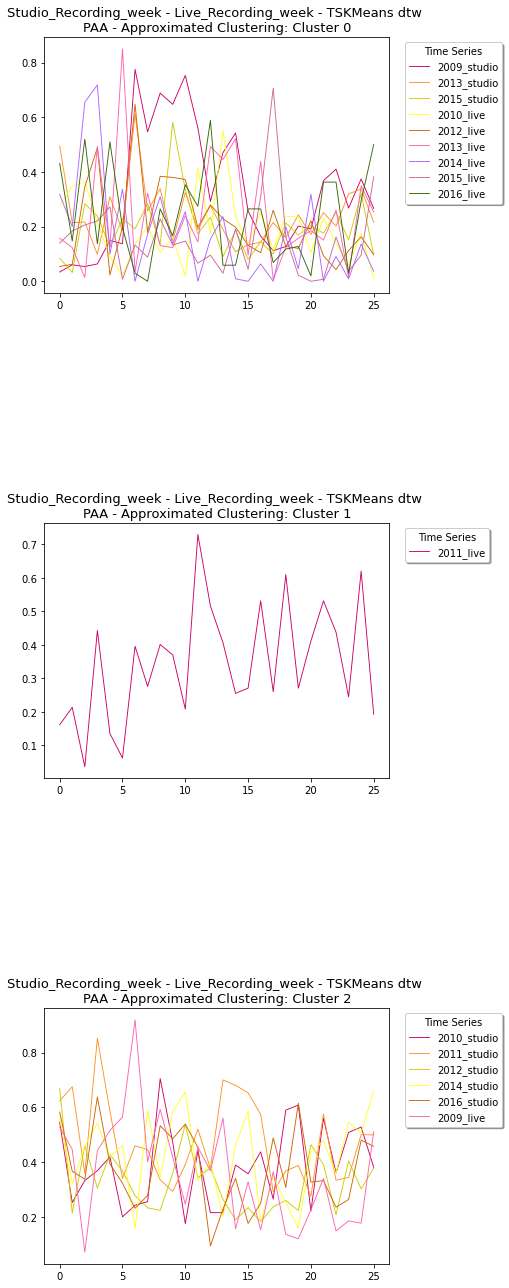

In [223]:
analyze_approximated_clusters(labels_studio_live_paa_dtw, X_paa, df_tss_studio_live_scaled, album_type, \
                               'TSKMeans dtw \nPAA - Approximated Clustering', True)

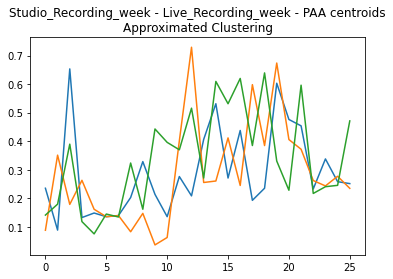

In [224]:
plot_centroids_approximated(cluster_centers_studio_live_paa_dtw, X_paa, album_type, 'PAA')

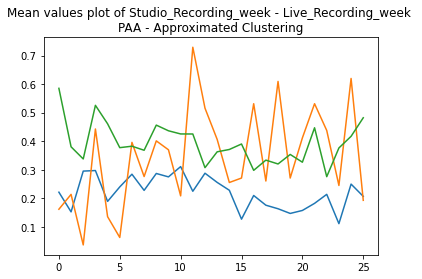

In [225]:
plot_mean_values_approximated(labels_studio_live_paa_dtw, X_paa, album_type, 'PAA')

<h3>OneD_SymbolicAggregateApproximation</h3>

<h3>TimeSeriesKMeans</h3>

In [226]:
n_sax1d_segments = 26
n_sax_symbols_avg = 10
n_sax_symbols_slope = 4

one_d_sax = OneD_SymbolicAggregateApproximation(n_segments=n_sax1d_segments,\
     alphabet_size_avg=n_sax_symbols_avg, alphabet_size_slope=n_sax_symbols_slope)

X_sax1d = one_d_sax.fit_transform(tss_studio_live_scaled)

<h3>EUCLIDEAN</h3>

k:  2 SSE:  43.585416666666674 Silhouette Score:  0.057494931576411015

k:  3 SSE:  39.285714285714285 Silhouette Score:  0.04722757141235283

k:  4 SSE:  34.296875 Silhouette Score:  0.051648309105945325

k:  5 SSE:  30.75 Silhouette Score:  0.05913639489871099

k:  6 SSE:  26.75 Silhouette Score:  0.05123076072225728

k:  7 SSE:  23.172916666666666 Silhouette Score:  0.048968141442096394

k:  8 SSE:  20.088541666666664 Silhouette Score:  0.03978086132486073

k:  9 SSE:  16.619791666666668 Silhouette Score:  0.038470790730567625

k:  10 SSE:  13.583333333333332 Silhouette Score:  0.041556994053074454

k:  11 SSE:  10.958333333333332 Silhouette Score:  0.036996818442467064

k:  12 SSE:  8.197916666666664 Silhouette Score:  0.03796710276903177

k:  13 SSE:  5.875 Silhouette Score:  0.03603499458716322

k:  14 SSE:  3.84375 Silhouette Score:  0.022850611306192932

k:  15 SSE:  1.8437499999999998 Silhouette Score:  0.010386455091567458



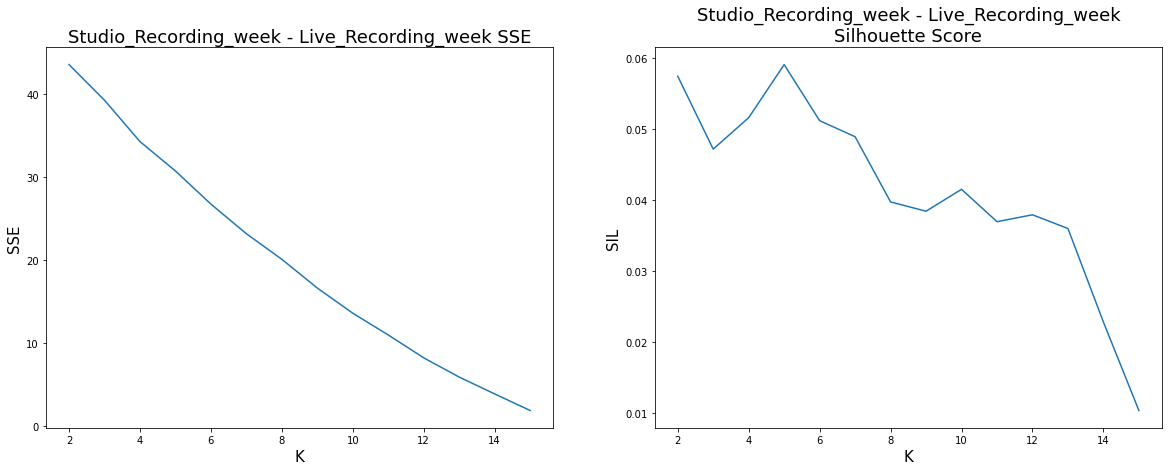

In [227]:
find_optimal_k_kmeans(15, 'euclidean', X_sax1d, False, album_type)

In [228]:
cluster_centers_studio_live_sax1d, dict_label_studio_live_sax1d, \
labels_studio_live_sax1d = run_kmeans(5, 1000, 10, 'euclidean', X_sax1d, False)

cluster_centers_shape (5, 26, 2)

Labels:  {0: 2, 1: 3, 2: 3, 3: 6, 4: 2}

SSE:  30.75
Silhouette Score:  0.05913639489871099


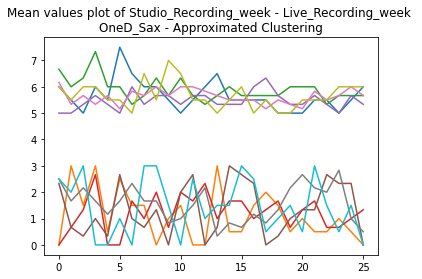

In [229]:
plot_mean_values_approximated(labels_studio_live_sax1d, X_sax1d, album_type, 'OneD_Sax')

<h3>DTW</h3>

k:  2 SSE:  21.932058908744764 Silhouette Score:  0.07235868717264722

k:  3 SSE:  19.497813124375625 Silhouette Score:  0.09062047661703954

k:  4 SSE:  16.523960588023087 Silhouette Score:  0.06825830896720952

k:  5 SSE:  14.541468253968253 Silhouette Score:  0.04731372393499493

k:  6 SSE:  13.186086309523809 Silhouette Score:  0.04099422351283353

k:  7 SSE:  11.478170787545787 Silhouette Score:  0.0457099400263913

k:  8 SSE:  9.523611111111112 Silhouette Score:  0.0372775923227018

k:  9 SSE:  8.169791666666665 Silhouette Score:  0.021647643309310165

k:  10 SSE:  6.9781249999999995 Silhouette Score:  0.01669606337601498

k:  11 SSE:  5.536309523809523 Silhouette Score:  0.02040302752101137

k:  12 SSE:  4.363541666666666 Silhouette Score:  0.008310563954061967

k:  13 SSE:  2.8127976190476187 Silhouette Score:  0.016592142790735908

k:  14 SSE:  1.671875 Silhouette Score:  0.01789248168552443

k:  15 SSE:  0.8020833333333333 Silhouette Score:  0.007587050885950326



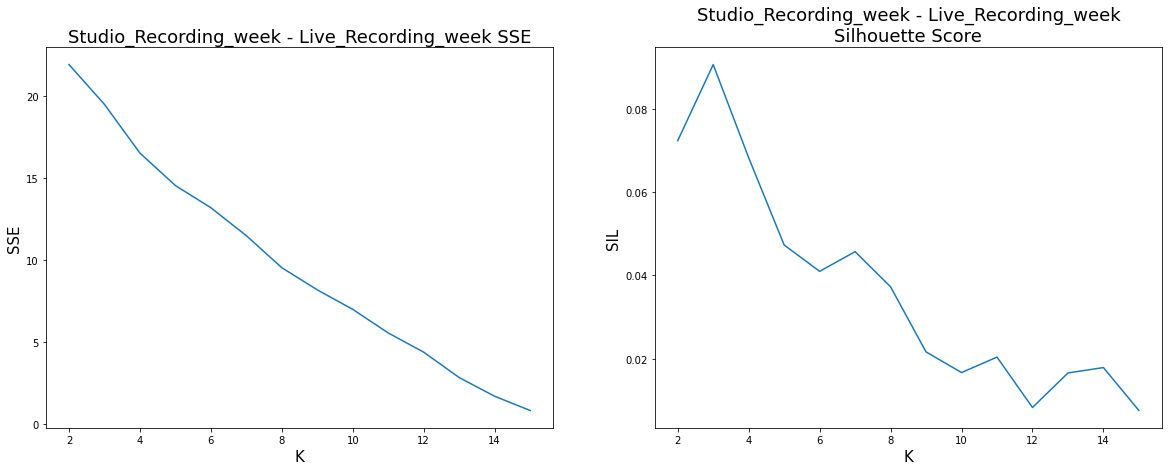

In [230]:
find_optimal_k_kmeans(15, 'dtw', X_sax1d, False, album_type)

In [231]:
cluster_centers_studio_live_sax1d_dtw, dict_label_studio_live_sax1d_dtw, \
labels_studio_live_sax1d_dtw = run_kmeans(3, 1000, 10, 'dtw', X_sax1d, False)

cluster_centers_shape (3, 26, 2)

Labels:  {0: 8, 1: 6, 2: 2}

SSE:  19.497813124375625
Silhouette Score:  0.09062047661703954


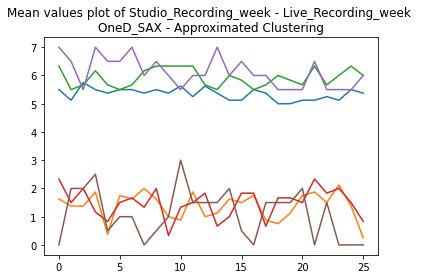

In [232]:
plot_mean_values_approximated(labels_studio_live_sax1d_dtw, X_sax1d, album_type, 'OneD_SAX')

<h3>SymbolicAggregateApproximation</h3>

<h3>TimeSeriesKMeans</h3>

In [233]:
n_sax_segments = 26
n_sax_symbols = 10

sax = SymbolicAggregateApproximation(n_segments=n_sax_segments, \
                                     alphabet_size_avg=n_sax_symbols)

X_sax = sax.fit_transform(tss_studio_live_scaled)

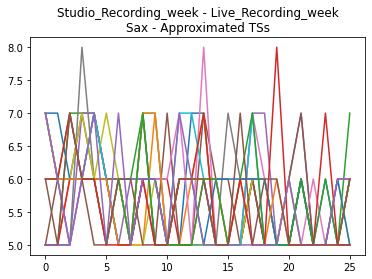

In [234]:
plt.plot(X_sax.reshape(X_sax.shape[1], X_sax.shape[0]))
plt.title(album_type + "\nSax - Approximated TSs")
plt.show()

<h3>EUCLIDEAN</h3>

k:  2 SSE:  9.623015873015873 Silhouette Score:  0.18040616933481904

k:  3 SSE:  8.280208333333333 Silhouette Score:  0.15707427733345877

k:  4 SSE:  7.225694444444445 Silhouette Score:  0.14735644413312662

k:  5 SSE:  6.28125 Silhouette Score:  0.06927790419983376

k:  6 SSE:  5.40625 Silhouette Score:  0.0603512344589337

k:  7 SSE:  4.697916666666665 Silhouette Score:  0.061433368282435015

k:  8 SSE:  3.968749999999999 Silhouette Score:  0.049635976979790955

k:  9 SSE:  3.2812499999999996 Silhouette Score:  0.048382142878811346

k:  10 SSE:  2.5625 Silhouette Score:  0.053064084116100294

k:  11 SSE:  2.09375 Silhouette Score:  0.04195656947212976

k:  12 SSE:  1.6354166666666665 Silhouette Score:  0.028107367928071163

k:  13 SSE:  1.125 Silhouette Score:  0.03660226395685255

k:  14 SSE:  0.6875 Silhouette Score:  0.03236373684176453

k:  15 SSE:  0.28125 Silhouette Score:  0.01835514003308975



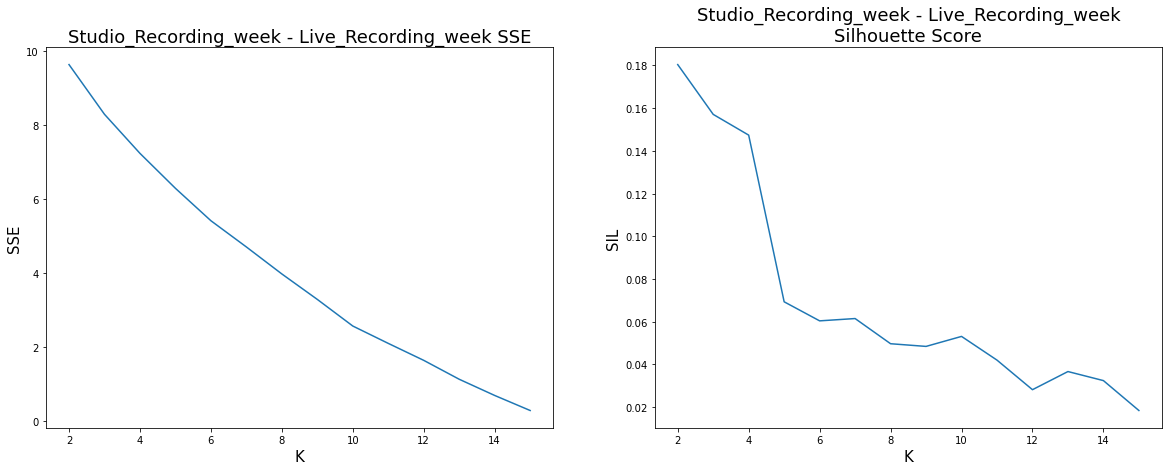

In [235]:
find_optimal_k_kmeans(15, 'euclidean', X_sax, False, album_type)

In [236]:
cluster_centers_studio_live_sax, dict_label_studio_live_sax, \
labels_studio_live_sax = run_kmeans(3, 1000, 10, 'euclidean', X_sax, False)

cluster_centers_shape (3, 26, 1)

Labels:  {0: 8, 1: 5, 2: 3}

SSE:  8.280208333333333
Silhouette Score:  0.15707427733345877


Dataset con le labels associate


0  1  2  3  4  5  6  7  8  9  ...  17  18  19  20  21  22  \
track_date_created                                ...                           
2009_studio         5  5  5  5  5  5  7  7  7  7  ...   5   5   5   5   6   6   
2010_studio         7  6  6  6  6  5  5  6  7  6  ...   6   7   7   5   7   6   
2011_studio         7  7  6  8  7  6  6  6  6  6  ...   6   6   6   6   7   6   
2012_studio         7  5  6  6  6  6  6  5  5  6  ...   5   6   5   6   6   5   
2013_studio         6  5  5  5  6  5  7  6  6  5  ...   5   5   5   5   5   5   
2014_studio         7  6  6  7  6  6  5  7  6  7  ...   6   5   5   6   6   6   
2015_studio         5  5  6  5  5  5  5  6  5  7  ...   5   5   5   5   5   5   
2016_studio         7  6  6  7  6  6  5  6  7  6  ...   6   6   7   6   6   5   
2009_live           7  6  5  6  6  7  8  6  7  6  ...   6   5   5   5   6   5   
2010_live           6  6  6  5  5  5  5  5  5  5  ...   5   5   5   5   5   5   
2011_live           5  5  5  6  5  5  6  6  6  6  ...   6   7   6   6   7   6   
2012_live           5  5  6  6  5  5  7  5  6  6  ...   6   5   5   5   5   5   
2013_live           5  5  5  6  5  8  5  6  5  5  ...   5   5   5   5   5   6   
2014_live           6  5  7  7  5  6  5  5  6  5  ...   5   5   5   6   5   5   
2015_live           5  5  5  5  6  5  5  5  5  5  ...   7   5   5   5   5   5   
2016_live           6  5  6  5  6  5  5  5  6  5  ...   5   5   5   5   6   6   

                    23  24  25  Labels  
track_date_created                      
2009_studio          6   6   6       2  
2010_studio          6   7   6       1  
2011_studio          6   6   6       1  
2012_studio          6   6   6       1  
2013_studio          6   6   5       0  
2014_studio          7   6   7       1  
2015_studio          5   6   5       0  
2016_studio          6   6   6       1  
2009_live            5   5   6       2  
2010_live            5   5   5       0  
2011_live            5   7   5       2  
2012_live            5   5   5       0  
2013_live            5   6   6       0  
2014_live            5   5   5       0  
2015_live            5   5   6       0  
2016_live            5   6   6       0  

[16 rows x 27 columns]

Cluster 0
 ['2013_studio', '2015_studio', '2010_live', '2012_live', '2013_live', '2014_live', '2015_live', '2016_live']

Cluster 1
 ['2010_studio', '2011_studio', '2012_studio', '2014_studio', '2016_studio']

Cluster 2
 ['2009_studio', '2009_live', '2011_live']



Studio_Recording Live_Recording  Tot_Cluster  Entropy  Purity
Cluster 0                2              6            8   0.8113  0.7500
Cluster 1                5              0            5  -0.0000  1.0000
Cluster 2                1              2            3   0.9183  0.6667
Total                    8              8           16   0.5778  0.8125

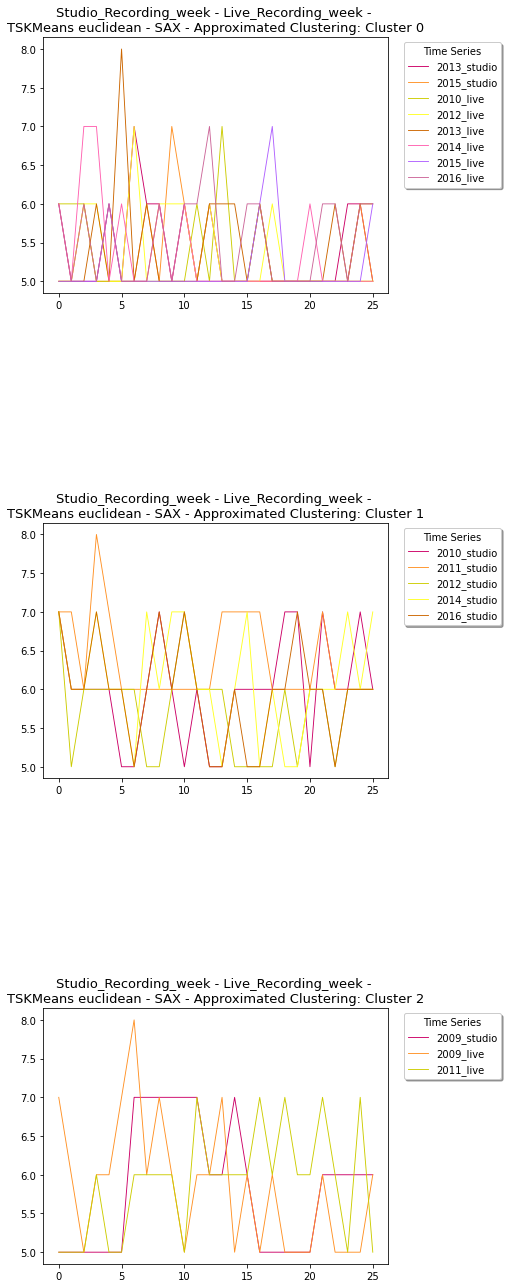

In [237]:
analyze_approximated_clusters(labels_studio_live_sax, X_sax, df_tss_studio_live_scaled, \
                              album_type, \
                              '\nTSKMeans euclidean - SAX - Approximated Clustering', True)

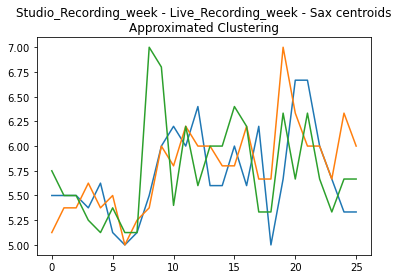

In [238]:
plot_centroids_approximated(cluster_centers_studio_live_sax, X_sax, album_type, 'Sax')

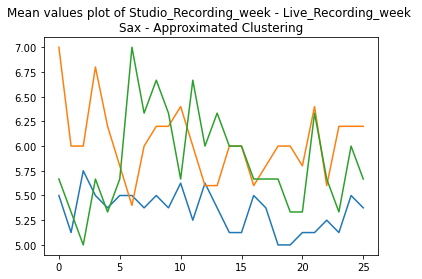

In [239]:
plot_mean_values_approximated(labels_studio_live_sax, X_sax, album_type, 'Sax')

<h3>DTW</h3>

k:  2 SSE:  3.2524236630815575 Silhouette Score:  0.2882322665455479

k:  3 SSE:  2.5760118353868355 Silhouette Score:  0.1735060498156983

k:  4 SSE:  2.321596346872082 Silhouette Score:  0.11808129218181107

k:  5 SSE:  2.028794642857143 Silhouette Score:  0.09778876951901191

k:  6 SSE:  1.6555460164835165 Silhouette Score:  0.09910681362389764

k:  7 SSE:  1.5004889116731224 Silhouette Score:  0.0799470408261805

k:  8 SSE:  1.2609031593406592 Silhouette Score:  0.05186909706974005

k:  9 SSE:  1.052439692982456 Silhouette Score:  0.025733828392987945

k:  10 SSE:  0.8178571428571428 Silhouette Score:  0.03168777029555096

k:  11 SSE:  0.6294642857142857 Silhouette Score:  0.03965731463502317

k:  12 SSE:  0.4375 Silhouette Score:  0.053255927358447114

k:  13 SSE:  0.2708333333333333 Silhouette Score:  0.040174644392052705

k:  14 SSE:  0.15625 Silhouette Score:  0.037025635556441526

k:  15 SSE:  0.06250000000000001 Silhouette Score:  0.022937927384034232



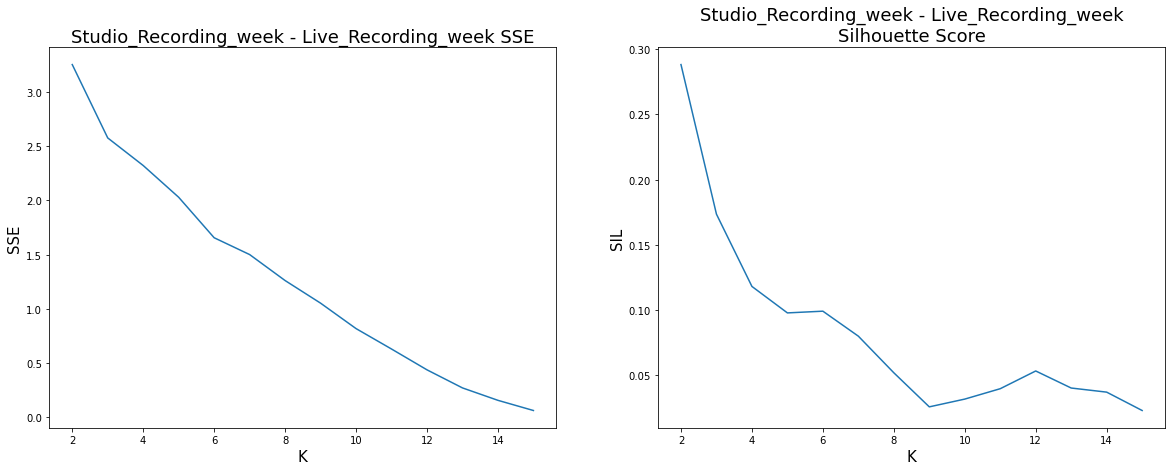

In [240]:
find_optimal_k_kmeans(15, 'dtw', X_sax, False, album_type)

In [241]:
cluster_centers_studio_live_sax_dtw, dict_label_studio_live_sax_dtw, \
labels_studio_live_sax_dtw = run_kmeans(3, 1000, 10, 'dtw', X_sax, False)

cluster_centers_shape (3, 26, 1)

Labels:  {0: 5, 1: 6, 2: 5}

SSE:  2.5760118353868355
Silhouette Score:  0.1735060498156983


Dataset con le labels associate


0  1  2  3  4  5  6  7  8  9  ...  17  18  19  20  21  22  \
track_date_created                                ...                           
2009_studio         5  5  5  5  5  5  7  7  7  7  ...   5   5   5   5   6   6   
2010_studio         7  6  6  6  6  5  5  6  7  6  ...   6   7   7   5   7   6   
2011_studio         7  7  6  8  7  6  6  6  6  6  ...   6   6   6   6   7   6   
2012_studio         7  5  6  6  6  6  6  5  5  6  ...   5   6   5   6   6   5   
2013_studio         6  5  5  5  6  5  7  6  6  5  ...   5   5   5   5   5   5   
2014_studio         7  6  6  7  6  6  5  7  6  7  ...   6   5   5   6   6   6   
2015_studio         5  5  6  5  5  5  5  6  5  7  ...   5   5   5   5   5   5   
2016_studio         7  6  6  7  6  6  5  6  7  6  ...   6   6   7   6   6   5   
2009_live           7  6  5  6  6  7  8  6  7  6  ...   6   5   5   5   6   5   
2010_live           6  6  6  5  5  5  5  5  5  5  ...   5   5   5   5   5   5   
2011_live           5  5  5  6  5  5  6  6  6  6  ...   6   7   6   6   7   6   
2012_live           5  5  6  6  5  5  7  5  6  6  ...   6   5   5   5   5   5   
2013_live           5  5  5  6  5  8  5  6  5  5  ...   5   5   5   5   5   6   
2014_live           6  5  7  7  5  6  5  5  6  5  ...   5   5   5   6   5   5   
2015_live           5  5  5  5  6  5  5  5  5  5  ...   7   5   5   5   5   5   
2016_live           6  5  6  5  6  5  5  5  6  5  ...   5   5   5   5   6   6   

                    23  24  25  Labels  
track_date_created                      
2009_studio          6   6   6       2  
2010_studio          6   7   6       1  
2011_studio          6   6   6       1  
2012_studio          6   6   6       1  
2013_studio          6   6   5       0  
2014_studio          7   6   7       1  
2015_studio          5   6   5       2  
2016_studio          6   6   6       1  
2009_live            5   5   6       1  
2010_live            5   5   5       2  
2011_live            5   7   5       2  
2012_live            5   5   5       0  
2013_live            5   6   6       0  
2014_live            5   5   5       0  
2015_live            5   5   6       2  
2016_live            5   6   6       0  

[16 rows x 27 columns]

Cluster 0
 ['2013_studio', '2012_live', '2013_live', '2014_live', '2016_live']

Cluster 1
 ['2010_studio', '2011_studio', '2012_studio', '2014_studio', '2016_studio', '2009_live']

Cluster 2
 ['2009_studio', '2015_studio', '2010_live', '2011_live', '2015_live']



Studio_Recording Live_Recording  Tot_Cluster Entropy  Purity
Cluster 0                1              4            5  0.7219  0.8000
Cluster 1                5              1            6  0.6500  0.8333
Cluster 2                2              3            5  0.9710  0.6000
Total                    8              8           16  0.7728  0.7500

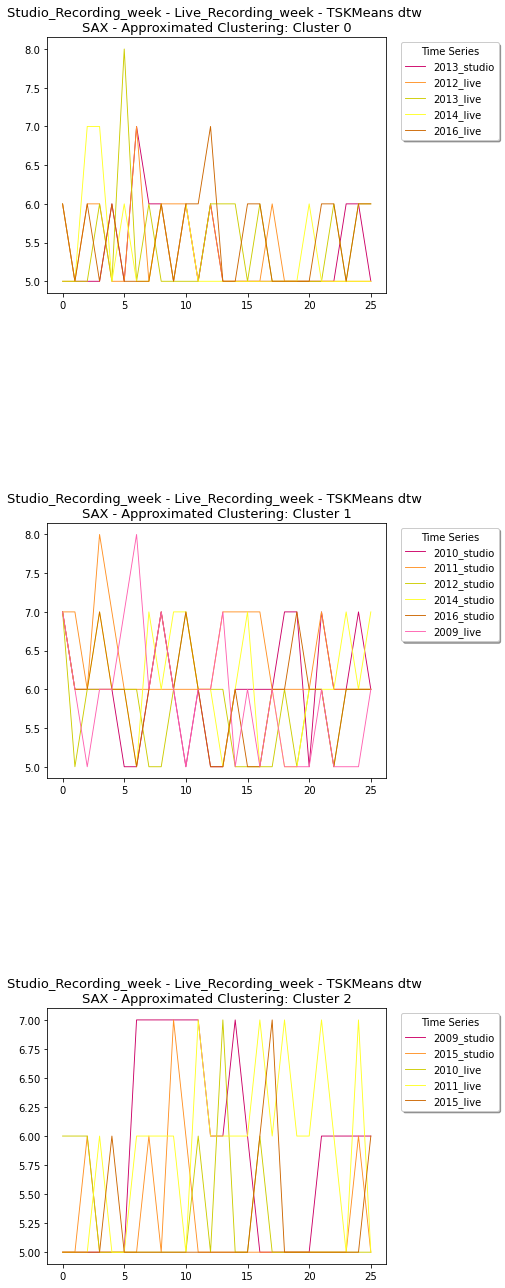

In [242]:
analyze_approximated_clusters(labels_studio_live_sax_dtw, X_sax, df_tss_studio_live_scaled, album_type, \
                               'TSKMeans dtw \nSAX - Approximated Clustering', True)

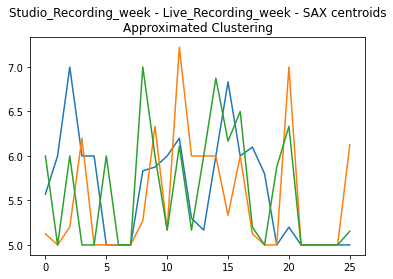

In [243]:
plot_centroids_approximated(cluster_centers_studio_live_sax_dtw, X_sax, album_type, 'SAX')

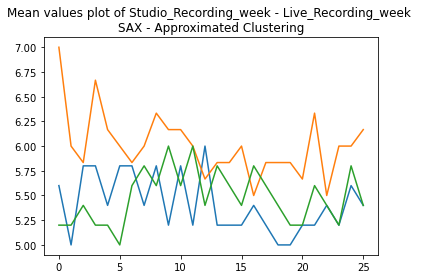

In [244]:
plot_mean_values_approximated(labels_studio_live_sax_dtw, X_sax, album_type, 'SAX')